In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import random

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

not here


In [2]:
grid_data_file = os.path.join(os.getcwd().split('data')[0], 'bi.pickle')
print(grid_data_file)
with open(grid_data_file,'rb') as f:
    load_array= pickle.load(f)
exc = load_array[0]
inh = load_array[1]
print(len(exc))

/home/lena/Promotion/neurolib/GUI/current/gui/bi.pickle
147


In [3]:
aln = ALNModel()
N = aln.params.N

data.set_parameters(aln)

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [4]:
dur = 500.
t_pen = 0.96

In [5]:
file_ = '1_E.pickle'
folder = str(os.getcwd().split('data_2')[1])
print(folder)
case = str(folder[1])

/1


In [6]:
dur_pre = 10
dur_post = 10

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-10
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

p_var = [0]
c_var = [0]
wp = 1. / (dur - t_pen * dur)

if case in ['1', '2']:    # low to high
    max_I = [3., -3.]
else:
    max_I = [-3., 3.]
    
if case in ['1', '3']:    # sparsity
    factor_ws = 1.
    factor_we = 0.
else:
    factor_ws = 0.
    factor_we = 1.
    
maxC = [5., -5., 0.18, 0.]
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

In [7]:
bestControl_ = [None] * len(exc) 
bestState_ = [None] * len(exc) 
cost_ = [None] * len(exc) 
costnode_ = [None] * len(exc) 
weights_ = [None] * len(exc) 

if os.path.isfile(file_) :
    print("file found")
    
    with open(file_,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0]
    bestState_ = load_array[1]
    cost_ = load_array[2]
    costnode_ = load_array[3]
    weights_ = load_array[4]

file found


In [8]:
initVars = [None] * len(exc)
target = [None] * len(exc)
cost_uncontrolled = [None] * len(exc)

In [9]:
# get initial parameters and target states

i_range = range(0,83,1)

data.set_parameters(aln)

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    aln.params.duration = 3000.
    
    control0 = aln.getZeroControl()
    control0 = functions.step_control(aln, maxI_ = max_I[0])

    aln.run(control=control0)
    
    target_rates = np.zeros((2))
    target_rates[0] = aln.rates_exc[0,-1] 
    target_rates[1] = aln.rates_inh[0,-1]

    control0 = functions.step_control(aln, maxI_ = max_I[1])
    aln.run(control=control0)

    init_state_vars = np.zeros(( len(state_vars) ))
    for j in range(len(state_vars)):
        if aln.state[state_vars[j]].size == 1:
            init_state_vars[j] = aln.state[state_vars[j]][0]
        else:
            init_state_vars[j] = aln.state[state_vars[j]][0,-1]

    initVars[i] = init_state_vars
    target[i] = [target_rates[0], target_rates[1]]

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
-------  19 0.4250000000000001 0.4750000000000002

In [10]:
# get uncontrolled cost
data.set_parameters(aln)

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    aln.params.duration = dur
    
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[i][0]
    target_[:,1,:] = target[i][1]
            
    cost.setParams(wp, 0.0, 0.0)

    setinit(initVars[i], aln)
    control0 = aln.getZeroControl()

    cgv = None
    max_it = 0

    bestControl_init_, bestState_init_, cost_init_, runtime_init_, grad_init_, phi_init_, phi1_, costnode_init_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)
    
    cost_uncontrolled[i] = cost_init_[0]

-------  0 0.4000000000000001 0.3500000000000001
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  295.1203239619291
RUN  0 , total integrated cost =  295.1203239619291
Gradient descend method:  None
RUN  0 , total integrated cost =  295.1203239619291
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  1 0.4250000000000001 0.3500000000000001
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  490.81359439844215
RUN  0 , total integrated cost =  490.81359439844215
Gradient descend method:  None
RUN  0 , total integrated cost =  490.81359439844215
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  2 0.4000000000000001 0.3750000000000001
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  276.9353881083755
RUN  0 , total integrated cost =  276.9353881083755
Gradient descend method:  None
RUN  0 , total integrated cost =  276.9353881083755
Improved

RUN  0 , total integrated cost =  611.9840098576404
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  32 0.47500000000000014 0.5250000000000002
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  828.4109189821265
RUN  0 , total integrated cost =  828.4109189821265
Gradient descend method:  None
RUN  0 , total integrated cost =  828.4109189821265
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  33 0.5000000000000002 0.5250000000000002
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  1053.4566176891283
RUN  0 , total integrated cost =  1053.4566176891283
Gradient descend method:  None
RUN  0 , total integrated cost =  1053.4566176891283
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  34 0.5250000000000001 0.5250000000000002
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  1287.9845155276914
RUN  0 , total integra

initial cost =  346.3084589538196
RUN  0 , total integrated cost =  346.3084589538196
Gradient descend method:  None
RUN  0 , total integrated cost =  346.3084589538196
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  63 0.4500000000000001 0.6500000000000004
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  563.4077876032045
RUN  0 , total integrated cost =  563.4077876032045
Gradient descend method:  None
RUN  0 , total integrated cost =  563.4077876032045
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  64 0.47500000000000014 0.6500000000000004
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  779.6432321693527
RUN  0 , total integrated cost =  779.6432321693527
Gradient descend method:  None
RUN  0 , total integrated cost =  779.6432321693527
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  65 0.5000000000000002 0.6500000000000004
set cost par

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
-------  19 0.4250000000000001 0.4750000000000002

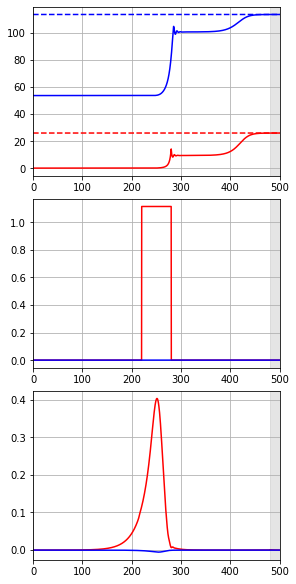

uncontrolled cost :  337.479567507888
cost splitting :  0.000995762931251715 [8.64179304 0.        ]
-------  70 0.4500000000000001 0.6750000000000004
-------  71 0.47500000000000014 0.6750000000000004
-------  72 0.5000000000000002 0.6750000000000004
-------  73 0.5250000000000001 0.6750000000000004
-------  74 0.5500000000000003 0.6750000000000004
-------  75 0.5750000000000002 0.6750000000000004
-------  76 0.4250000000000001 0.7000000000000004
-------  77 0.4500000000000001 0.7000000000000004
-------  78 0.47500000000000014 0.7000000000000004
-------  79 0.5000000000000002 0.7000000000000004
-------  80 0.5250000000000001 0.7000000000000004
-------  81 0.5500000000000003 0.7000000000000004
-------  82 0.5750000000000002 0.7000000000000004


In [78]:
cgv = None
j = 0

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    if i not in retry:
        continue
    
    #if type(bestControl_[i]) != type(None):
    #    continue
    
    aln.params.duration = dur
    setinit(initVars[i], aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[i][0]
    target_[:,1,:] = target[i][1]

    control0 = aln.getZeroControl()
    cost.setParams(wp, 0., 10.)
    max_it = int(10)

    control0[0,0,2200:2800] = 2.

    bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if True:
        plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        fig, ax = plt.subplots(3,1, constrained_layout=True, figsize = (4,8) )
        ax[1].plot(plot_time_array, bestControl_[i][0,0,n_pre-1:-n_post+1], color = 'red')
        ax[0].plot(plot_time_array, bestState_[i][0,0,n_pre-1:-n_post+1], color= 'red')
        ax[1].plot(plot_time_array, bestControl_[i][0,1,n_pre-1:-n_post+1], color = 'blue')
        ax[0].plot(plot_time_array, bestState_[i][0,1,n_pre-1:-n_post+1], color= 'blue')
        ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
        ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')


        ax[2].plot(plot_time_array, phi_[0,0,:], color = 'red')
        ax[2].plot(plot_time_array, phi_[0,1,:], color = 'blue')
        for k in range(3):
            ax[k].set_xlim(0.,dur)
            ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][2][0][:2])    

In [62]:
c_var = [0,1]
conv = [None] * len(exc)
max_it = int(30)

tol = 1e-6

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    while not conv[i]:

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][2][0][:] )
            
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][2] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][2][0][:2])

        if conv[i] and False:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
-------  19 0.4250000000000001 0.4750000000000002

-------  0 0.4000000000000001 0.3500000000000001
set cost params:  0.05 0.0 119.53952130159114
interpolate adjoint :  True True True
initial cost =  112.02409958837704
RUN  0 , total integrated cost =  112.02409958837704
Gradient descend method:  None
RUN  1 , total integrated cost =  112.02406370927653
RUN  2 , total integrated cost =  112.02406370927653
Control only changes marginally.
RUN  2 , total integrated cost =  112.02406370927653
Improved over  2  iterations in  1.4432247530203313  seconds by  3.202801954671486e-05  percent.
cost splitting :  0.0024137378033977632 [4.40488661e-10 9.37128924e-01]
set cost params:  0.05 0.0 117.19524235037653
interpolate adjoint :  True True True
initial cost =  109.82717209719719
RUN  0 , total integrated cost =  109.82717209719719
Gradient descend method:  None
RUN  1 , total integrated cost =  109.82717209719719
Control only changes marginally.
RUN  1 , total integrated cost =  109.82717209719719
Improved over  1  iterations in  0.7546865069

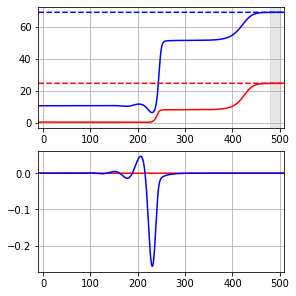

-------  1 0.4250000000000001 0.3500000000000001
set cost params:  0.05 0.0 576.6837255049172
interpolate adjoint :  True True True
initial cost =  259.6507004326916
RUN  0 , total integrated cost =  259.6507004326916
Gradient descend method:  None
RUN  1 , total integrated cost =  259.6507004326916
Control only changes marginally.
RUN  1 , total integrated cost =  259.6507004326916
Improved over  1  iterations in  0.6722035199636593  seconds by  0.0  percent.
cost splitting :  0.00039835472301827715 [4.80166671e-10 4.50247976e-01]


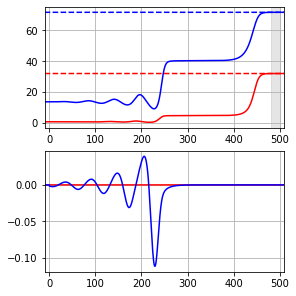

-------  2 0.4000000000000001 0.3750000000000001
set cost params:  0.05 0.0 54.91944151416587
interpolate adjoint :  True True True
initial cost =  88.66611888710956
RUN  0 , total integrated cost =  88.66611888710956
Gradient descend method:  None
RUN  1 , total integrated cost =  88.43591861266458
RUN  2 , total integrated cost =  88.14405715274856
RUN  3 , total integrated cost =  88.10062527784561
RUN  4 , total integrated cost =  88.08622521701382
RUN  5 , total integrated cost =  88.08622521701382
Control only changes marginally.
RUN  5 , total integrated cost =  88.08622521701382
Improved over  5  iterations in  2.17824619601015  seconds by  0.6540194579104934  percent.
cost splitting :  0.20737589469160542 [0.03049637 1.57323182]
set cost params:  0.05 0.0 55.07249198966687
interpolate adjoint :  True True True
initial cost =  88.33167657875265
RUN  0 , total integrated cost =  88.33167657875265
Gradient descend method:  None
RUN  1 , total integrated cost =  88.33167657875265


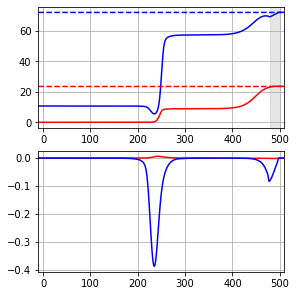

-------  3 0.4250000000000001 0.3750000000000001
set cost params:  0.05 0.0 26.3835053081594
interpolate adjoint :  True True True
initial cost =  25.80879580755713
RUN  0 , total integrated cost =  25.80879580755713
Gradient descend method:  None
RUN  1 , total integrated cost =  25.80879580755713
Control only changes marginally.
RUN  1 , total integrated cost =  25.80879580755713
Improved over  1  iterations in  0.8752257820451632  seconds by  0.0  percent.
cost splitting :  0.00018186235073376563 [5.54376182e-11 9.78216746e-01]


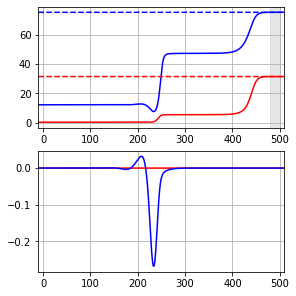

-------  4 0.4500000000000001 0.3750000000000001
set cost params:  0.05 0.0 189.34468342698375
interpolate adjoint :  True True True
initial cost =  88.79187420372759
RUN  0 , total integrated cost =  88.79187420372759
Gradient descend method:  None
RUN  1 , total integrated cost =  88.79187420372759
Control only changes marginally.
RUN  1 , total integrated cost =  88.79187420372759
Improved over  1  iterations in  0.9211068280274048  seconds by  0.0  percent.
cost splitting :  0.0007005021985890472 [1.67832201e-12 4.68942870e-01]


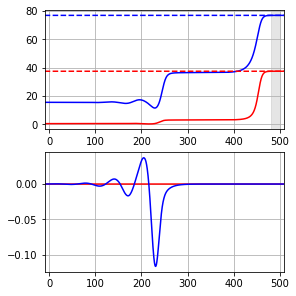

-------  5 0.4000000000000001 0.40000000000000013
set cost params:  0.05 0.0 17.170419455882246
interpolate adjoint :  True True True
initial cost =  39.46565635778228
RUN  0 , total integrated cost =  39.46565635778228
Gradient descend method:  None
RUN  1 , total integrated cost =  39.46546952204117
RUN  2 , total integrated cost =  39.465469510340036
RUN  3 , total integrated cost =  39.465469510340036
Control only changes marginally.
RUN  3 , total integrated cost =  39.465469510340036
Improved over  3  iterations in  1.7181552239926532  seconds by  0.0004734431388868643  percent.
cost splitting :  0.0061227875478071635 [5.76992657e-11 2.29843910e+00]
set cost params:  0.05 0.0 75.04936228748252
interpolate adjoint :  True True True
initial cost =  172.4966945457418
RUN  0 , total integrated cost =  172.4966945457418
Gradient descend method:  None
RUN  1 , total integrated cost =  172.496004914205
RUN  2 , total integrated cost =  172.4960041311794
RUN  3 , total integrated cost = 

RUN  2 , total integrated cost =  12.953111899080671
RUN  3 , total integrated cost =  12.953111898014305
RUN  4 , total integrated cost =  12.953111896756567
RUN  5 , total integrated cost =  12.953111896272402
RUN  6 , total integrated cost =  12.953111896272402
Control only changes marginally.
RUN  6 , total integrated cost =  12.953111896272402
Improved over  6  iterations in  3.6084050440695137  seconds by  0.0033169910484787124  percent.
cost splitting :  0.0023934244409955126 [5.76992657e-11 2.29845747e+00]
set cost params:  0.05 0.0 3.5513548835397932
interpolate adjoint :  True True True
initial cost =  8.162757836665529
RUN  0 , total integrated cost =  8.162757836665529
Gradient descend method:  None
RUN  1 , total integrated cost =  8.16274957249484
RUN  2 , total integrated cost =  8.162749570401992
RUN  3 , total integrated cost =  8.162749569400324
RUN  4 , total integrated cost =  8.162749568260544
RUN  5 , total integrated cost =  8.16274956743043
RUN  6 , total integr

set cost params:  0.05 0.0 103.83901099094315
interpolate adjoint :  True True True
initial cost =  238.67315112626125
RUN  0 , total integrated cost =  238.67315112626125
Gradient descend method:  None
RUN  1 , total integrated cost =  238.66670001802964
RUN  2 , total integrated cost =  238.66669651630824
RUN  3 , total integrated cost =  238.66669651630824
Control only changes marginally.
RUN  3 , total integrated cost =  238.66669651630824
Improved over  3  iterations in  2.2830001859692857  seconds by  0.002704372034529001  percent.
cost splitting :  0.02575512012607108 [5.76992657e-11 2.29841758e+00]
set cost params:  0.05 0.0 91.36352721834062
interpolate adjoint :  True True True
initial cost =  209.99282524522695
RUN  0 , total integrated cost =  209.99282524522695
Gradient descend method:  None
RUN  1 , total integrated cost =  209.99281779166415
RUN  2 , total integrated cost =  209.99281779166415
Control only changes marginally.
RUN  2 , total integrated cost =  209.9928177

set cost params:  0.05 0.0 59.44288063653398
interpolate adjoint :  True True True
initial cost =  136.62574623109194
RUN  0 , total integrated cost =  136.62574623109194
Gradient descend method:  None
RUN  1 , total integrated cost =  136.62573613224302
RUN  2 , total integrated cost =  136.62573613224302
Control only changes marginally.
RUN  2 , total integrated cost =  136.62573613224302
Improved over  2  iterations in  1.2353188449051231  seconds by  7.391614829543869e-06  percent.
cost splitting :  0.01662958999588093 [5.76992657e-11 2.29842335e+00]
set cost params:  0.05 0.0 54.345736787143444
interpolate adjoint :  True True True
initial cost =  124.9103417070898
RUN  0 , total integrated cost =  124.9103417070898
Gradient descend method:  None
RUN  1 , total integrated cost =  124.91033894464461
RUN  2 , total integrated cost =  124.91033894464461
Control only changes marginally.
RUN  2 , total integrated cost =  124.91033894464461
Improved over  2  iterations in  1.24573070195

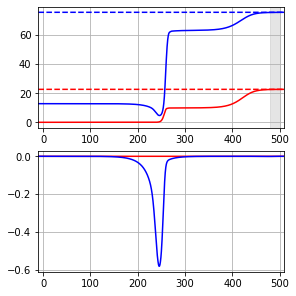

-------  6 0.4250000000000001 0.40000000000000013
set cost params:  0.05 0.0 49.79260254302524
interpolate adjoint :  True True True
initial cost =  107.61276323962754
RUN  0 , total integrated cost =  107.61276323962754
Gradient descend method:  None
RUN  1 , total integrated cost =  107.61276323962754
Control only changes marginally.
RUN  1 , total integrated cost =  107.61276323962754
Improved over  1  iterations in  0.8368298350833356  seconds by  0.0  percent.
cost splitting :  0.015904669165354414 [2.1612024e+00 1.5206175e-06]


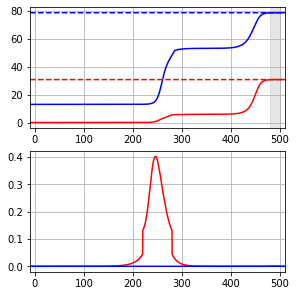

-------  7 0.4500000000000001 0.40000000000000013
set cost params:  0.05 0.0 420.5167418102394
interpolate adjoint :  True True True
initial cost =  435.42885154130744
RUN  0 , total integrated cost =  435.42885154130744
Gradient descend method:  None
RUN  1 , total integrated cost =  435.42885154130744
Control only changes marginally.
RUN  1 , total integrated cost =  435.42885154130744
Improved over  1  iterations in  0.7581819900078699  seconds by  0.0  percent.
cost splitting :  0.00011625430441953399 [6.83320704e-11 1.03546138e+00]


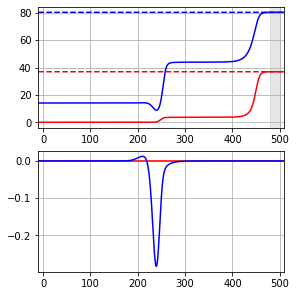

-------  8 0.47500000000000014 0.40000000000000013
set cost params:  0.05 0.0 1654.9006849589018
interpolate adjoint :  True True True
initial cost =  597.6223841992352
RUN  0 , total integrated cost =  597.6223841992352
Gradient descend method:  None
RUN  1 , total integrated cost =  597.6223469996601
RUN  2 , total integrated cost =  597.6223469996601
Control only changes marginally.
RUN  2 , total integrated cost =  597.6223469996601
Improved over  2  iterations in  1.7039508229354396  seconds by  6.224595338721883e-06  percent.
cost splitting :  0.015445134559574638 [0.36112232 0.        ]
set cost params:  0.05 0.0 2244.5608966427
interpolate adjoint :  True True True
initial cost =  810.5618106620814
RUN  0 , total integrated cost =  810.5618106620814
Gradient descend method:  None
RUN  1 , total integrated cost =  810.5617698790788
RUN  2 , total integrated cost =  810.5617698790788
Control only changes marginally.
RUN  2 , total integrated cost =  810.5617698790788
Improved ove

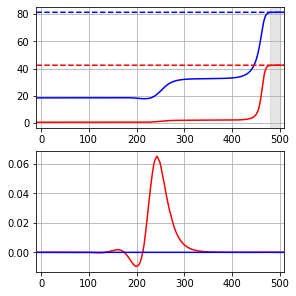

-------  9 0.4000000000000001 0.42500000000000016
set cost params:  0.05 0.0 16.161454975537133
interpolate adjoint :  True True True
initial cost =  50.66897232665355
RUN  0 , total integrated cost =  50.66897232665355
Gradient descend method:  None
RUN  1 , total integrated cost =  50.66822631807265
RUN  2 , total integrated cost =  50.6682263157559
RUN  3 , total integrated cost =  50.66822630713004
RUN  4 , total integrated cost =  50.66822630448433
RUN  5 , total integrated cost =  50.668226297932684
RUN  6 , total integrated cost =  50.66822628459904
RUN  7 , total integrated cost =  50.66822628286737
RUN  8 , total integrated cost =  50.66822623790425
RUN  9 , total integrated cost =  50.66822617866358
RUN  10 , total integrated cost =  50.66822617866358
Control only changes marginally.
RUN  10 , total integrated cost =  50.66822617866358
Improved over  10  iterations in  4.552788183093071  seconds by  0.0014725934940287289  percent.
cost splitting :  0.020551544312038133 [1.432

RUN  3 , total integrated cost =  150.9472948525198
Control only changes marginally.
RUN  3 , total integrated cost =  150.9472948525198
Improved over  3  iterations in  1.9704056850168854  seconds by  2.5285055528456724e-05  percent.
cost splitting :  0.04937991940376842 [1.43254890e-10 3.13501442e+00]
set cost params:  0.05 0.0 70.13652229215914
interpolate adjoint :  True True True
initial cost =  219.88147747831079
RUN  0 , total integrated cost =  219.88147747831079
Gradient descend method:  None
RUN  1 , total integrated cost =  219.881308316571
RUN  2 , total integrated cost =  219.881308316571
Control only changes marginally.
RUN  2 , total integrated cost =  219.881308316571
Improved over  2  iterations in  1.5039468959439546  seconds by  7.693314677226226e-05  percent.
cost splitting :  0.06615481440275575 [1.43254890e-10 3.13500005e+00]
set cost params:  0.05 0.0 13.02512220159459
interpolate adjoint :  True True True
initial cost =  40.83706643512456
RUN  0 , total integrat

set cost params:  0.05 0.0 56.28910929483883
interpolate adjoint :  True True True
initial cost =  176.46989473624285
RUN  0 , total integrated cost =  176.46989473624285
Gradient descend method:  None
RUN  1 , total integrated cost =  176.46961254406048
RUN  2 , total integrated cost =  176.46961243633191
RUN  3 , total integrated cost =  176.46961243633191
Control only changes marginally.
RUN  3 , total integrated cost =  176.46961243633191
Improved over  3  iterations in  1.845207161968574  seconds by  0.00015997057818140092  percent.
cost splitting :  0.05555177640353676 [1.43254890e-10 3.13500848e+00]
set cost params:  0.05 0.0 73.2113638990586
interpolate adjoint :  True True True
initial cost =  229.5210240841656
RUN  0 , total integrated cost =  229.5210240841656
Gradient descend method:  None
RUN  1 , total integrated cost =  229.52093741132424
RUN  2 , total integrated cost =  229.52093730646956
RUN  3 , total integrated cost =  229.52093730646956
Control only changes margina

set cost params:  0.05 0.0 31.382859162450305
interpolate adjoint :  True True True
initial cost =  98.3884799826035
RUN  0 , total integrated cost =  98.3884799826035
Gradient descend method:  None
RUN  1 , total integrated cost =  98.38804207334852
RUN  2 , total integrated cost =  98.38804175331231
RUN  3 , total integrated cost =  98.38804175331231
Control only changes marginally.
RUN  3 , total integrated cost =  98.38804175331231
Improved over  3  iterations in  1.3862851139856502  seconds by  0.00044540711601825933  percent.
cost splitting :  0.03513080385127936 [1.43254890e-10 3.13503256e+00]
set cost params:  0.05 0.0 6.408134245600508
interpolate adjoint :  True True True
initial cost =  20.09146603122498
RUN  0 , total integrated cost =  20.09146603122498
Gradient descend method:  None
RUN  1 , total integrated cost =  20.0907415210732
RUN  2 , total integrated cost =  20.09074147819713
RUN  3 , total integrated cost =  20.0907408211925
RUN  4 , total integrated cost =  20.0

RUN  16 , total integrated cost =  14.278323315715774
RUN  17 , total integrated cost =  14.278322943068654
RUN  18 , total integrated cost =  14.2783225893823
RUN  19 , total integrated cost =  14.278322563938124
RUN  20 , total integrated cost =  14.278322542212575
RUN  30 , total integrated cost =  14.27832173998902
RUN  30 , total integrated cost =  14.27832173998902
Improved over  30  iterations in  14.520177280064672  seconds by  0.015330529363851042  percent.
cost splitting :  0.00728130462520474 [1.43254890e-10 3.13513892e+00]
set cost params:  0.05 0.0 9.444964279486653
interpolate adjoint :  True True True
initial cost =  29.611639150621873
RUN  0 , total integrated cost =  29.611639150621873
Gradient descend method:  None
RUN  1 , total integrated cost =  29.61151129149324
RUN  2 , total integrated cost =  29.611511188387173
RUN  3 , total integrated cost =  29.611511170559215
RUN  4 , total integrated cost =  29.611511146232772
RUN  5 , total integrated cost =  29.611511140

set cost params:  0.05 0.0 19.514712175250118
interpolate adjoint :  True True True
initial cost =  61.1818088918309
RUN  0 , total integrated cost =  61.1818088918309
Gradient descend method:  None
RUN  1 , total integrated cost =  61.18086656018855
RUN  2 , total integrated cost =  61.180866553027705
RUN  3 , total integrated cost =  61.180866553027705
Control only changes marginally.
RUN  3 , total integrated cost =  61.180866553027705
Improved over  3  iterations in  1.7070030409377068  seconds by  0.0015402271038738036  percent.
cost splitting :  0.02320694588786833 [1.43254890e-10 3.13505552e+00]
set cost params:  0.05 0.0 71.81117819148928
interpolate adjoint :  True True True
initial cost =  225.1331912267899
RUN  0 , total integrated cost =  225.1331912267899
Gradient descend method:  None
RUN  1 , total integrated cost =  225.13141041318582
RUN  2 , total integrated cost =  225.13140807481363
RUN  3 , total integrated cost =  225.13140807481363
Control only changes marginally

RUN  11 , total integrated cost =  4.158910528579533
RUN  12 , total integrated cost =  4.1589105013240655
RUN  13 , total integrated cost =  4.158910477711248
RUN  14 , total integrated cost =  4.158910450457893
RUN  15 , total integrated cost =  4.158910426888231
RUN  16 , total integrated cost =  4.158910399630461
RUN  17 , total integrated cost =  4.158910376098141
RUN  18 , total integrated cost =  4.158910349423725
RUN  19 , total integrated cost =  4.158910325277185
RUN  20 , total integrated cost =  4.15891029748312
RUN  30 , total integrated cost =  4.158910011107816
RUN  30 , total integrated cost =  4.158910011107816
Improved over  30  iterations in  14.52396590996068  seconds by  0.06538455885741712  percent.
cost splitting :  0.002299662935545493 [1.4325489e-10 3.1352252e+00]
set cost params:  0.05 0.0 8.39945276312516
interpolate adjoint :  True True True
initial cost =  26.33429094721842
RUN  0 , total integrated cost =  26.33429094721842
Gradient descend method:  None
R

RUN  10 , total integrated cost =  107.99533868742525
RUN  11 , total integrated cost =  107.99533867075925
RUN  12 , total integrated cost =  107.99533864247279
RUN  13 , total integrated cost =  107.99533863917229
RUN  14 , total integrated cost =  107.99533748910146
RUN  15 , total integrated cost =  107.99533639267014
RUN  16 , total integrated cost =  107.99533638964262
RUN  17 , total integrated cost =  107.99533635453386
RUN  18 , total integrated cost =  107.99533633161705
RUN  19 , total integrated cost =  107.99533632710866
RUN  20 , total integrated cost =  107.9953363110484
RUN  30 , total integrated cost =  107.99533372292156
RUN  30 , total integrated cost =  107.99533372292156
Improved over  30  iterations in  18.08807379193604  seconds by  6.0965792599176893e-05  percent.
cost splitting :  0.03236440974124125 [1.43254890e-10 3.13504037e+00]
set cost params:  0.05 0.0 54.631737359632176
interpolate adjoint :  True True True
initial cost =  171.2743203002383
RUN  0 , tota

set cost params:  0.05 0.0 72.35410421221908
interpolate adjoint :  True True True
initial cost =  226.83605224724394
RUN  0 , total integrated cost =  226.83605224724394
Gradient descend method:  None
RUN  1 , total integrated cost =  226.83393026101905
RUN  2 , total integrated cost =  226.83392951503865
RUN  3 , total integrated cost =  226.83392948150868
RUN  4 , total integrated cost =  226.83392942861337
RUN  5 , total integrated cost =  226.83392941671917
RUN  6 , total integrated cost =  226.8339293465074
RUN  7 , total integrated cost =  226.83392929686536
RUN  8 , total integrated cost =  226.83392925250877
RUN  9 , total integrated cost =  226.83392918810088
RUN  10 , total integrated cost =  226.8339291759994
RUN  11 , total integrated cost =  226.8339291293908
RUN  12 , total integrated cost =  226.8339291006552
RUN  13 , total integrated cost =  226.83392859834603
RUN  14 , total integrated cost =  226.83392806511304
RUN  15 , total integrated cost =  226.83392805286766
R

RUN  2 , total integrated cost =  61.62580907322583
RUN  3 , total integrated cost =  61.62580907322583
Control only changes marginally.
RUN  3 , total integrated cost =  61.62580907322583
Improved over  3  iterations in  2.027241360046901  seconds by  0.001208055975297384  percent.
cost splitting :  0.02119040696909365 [1.43254890e-10 3.13505982e+00]
set cost params:  0.05 0.0 29.875228302820865
interpolate adjoint :  True True True
initial cost =  93.66168746717376
RUN  0 , total integrated cost =  93.66168746717376
Gradient descend method:  None
RUN  1 , total integrated cost =  93.66158656757293
RUN  2 , total integrated cost =  93.66158656757293
Control only changes marginally.
RUN  2 , total integrated cost =  93.66158656757293
Improved over  2  iterations in  1.6123768308898434  seconds by  0.00010772772044731482  percent.
cost splitting :  0.030057076398459025 [1.43254890e-10 3.13504161e+00]
set cost params:  0.05 0.0 57.0535597118521
interpolate adjoint :  True True True
initi

RUN  1 , total integrated cost =  223.3777880636022
RUN  2 , total integrated cost =  223.37778803461705
RUN  3 , total integrated cost =  223.37778802524068
RUN  4 , total integrated cost =  223.37776435399
RUN  5 , total integrated cost =  223.37774094128676
RUN  6 , total integrated cost =  223.377740934431
RUN  7 , total integrated cost =  223.37773363252816
RUN  8 , total integrated cost =  223.37772530742004
RUN  9 , total integrated cost =  223.37772529170493
RUN  10 , total integrated cost =  223.3777252725308
RUN  11 , total integrated cost =  223.37772523560332
RUN  12 , total integrated cost =  223.37772523017205
RUN  13 , total integrated cost =  223.37772495755476
RUN  14 , total integrated cost =  223.3777247014923
RUN  15 , total integrated cost =  223.37772408249293
RUN  16 , total integrated cost =  223.37772334180823
RUN  17 , total integrated cost =  223.37772333636022
RUN  18 , total integrated cost =  223.3777181693445
RUN  19 , total integrated cost =  223.3777126

RUN  15 , total integrated cost =  4.162963727029352
RUN  16 , total integrated cost =  4.162963711938226
RUN  17 , total integrated cost =  4.162963698992795
RUN  18 , total integrated cost =  4.162963683838685
RUN  19 , total integrated cost =  4.1629636709810205
RUN  20 , total integrated cost =  4.162963655672863
RUN  30 , total integrated cost =  4.162963448588403
RUN  30 , total integrated cost =  4.162963448588403
Improved over  30  iterations in  14.47937879699748  seconds by  0.03286614778119201  percent.
cost splitting :  0.001938531694107963 [1.43254890e-10 3.13521526e+00]
set cost params:  0.05 0.0 62.48836344959173
interpolate adjoint :  True True True
initial cost =  195.9145672958603
RUN  0 , total integrated cost =  195.9145672958603
Gradient descend method:  None
RUN  1 , total integrated cost =  195.90452674731088
RUN  2 , total integrated cost =  195.9045265971997
RUN  3 , total integrated cost =  195.90452658698902
RUN  4 , total integrated cost =  195.9045265646913

RUN  9 , total integrated cost =  217.05062637532023
RUN  10 , total integrated cost =  217.05062636902986
RUN  11 , total integrated cost =  217.05062584882873
RUN  12 , total integrated cost =  217.05062528451793
RUN  13 , total integrated cost =  217.05062527846428
RUN  14 , total integrated cost =  217.05062525174478
RUN  15 , total integrated cost =  217.05062525174478
Control only changes marginally.
RUN  15 , total integrated cost =  217.05062525174478
Improved over  15  iterations in  10.465066244010814  seconds by  0.0030279164283513182  percent.
cost splitting :  0.06034965895053161 [1.43254890e-10 3.13500819e+00]
set cost params:  0.05 0.0 3.903379728425588
interpolate adjoint :  True True True
initial cost =  12.240144908814095
RUN  0 , total integrated cost =  12.240144908814095
Gradient descend method:  None
RUN  1 , total integrated cost =  12.237926040136287
RUN  2 , total integrated cost =  12.237925721723961
RUN  3 , total integrated cost =  12.237925715378212
RUN  4 

RUN  5 , total integrated cost =  202.63838111841645
RUN  6 , total integrated cost =  202.6383810849197
RUN  7 , total integrated cost =  202.63838103291226
RUN  8 , total integrated cost =  202.63838103291226
Control only changes marginally.
RUN  8 , total integrated cost =  202.63838103291226
Improved over  8  iterations in  5.090476921061054  seconds by  7.23796767232443e-05  percent.
cost splitting :  0.05675581311278007 [1.43254890e-10 3.13501129e+00]
set cost params:  0.05 0.0 33.18105637741294
interpolate adjoint :  True True True
initial cost =  104.02582421588927
RUN  0 , total integrated cost =  104.02582421588927
Gradient descend method:  None
RUN  1 , total integrated cost =  104.02547896434656
RUN  2 , total integrated cost =  104.02547860557843
RUN  3 , total integrated cost =  104.02547860459377
RUN  4 , total integrated cost =  104.0254785967939
RUN  5 , total integrated cost =  104.0254785967939
Control only changes marginally.
RUN  5 , total integrated cost =  104.02

set cost params:  0.05 0.0 5.266854000158358
interpolate adjoint :  True True True
initial cost =  16.514133079941445
RUN  0 , total integrated cost =  16.514133079941445
Gradient descend method:  None
RUN  1 , total integrated cost =  16.51260546081879
RUN  2 , total integrated cost =  16.512604403223634
RUN  3 , total integrated cost =  16.512604394232973
RUN  4 , total integrated cost =  16.512604388884213
RUN  5 , total integrated cost =  16.512603856073472
RUN  6 , total integrated cost =  16.512603381881277
RUN  7 , total integrated cost =  16.512603376839863
RUN  8 , total integrated cost =  16.512603368581022
RUN  9 , total integrated cost =  16.512603365515353
RUN  10 , total integrated cost =  16.51260335562508
RUN  11 , total integrated cost =  16.512603348374217
RUN  12 , total integrated cost =  16.512603272101465
RUN  13 , total integrated cost =  16.512603181410274
RUN  14 , total integrated cost =  16.51260317813386
RUN  15 , total integrated cost =  16.512603170577666


set cost params:  0.05 0.0 3.8662321673199718
interpolate adjoint :  True True True
initial cost =  12.123076952836021
RUN  0 , total integrated cost =  12.123076952836021
Gradient descend method:  None
RUN  1 , total integrated cost =  12.121462714725904
RUN  2 , total integrated cost =  12.121462487590804
RUN  3 , total integrated cost =  12.12146243570579
RUN  4 , total integrated cost =  12.121462375832731
RUN  5 , total integrated cost =  12.121462360736516
RUN  6 , total integrated cost =  12.121462344752597
RUN  7 , total integrated cost =  12.12146233438598
RUN  8 , total integrated cost =  12.121462321799932
RUN  9 , total integrated cost =  12.121462314427028
RUN  10 , total integrated cost =  12.121462304891574
RUN  11 , total integrated cost =  12.12146229879138
RUN  12 , total integrated cost =  12.121462290289472
RUN  13 , total integrated cost =  12.1214622845338
RUN  14 , total integrated cost =  12.121462276007843
RUN  15 , total integrated cost =  12.121462269944342
R

set cost params:  0.05 0.0 28.325243338857952
interpolate adjoint :  True True True
initial cost =  88.80284069964198
RUN  0 , total integrated cost =  88.80284069964198
Gradient descend method:  None
RUN  1 , total integrated cost =  88.8023062253426
RUN  2 , total integrated cost =  88.80230592286131
RUN  3 , total integrated cost =  88.80230592286131
Control only changes marginally.
RUN  3 , total integrated cost =  88.80230592286131
Improved over  3  iterations in  2.056245679035783  seconds by  0.0006022068398436886  percent.
cost splitting :  0.02913022049677049 [1.43254890e-10 3.13504277e+00]
set cost params:  0.05 0.0 73.0391309878468
interpolate adjoint :  True True True
initial cost =  228.98225623200932
RUN  0 , total integrated cost =  228.98225623200932
Gradient descend method:  None
RUN  1 , total integrated cost =  228.98128978427687
RUN  2 , total integrated cost =  228.98128880887876
RUN  3 , total integrated cost =  228.9812887992852
RUN  4 , total integrated cost =  

RUN  16 , total integrated cost =  56.475812971645226
RUN  17 , total integrated cost =  56.47581295463425
RUN  18 , total integrated cost =  56.47581292819922
RUN  19 , total integrated cost =  56.47581292078641
RUN  20 , total integrated cost =  56.47581289769168
RUN  30 , total integrated cost =  56.4758115873783
RUN  30 , total integrated cost =  56.4758115873783
Improved over  30  iterations in  19.944030448095873  seconds by  0.0026299922603101322  percent.
cost splitting :  0.015747101770836228 [1.43254890e-10 3.13508637e+00]
set cost params:  0.05 0.0 46.900482863925326
interpolate adjoint :  True True True
initial cost =  147.0378517472336
RUN  0 , total integrated cost =  147.0378517472336
Gradient descend method:  None
RUN  1 , total integrated cost =  147.03723878426285
RUN  2 , total integrated cost =  147.03723714690182
RUN  3 , total integrated cost =  147.03723696908813
RUN  4 , total integrated cost =  147.0372367571415
RUN  5 , total integrated cost =  147.03723671506

RUN  1 , total integrated cost =  114.31421649682039
RUN  2 , total integrated cost =  114.3142164469209
RUN  3 , total integrated cost =  114.31421634090768
RUN  4 , total integrated cost =  114.31421621572255
RUN  5 , total integrated cost =  114.31421619834256
RUN  6 , total integrated cost =  114.31421616469922
RUN  7 , total integrated cost =  114.31421615062376
RUN  8 , total integrated cost =  114.31421608024215
RUN  9 , total integrated cost =  114.31421602838213
RUN  10 , total integrated cost =  114.31421592673013
RUN  11 , total integrated cost =  114.31421579746323
RUN  12 , total integrated cost =  114.314215780471
RUN  13 , total integrated cost =  114.31421574771416
RUN  14 , total integrated cost =  114.31421573262814
RUN  15 , total integrated cost =  114.31421559152719
RUN  16 , total integrated cost =  114.31421548239616
RUN  17 , total integrated cost =  114.31421543083316
RUN  18 , total integrated cost =  114.31421536002406
RUN  19 , total integrated cost =  114.3

set cost params:  0.05 0.0 12.403986744944937
interpolate adjoint :  True True True
initial cost =  38.888609901915274
RUN  0 , total integrated cost =  38.888609901915274
Gradient descend method:  None
RUN  1 , total integrated cost =  38.88825165719033
RUN  2 , total integrated cost =  38.888251626703415
RUN  3 , total integrated cost =  38.888251626123875
RUN  4 , total integrated cost =  38.88825161695499
RUN  5 , total integrated cost =  38.88825161161908
RUN  6 , total integrated cost =  38.88825161111902
RUN  7 , total integrated cost =  38.8882515852576
RUN  8 , total integrated cost =  38.88825156591979
RUN  9 , total integrated cost =  38.88825156591979
Control only changes marginally.
RUN  9 , total integrated cost =  38.88825156591979
Improved over  9  iterations in  4.772088935016654  seconds by  0.0009214420273480073  percent.
cost splitting :  0.01223092648077413 [1.43254890e-10 3.13509203e+00]
set cost params:  0.05 0.0 3.270302441797506
interpolate adjoint :  True True

RUN  6 , total integrated cost =  151.51777039105352
RUN  7 , total integrated cost =  151.51777035900133
RUN  8 , total integrated cost =  151.51777030927653
RUN  9 , total integrated cost =  151.5177703001591
RUN  10 , total integrated cost =  151.51777026041827
RUN  11 , total integrated cost =  151.51777024055343
RUN  12 , total integrated cost =  151.51776997897852
RUN  13 , total integrated cost =  151.51776967671853
RUN  14 , total integrated cost =  151.51776966554738
RUN  15 , total integrated cost =  151.51776963502735
RUN  16 , total integrated cost =  151.51776962176697
RUN  17 , total integrated cost =  151.5177667460153
RUN  18 , total integrated cost =  151.51776374629986
RUN  19 , total integrated cost =  151.51776373146325
RUN  20 , total integrated cost =  151.51776369966927
RUN  30 , total integrated cost =  151.51776267946596
RUN  30 , total integrated cost =  151.51776267946596
Improved over  30  iterations in  18.92297257296741  seconds by  0.0009764629674293701  

RUN  2 , total integrated cost =  166.29975553415477
Control only changes marginally.
RUN  2 , total integrated cost =  166.29975553415477
Improved over  2  iterations in  1.7381319419946522  seconds by  3.28840617669357e-06  percent.
cost splitting :  0.051375877079430934 [1.43254890e-10 3.13501271e+00]
set cost params:  0.05 0.0 29.513130493781805
interpolate adjoint :  True True True
initial cost =  92.52660812053868
RUN  0 , total integrated cost =  92.52660812053868
Gradient descend method:  None
RUN  1 , total integrated cost =  92.5263599422888
RUN  2 , total integrated cost =  92.52635928765213
RUN  3 , total integrated cost =  92.52635928765213
Control only changes marginally.
RUN  3 , total integrated cost =  92.52635928765213
Improved over  3  iterations in  2.0707086710026488  seconds by  0.00026893116651649507  percent.
cost splitting :  0.032234453203010056 [1.43254890e-10 3.13503671e+00]
set cost params:  0.05 0.0 16.4561486892061
interpolate adjoint :  True True True
in

RUN  3 , total integrated cost =  27.914872446454012
RUN  4 , total integrated cost =  27.914852471276074
RUN  5 , total integrated cost =  27.914839547274156
RUN  6 , total integrated cost =  27.91483954435637
RUN  7 , total integrated cost =  27.91483953932239
RUN  8 , total integrated cost =  27.91483953004087
RUN  9 , total integrated cost =  27.914839528731147
RUN  10 , total integrated cost =  27.914835427004906
RUN  11 , total integrated cost =  27.914832358854134
RUN  12 , total integrated cost =  27.91483235389685
RUN  13 , total integrated cost =  27.914832351967874
RUN  14 , total integrated cost =  27.914832347278676
RUN  15 , total integrated cost =  27.914832338666432
RUN  16 , total integrated cost =  27.914832338666432
Control only changes marginally.
RUN  16 , total integrated cost =  27.914832338666432
Improved over  16  iterations in  10.97949627507478  seconds by  0.0012692874920503527  percent.
cost splitting :  0.011088506396532985 [1.43254890e-10 3.13509785e+00]


RUN  4 , total integrated cost =  204.26511031058055
RUN  5 , total integrated cost =  204.26511026842542
RUN  6 , total integrated cost =  204.26511022039753
RUN  7 , total integrated cost =  204.26511014827346
RUN  8 , total integrated cost =  204.26511013731388
RUN  9 , total integrated cost =  204.26511008685662
RUN  10 , total integrated cost =  204.26511005926838
RUN  11 , total integrated cost =  204.26510998661416
RUN  12 , total integrated cost =  204.26510989167932
RUN  13 , total integrated cost =  204.26510987956146
RUN  14 , total integrated cost =  204.26510984094995
RUN  15 , total integrated cost =  204.2651098224673
RUN  16 , total integrated cost =  204.26508234839366
RUN  17 , total integrated cost =  204.26505723793406
RUN  18 , total integrated cost =  204.26505722643265
RUN  19 , total integrated cost =  204.2649934355374
RUN  20 , total integrated cost =  204.2649441129313
RUN  30 , total integrated cost =  204.26492217733883
RUN  30 , total integrated cost =  20

RUN  6 , total integrated cost =  13.112975295108129
RUN  7 , total integrated cost =  13.11297528971425
RUN  8 , total integrated cost =  13.112975277667449
RUN  9 , total integrated cost =  13.112975268506116
RUN  10 , total integrated cost =  13.112975191967143
RUN  11 , total integrated cost =  13.112975125630408
RUN  12 , total integrated cost =  13.112973810046077
RUN  13 , total integrated cost =  13.112972520982385
RUN  14 , total integrated cost =  13.112972511898729
RUN  15 , total integrated cost =  13.11297249944262
RUN  16 , total integrated cost =  13.11297249509953
RUN  17 , total integrated cost =  13.112972487325992
RUN  18 , total integrated cost =  13.112972482990603
RUN  19 , total integrated cost =  13.112972459063014
RUN  20 , total integrated cost =  13.112972440891921
RUN  30 , total integrated cost =  13.11295024437856
RUN  30 , total integrated cost =  13.11295024437856
Improved over  30  iterations in  20.29557142406702  seconds by  0.0002256602110435324  per

set cost params:  0.05 0.0 49.042391018977455
interpolate adjoint :  True True True
initial cost =  153.75148786065353
RUN  0 , total integrated cost =  153.75148786065353
Gradient descend method:  None
RUN  1 , total integrated cost =  153.75132092116593
RUN  2 , total integrated cost =  153.75132073299784
RUN  3 , total integrated cost =  153.7513207256634
RUN  4 , total integrated cost =  153.75132070330108
RUN  5 , total integrated cost =  153.7513206952413
RUN  6 , total integrated cost =  153.7513201633502
RUN  7 , total integrated cost =  153.75131954015794
RUN  8 , total integrated cost =  153.75131954015794
Control only changes marginally.
RUN  8 , total integrated cost =  153.75131954015794
Improved over  8  iterations in  5.7299035269534215  seconds by  0.00010947568569008581  percent.
cost splitting :  0.044190087610655085 [1.43254890e-10 3.13502476e+00]
set cost params:  0.05 0.0 57.07956911463425
interpolate adjoint :  True True True
initial cost =  178.948071854459
RUN  

set cost params:  0.05 0.0 27.20811763504452
interpolate adjoint :  True True True
initial cost =  85.30035543356152
RUN  0 , total integrated cost =  85.30035543356152
Gradient descend method:  None
RUN  1 , total integrated cost =  85.30010388895855
RUN  2 , total integrated cost =  85.30010367880332
RUN  3 , total integrated cost =  85.30010367880332
Control only changes marginally.
RUN  3 , total integrated cost =  85.30010367880332
Improved over  3  iterations in  2.2549512169789523  seconds by  0.00029513916666701334  percent.
cost splitting :  0.027144077111009506 [1.43254890e-10 3.13504769e+00]
set cost params:  0.05 0.0 67.55680754622335
interpolate adjoint :  True True True
initial cost =  211.79517097801877
RUN  0 , total integrated cost =  211.79517097801877
Gradient descend method:  None
RUN  1 , total integrated cost =  211.79434484193544
RUN  2 , total integrated cost =  211.7943437473191
RUN  3 , total integrated cost =  211.79434372593914
RUN  4 , total integrated cost

RUN  1 , total integrated cost =  134.68378136875867
RUN  2 , total integrated cost =  134.68378136481664
RUN  3 , total integrated cost =  134.68378134051684
RUN  4 , total integrated cost =  134.68378132706556
RUN  5 , total integrated cost =  134.68378131169868
RUN  6 , total integrated cost =  134.6837812845216
RUN  7 , total integrated cost =  134.6837812845216
Control only changes marginally.
RUN  7 , total integrated cost =  134.6837812845216
Improved over  7  iterations in  5.413020140957087  seconds by  2.399705380184969e-06  percent.
cost splitting :  0.03971904734040016 [1.43254890e-10 3.13502944e+00]
set cost params:  0.05 0.0 51.276778938512635
interpolate adjoint :  True True True
initial cost =  160.7561973128391
RUN  0 , total integrated cost =  160.7561973128391
Gradient descend method:  None
RUN  1 , total integrated cost =  160.75616916819746
RUN  2 , total integrated cost =  160.75616912975184
RUN  3 , total integrated cost =  160.75616912975184
Control only changes

RUN  7 , total integrated cost =  189.4183128797814
RUN  8 , total integrated cost =  189.41831287281482
RUN  9 , total integrated cost =  189.41831284460562
RUN  10 , total integrated cost =  189.41831283193451
RUN  11 , total integrated cost =  189.41831272691203
RUN  12 , total integrated cost =  189.41831259016476
RUN  13 , total integrated cost =  189.41831259016476
Control only changes marginally.
RUN  13 , total integrated cost =  189.41831259016476
Improved over  13  iterations in  8.520476522040553  seconds by  0.00019390741378799703  percent.
cost splitting :  0.05307851350163512 [1.4325489e-10 3.1350154e+00]
set cost params:  0.05 0.0 71.35343762083401
interpolate adjoint :  True True True
initial cost =  223.69677941384964
RUN  0 , total integrated cost =  223.69677941384964
Gradient descend method:  None
RUN  1 , total integrated cost =  223.6967468566138
RUN  2 , total integrated cost =  223.69674684824193
RUN  3 , total integrated cost =  223.69674677172586
RUN  4 , tota

RUN  2 , total integrated cost =  202.46264297988031
RUN  3 , total integrated cost =  202.46264297988031
Control only changes marginally.
RUN  3 , total integrated cost =  202.46264297988031
Improved over  3  iterations in  1.933506111963652  seconds by  1.1239300306442601e-05  percent.
cost splitting :  0.0598678134286873 [1.4325489e-10 3.1350055e+00]
set cost params:  0.05 0.0 33.08654620002712
interpolate adjoint :  True True True
initial cost =  103.72949773601133
RUN  0 , total integrated cost =  103.72949773601133
Gradient descend method:  None
RUN  1 , total integrated cost =  103.7291396523782
RUN  2 , total integrated cost =  103.7291396523782
Control only changes marginally.
RUN  2 , total integrated cost =  103.7291396523782
Improved over  2  iterations in  1.3859172749798745  seconds by  0.00034520906872614887  percent.
cost splitting :  0.03526256829092387 [1.43254890e-10 3.13503186e+00]
set cost params:  0.05 0.0 67.31387171600143
interpolate adjoint :  True True True
in

RUN  7 , total integrated cost =  19.464628669250818
RUN  8 , total integrated cost =  19.464628667003907
RUN  9 , total integrated cost =  19.464628660344324
RUN  10 , total integrated cost =  19.464628656648003
RUN  11 , total integrated cost =  19.46462847015173
RUN  12 , total integrated cost =  19.464628296972197
RUN  13 , total integrated cost =  19.464628294225097
RUN  14 , total integrated cost =  19.46462828811954
RUN  15 , total integrated cost =  19.464628285764764
RUN  16 , total integrated cost =  19.464628253061633
RUN  17 , total integrated cost =  19.464628226556528
RUN  18 , total integrated cost =  19.464628217791578
RUN  19 , total integrated cost =  19.464628205102045
RUN  20 , total integrated cost =  19.4646282030157
RUN  30 , total integrated cost =  19.46462795803472
RUN  30 , total integrated cost =  19.46462795803472
Improved over  30  iterations in  19.06011963193305  seconds by  3.804011520003314e-05  percent.
cost splitting :  0.007910283419819471 [1.432548

RUN  7 , total integrated cost =  11.760606188762136
RUN  8 , total integrated cost =  11.760606179906123
RUN  9 , total integrated cost =  11.760606163137242
RUN  10 , total integrated cost =  11.760606149505733
RUN  11 , total integrated cost =  11.760606086275606
RUN  12 , total integrated cost =  11.760606027459787
RUN  13 , total integrated cost =  11.760606007538234
RUN  14 , total integrated cost =  11.760605985391043
RUN  15 , total integrated cost =  11.760605977818399
RUN  16 , total integrated cost =  11.76060596915864
RUN  17 , total integrated cost =  11.760605963595758
RUN  18 , total integrated cost =  11.760605956227078
RUN  19 , total integrated cost =  11.760605950875792
RUN  20 , total integrated cost =  11.760605943470233
RUN  30 , total integrated cost =  11.760605734712309
RUN  30 , total integrated cost =  11.760605734712309
Improved over  30  iterations in  20.409714112058282  seconds by  0.00022058148171311132  percent.
cost splitting :  0.004895734031650282 [1

set cost params:  0.05 0.0 15.429855224227145
interpolate adjoint :  True True True
initial cost =  48.37497438597637
RUN  0 , total integrated cost =  48.37497438597637
Gradient descend method:  None
RUN  1 , total integrated cost =  48.37455595051087
RUN  2 , total integrated cost =  48.37455595051087
Control only changes marginally.
RUN  2 , total integrated cost =  48.37455595051087
Improved over  2  iterations in  1.6886743130162358  seconds by  0.0008649833324341216  percent.
cost splitting :  0.017320644157671147 [1.43254890e-10 3.13507089e+00]
set cost params:  0.05 0.0 24.062738802702174
interpolate adjoint :  True True True
initial cost =  75.43925793619512
RUN  0 , total integrated cost =  75.43925793619512
Gradient descend method:  None
RUN  1 , total integrated cost =  75.43916318557089
RUN  2 , total integrated cost =  75.43916317005618
RUN  3 , total integrated cost =  75.43916317005618
Control only changes marginally.
RUN  3 , total integrated cost =  75.43916317005618


RUN  11 , total integrated cost =  225.54523669812875
RUN  12 , total integrated cost =  225.54523667000265
RUN  13 , total integrated cost =  225.54523662272868
RUN  14 , total integrated cost =  225.54523661387069
RUN  15 , total integrated cost =  225.54523652088486
RUN  16 , total integrated cost =  225.5452364590805
RUN  17 , total integrated cost =  225.54523644176126
RUN  18 , total integrated cost =  225.54523640832608
RUN  19 , total integrated cost =  225.54523639787527
RUN  20 , total integrated cost =  225.5451850933079
RUN  30 , total integrated cost =  225.54514138320533
Control only changes marginally.
RUN  30 , total integrated cost =  225.54514138320533
Improved over  30  iterations in  22.551906537963077  seconds by  0.0008266794745566131  percent.
cost splitting :  0.0621967428905009 [1.43254890e-10 3.13500687e+00]
set cost params:  0.05 0.0 11.53936404018966
interpolate adjoint :  True True True
initial cost =  36.17909532438795
RUN  0 , total integrated cost =  36.

RUN  1 , total integrated cost =  230.14094134032612
RUN  2 , total integrated cost =  230.14094129373197
RUN  3 , total integrated cost =  230.1409412664073
RUN  4 , total integrated cost =  230.14094125827108
RUN  5 , total integrated cost =  230.14094123134083
RUN  6 , total integrated cost =  230.14094123134083
Control only changes marginally.
RUN  6 , total integrated cost =  230.14094123134083
Improved over  6  iterations in  4.657545838970691  seconds by  1.522575303170015e-06  percent.
cost splitting :  0.06330300866952364 [1.43254890e-10 3.13500601e+00]
set cost params:  0.05 0.0 66.34559086396385
interpolate adjoint :  True True True
initial cost =  207.99699105299752
RUN  0 , total integrated cost =  207.99699105299752
Gradient descend method:  None
RUN  1 , total integrated cost =  207.99697844471987
RUN  2 , total integrated cost =  207.99697842947987
RUN  3 , total integrated cost =  207.9969783938431
RUN  4 , total integrated cost =  207.9969783384737
RUN  5 , total inte

RUN  8 , total integrated cost =  13.509040784936602
RUN  9 , total integrated cost =  13.509040774285431
RUN  10 , total integrated cost =  13.50903998866416
RUN  11 , total integrated cost =  13.50903923749258
RUN  12 , total integrated cost =  13.509039020799875
RUN  13 , total integrated cost =  13.509038807249281
RUN  14 , total integrated cost =  13.509038802768513
RUN  15 , total integrated cost =  13.509038794178942
RUN  16 , total integrated cost =  13.509038789145164
RUN  17 , total integrated cost =  13.509038769882569
RUN  18 , total integrated cost =  13.509038755760432
RUN  19 , total integrated cost =  13.509038642323501
RUN  20 , total integrated cost =  13.509038514429088
RUN  30 , total integrated cost =  13.509038291421772
RUN  30 , total integrated cost =  13.509038291421772
Improved over  30  iterations in  19.798406419926323  seconds by  0.014233586691460687  percent.
cost splitting :  0.005644583455319456 [1.43254890e-10 3.13514009e+00]
set cost params:  0.05 0.0

RUN  2 , total integrated cost =  172.35277890131107
RUN  3 , total integrated cost =  172.3527788944746
RUN  4 , total integrated cost =  172.352778874004
RUN  5 , total integrated cost =  172.352778874004
Control only changes marginally.
RUN  5 , total integrated cost =  172.352778874004
Improved over  5  iterations in  3.9432761350180954  seconds by  6.564024673139102e-05  percent.
cost splitting :  0.04976225383556788 [1.43254890e-10 3.13501729e+00]
set cost params:  0.05 0.0 42.299344585314124
interpolate adjoint :  True True True
initial cost =  132.61166485104724
RUN  0 , total integrated cost =  132.61166485104724
Gradient descend method:  None
RUN  1 , total integrated cost =  132.61160505439747
RUN  2 , total integrated cost =  132.61160505284528
RUN  3 , total integrated cost =  132.61160501473188
RUN  4 , total integrated cost =  132.61160499144074
RUN  5 , total integrated cost =  132.61160498975622
RUN  6 , total integrated cost =  132.61160497033742
RUN  7 , total integr

RUN  4 , total integrated cost =  223.2781276736779
RUN  5 , total integrated cost =  223.27811134340567
RUN  6 , total integrated cost =  223.27811134340567
Control only changes marginally.
RUN  6 , total integrated cost =  223.27811134340567
Improved over  6  iterations in  4.876886140904389  seconds by  0.0009787621142294256  percent.
cost splitting :  0.0613234419249253 [1.43254890e-10 3.13500814e+00]
set cost params:  0.05 0.0 35.910404159234666
interpolate adjoint :  True True True
initial cost =  112.58247566016712
RUN  0 , total integrated cost =  112.58247566016712
Gradient descend method:  None
RUN  1 , total integrated cost =  112.58208440733866
RUN  2 , total integrated cost =  112.58208439535949
RUN  3 , total integrated cost =  112.58208439535949
Control only changes marginally.
RUN  3 , total integrated cost =  112.58208439535949
Improved over  3  iterations in  2.280449384939857  seconds by  0.0003475361554592382  percent.
cost splitting :  0.03509969430953644 [1.432548

set cost params:  0.05 0.0 31.75455344149127
interpolate adjoint :  True True True
initial cost =  99.55364934541113
RUN  0 , total integrated cost =  99.55364934541113
Gradient descend method:  None
RUN  1 , total integrated cost =  99.55332033188421
RUN  2 , total integrated cost =  99.55331970142682
RUN  3 , total integrated cost =  99.55331970142682
Control only changes marginally.
RUN  3 , total integrated cost =  99.55331970142682
Improved over  3  iterations in  2.313866725889966  seconds by  0.00033112194930140504  percent.
cost splitting :  0.03561271931613351 [1.43254890e-10 3.13503193e+00]
set cost params:  0.05 0.0 12.99851028720782
interpolate adjoint :  True True True
initial cost =  40.75252547116056
RUN  0 , total integrated cost =  40.75252547116056
Gradient descend method:  None
RUN  1 , total integrated cost =  40.752191146327384
RUN  2 , total integrated cost =  40.752190989348954
RUN  3 , total integrated cost =  40.75219098574749
RUN  4 , total integrated cost =  

set cost params:  0.05 0.0 3.0979451403788216
interpolate adjoint :  True True True
initial cost =  9.71361435135746
RUN  0 , total integrated cost =  9.71361435135746
Gradient descend method:  None
RUN  1 , total integrated cost =  9.712841241068858
RUN  2 , total integrated cost =  9.712841116787498
RUN  3 , total integrated cost =  9.712839855653606
RUN  4 , total integrated cost =  9.712838438688234
RUN  5 , total integrated cost =  9.712838336934835
RUN  6 , total integrated cost =  9.712838247714949
RUN  7 , total integrated cost =  9.712838146533715
RUN  8 , total integrated cost =  9.712838057044653
RUN  9 , total integrated cost =  9.712837957966116
RUN  10 , total integrated cost =  9.712837866682898
RUN  11 , total integrated cost =  9.712837771847193
RUN  12 , total integrated cost =  9.712837676634393
RUN  13 , total integrated cost =  9.712837588055955
RUN  14 , total integrated cost =  9.712837501565483
RUN  15 , total integrated cost =  9.71283740290002
RUN  16 , total 

set cost params:  0.05 0.0 23.1636499410069
interpolate adjoint :  True True True
initial cost =  72.62109109002077
RUN  0 , total integrated cost =  72.62109109002077
Gradient descend method:  None
RUN  1 , total integrated cost =  72.62047993639995
RUN  2 , total integrated cost =  72.62047917897016
RUN  3 , total integrated cost =  72.62047917897016
Control only changes marginally.
RUN  3 , total integrated cost =  72.62047917897016
Improved over  3  iterations in  2.4806325520621613  seconds by  0.0008426079000258824  percent.
cost splitting :  0.02410373193919024 [1.43254890e-10 3.13505316e+00]
set cost params:  0.05 0.0 15.63789957375318
interpolate adjoint :  True True True
initial cost =  49.02685169324738
RUN  0 , total integrated cost =  49.02685169324738
Gradient descend method:  None
RUN  1 , total integrated cost =  49.02678972422446
RUN  2 , total integrated cost =  49.026789721133774
RUN  3 , total integrated cost =  49.026789721133774
Control only changes marginally.
RU

set cost params:  0.05 0.0 42.90878787450726
interpolate adjoint :  True True True
initial cost =  134.52247464642753
RUN  0 , total integrated cost =  134.52247464642753
Gradient descend method:  None
RUN  1 , total integrated cost =  134.52225533082054
RUN  2 , total integrated cost =  134.52225504987982
RUN  3 , total integrated cost =  134.52225504698185
RUN  4 , total integrated cost =  134.52225502968125
RUN  5 , total integrated cost =  134.52225502436585
RUN  6 , total integrated cost =  134.52225502142173
RUN  7 , total integrated cost =  134.52225500406004
RUN  8 , total integrated cost =  134.52225499682356
RUN  9 , total integrated cost =  134.52225499446328
RUN  10 , total integrated cost =  134.52225497325443
RUN  11 , total integrated cost =  134.52225496307148
RUN  12 , total integrated cost =  134.52225496019597
RUN  13 , total integrated cost =  134.52225494293984
RUN  14 , total integrated cost =  134.52225493757362
RUN  15 , total integrated cost =  134.522254934652

RUN  3 , total integrated cost =  193.75708861005268
RUN  4 , total integrated cost =  193.75708854455107
RUN  5 , total integrated cost =  193.75708849955925
RUN  6 , total integrated cost =  193.7570884890631
RUN  7 , total integrated cost =  193.75708845835118
RUN  8 , total integrated cost =  193.75708844897403
RUN  9 , total integrated cost =  193.75708807612003
RUN  10 , total integrated cost =  193.7570876486395
RUN  11 , total integrated cost =  193.7570876408205
RUN  12 , total integrated cost =  193.75708565004044
RUN  13 , total integrated cost =  193.7570835838597
RUN  14 , total integrated cost =  193.75708357615184
RUN  15 , total integrated cost =  193.75708353546347
RUN  16 , total integrated cost =  193.7570835144994
RUN  17 , total integrated cost =  193.75708349616133
RUN  18 , total integrated cost =  193.75708345918667
RUN  19 , total integrated cost =  193.75708345197276
RUN  20 , total integrated cost =  193.75708324810236
RUN  30 , total integrated cost =  193.7

RUN  13 , total integrated cost =  211.9421265954226
RUN  14 , total integrated cost =  211.94212654390137
RUN  15 , total integrated cost =  211.94212646336243
RUN  16 , total integrated cost =  211.9421263589517
RUN  17 , total integrated cost =  211.9421263493666
RUN  18 , total integrated cost =  211.94212629813168
RUN  19 , total integrated cost =  211.94212626750064
RUN  20 , total integrated cost =  211.94212612998822
RUN  30 , total integrated cost =  211.94212509829208
RUN  30 , total integrated cost =  211.94212509829208
Improved over  30  iterations in  19.821253136964515  seconds by  1.2910020359413465e-06  percent.
cost splitting :  0.057450757675458056 [1.43254890e-10 3.13501236e+00]
set cost params:  0.05 0.0 73.64631549926696
interpolate adjoint :  True True True
initial cost =  230.88498226754356
RUN  0 , total integrated cost =  230.88498226754356
Gradient descend method:  None
RUN  1 , total integrated cost =  230.88497131746797
RUN  2 , total integrated cost =  230.

RUN  1 , total integrated cost =  216.68447031530812
RUN  2 , total integrated cost =  216.68446167043788
RUN  3 , total integrated cost =  216.68446165764558
RUN  4 , total integrated cost =  216.68446165764558
Control only changes marginally.
RUN  4 , total integrated cost =  216.68446165764558
Improved over  4  iterations in  2.926684033940546  seconds by  0.0009044336689640886  percent.
cost splitting :  0.0626496626912712 [1.43254890e-10 3.13500379e+00]
set cost params:  0.05 0.0 44.635224345446254
interpolate adjoint :  True True True
initial cost =  139.93473007984937
RUN  0 , total integrated cost =  139.93473007984937
Gradient descend method:  None
RUN  1 , total integrated cost =  139.93454653571212
RUN  2 , total integrated cost =  139.93454649316413
RUN  3 , total integrated cost =  139.93454649316413
Control only changes marginally.
RUN  3 , total integrated cost =  139.93454649316413
Improved over  3  iterations in  2.1062017070362344  seconds by  0.0001311945112831836  p

RUN  1 , total integrated cost =  220.25945074093053
RUN  2 , total integrated cost =  220.25945041406817
RUN  3 , total integrated cost =  220.25945041406817
Control only changes marginally.
RUN  3 , total integrated cost =  220.25945041406817
Improved over  3  iterations in  2.3766166829736903  seconds by  6.482649949646202e-05  percent.
cost splitting :  0.06315669690461505 [1.43254890e-10 3.13500362e+00]
set cost params:  0.05 0.0 58.58045403183205
interpolate adjoint :  True True True
initial cost =  183.65309313326642
RUN  0 , total integrated cost =  183.65309313326642
Gradient descend method:  None
RUN  1 , total integrated cost =  183.65305644008532
RUN  2 , total integrated cost =  183.6530563837553
RUN  3 , total integrated cost =  183.6530563837553
Control only changes marginally.
RUN  3 , total integrated cost =  183.6530563837553
Improved over  3  iterations in  2.3192566219950095  seconds by  2.0010287045124642e-05  percent.
cost splitting :  0.05473623368814297 [1.43254

RUN  3 , total integrated cost =  35.8059603481654
RUN  4 , total integrated cost =  35.80596030432373
RUN  5 , total integrated cost =  35.805960303265664
RUN  6 , total integrated cost =  35.80596029532408
RUN  7 , total integrated cost =  35.80596029162331
RUN  8 , total integrated cost =  35.805960289183155
RUN  9 , total integrated cost =  35.805960283147265
RUN  10 , total integrated cost =  35.805960281762644
RUN  11 , total integrated cost =  35.80596027448545
RUN  12 , total integrated cost =  35.80596026322112
RUN  13 , total integrated cost =  35.80596026211273
RUN  14 , total integrated cost =  35.80596018484458
RUN  15 , total integrated cost =  35.8059600914464
RUN  16 , total integrated cost =  35.80596009036738
RUN  17 , total integrated cost =  35.8059600110635
RUN  18 , total integrated cost =  35.805959920572384
RUN  19 , total integrated cost =  35.805959919511125
RUN  20 , total integrated cost =  35.80595983936792
RUN  30 , total integrated cost =  35.805959245891

RUN  20 , total integrated cost =  1.2731385068465746
RUN  30 , total integrated cost =  1.2731383669304146
RUN  30 , total integrated cost =  1.2731383669304146
Improved over  30  iterations in  15.162080124951899  seconds by  0.002074507433789563  percent.
cost splitting :  0.0005489491774030398 [1.43254890e-10 3.13529189e+00]
set cost params:  0.05 0.0 71.74532333507629
interpolate adjoint :  True True True
initial cost =  224.94255816414304
RUN  0 , total integrated cost =  224.94255816414304
Gradient descend method:  None
RUN  1 , total integrated cost =  224.92533788447858
RUN  2 , total integrated cost =  224.92529356477303
RUN  3 , total integrated cost =  224.9252935511031
RUN  4 , total integrated cost =  224.92504520742196
RUN  5 , total integrated cost =  224.9249430574881
RUN  6 , total integrated cost =  224.9249430574881
Control only changes marginally.
RUN  6 , total integrated cost =  224.9249430574881
Improved over  6  iterations in  4.600262334919535  seconds by  0.0

set cost params:  0.05 0.0 70.3402346924331
interpolate adjoint :  True True True
initial cost =  220.52122998407427
RUN  0 , total integrated cost =  220.52122998407427
Gradient descend method:  None
RUN  1 , total integrated cost =  220.5199881647533
RUN  2 , total integrated cost =  220.5199880634638
RUN  3 , total integrated cost =  220.5199880634638
Control only changes marginally.
RUN  3 , total integrated cost =  220.5199880634638
Improved over  3  iterations in  2.0140958729898557  seconds by  0.0005631750786676548  percent.
cost splitting :  0.06444717475184918 [1.43254890e-10 3.13500185e+00]
set cost params:  0.05 0.0 23.919995492867283
interpolate adjoint :  True True True
initial cost =  74.99245241779167
RUN  0 , total integrated cost =  74.99245241779167
Gradient descend method:  None
RUN  1 , total integrated cost =  74.99165520560993
RUN  2 , total integrated cost =  74.99165515549157
RUN  3 , total integrated cost =  74.99165515549157
Control only changes marginally.
R

RUN  3 , total integrated cost =  123.11343259668926
Control only changes marginally.
RUN  3 , total integrated cost =  123.11343259668926
Improved over  3  iterations in  2.2910263509256765  seconds by  0.0001875807507474292  percent.
cost splitting :  0.0386612213015832 [1.43254890e-10 3.13502799e+00]
set cost params:  0.05 0.0 31.916218362442308
interpolate adjoint :  True True True
initial cost =  100.06017107152039
RUN  0 , total integrated cost =  100.06017107152039
Gradient descend method:  None
RUN  1 , total integrated cost =  100.06014138269273
RUN  2 , total integrated cost =  100.06014133085384
RUN  3 , total integrated cost =  100.06014133085384
Control only changes marginally.
RUN  3 , total integrated cost =  100.06014133085384
Improved over  3  iterations in  2.2334227139363065  seconds by  2.9722782031171846e-05  percent.
cost splitting :  0.03267076820411016 [1.43254890e-10 3.13503645e+00]
set cost params:  0.05 0.0 59.53331969542667
interpolate adjoint :  True True T

RUN  14 , total integrated cost =  162.07819108896177
RUN  15 , total integrated cost =  162.0781910700334
RUN  16 , total integrated cost =  162.0781908876089
RUN  17 , total integrated cost =  162.07819068862048
RUN  18 , total integrated cost =  162.0781906766085
RUN  19 , total integrated cost =  162.07819064681573
RUN  20 , total integrated cost =  162.07819063675132
RUN  30 , total integrated cost =  162.07818357173335
RUN  30 , total integrated cost =  162.07818357173335
Improved over  30  iterations in  16.357012727065012  seconds by  0.0012802275463741353  percent.
cost splitting :  0.04551229732808689 [1.43254890e-10 3.13502462e+00]
set cost params:  0.05 0.0 27.68080326548645
interpolate adjoint :  True True True
initial cost =  86.78227523571444
RUN  0 , total integrated cost =  86.78227523571444
Gradient descend method:  None
RUN  1 , total integrated cost =  86.7820219434431
RUN  2 , total integrated cost =  86.7820213847835
RUN  3 , total integrated cost =  86.7820213821

RUN  5 , total integrated cost =  83.03016191475318
Control only changes marginally.
RUN  5 , total integrated cost =  83.03016191475318
Improved over  5  iterations in  2.773576167994179  seconds by  0.00041749373323796135  percent.
cost splitting :  0.026528689226962377 [1.43254890e-10 3.13504887e+00]
set cost params:  0.05 0.0 51.192952907954826
interpolate adjoint :  True True True
initial cost =  160.49373539004947
RUN  0 , total integrated cost =  160.49373539004947
Gradient descend method:  None
RUN  1 , total integrated cost =  160.4933729822509
RUN  2 , total integrated cost =  160.4933727831974
RUN  3 , total integrated cost =  160.49337277553602
RUN  4 , total integrated cost =  160.4933727523676
RUN  5 , total integrated cost =  160.49337274440768
RUN  6 , total integrated cost =  160.49337255970218
RUN  7 , total integrated cost =  160.49337235321067
RUN  8 , total integrated cost =  160.49337235321067
Control only changes marginally.
RUN  8 , total integrated cost =  160.

RUN  7 , total integrated cost =  113.73273757061841
RUN  8 , total integrated cost =  113.73273751596912
RUN  9 , total integrated cost =  113.73273748317963
RUN  10 , total integrated cost =  113.73273697369824
RUN  11 , total integrated cost =  113.73273645470177
RUN  12 , total integrated cost =  113.73273635044664
RUN  13 , total integrated cost =  113.7327362145874
RUN  14 , total integrated cost =  113.73273618394933
RUN  15 , total integrated cost =  113.73273613367587
RUN  16 , total integrated cost =  113.73273611044263
RUN  17 , total integrated cost =  113.7327360164271
RUN  18 , total integrated cost =  113.73273594855675
RUN  19 , total integrated cost =  113.73273540640466
RUN  20 , total integrated cost =  113.73273479606007
RUN  30 , total integrated cost =  113.73273358626211
RUN  30 , total integrated cost =  113.73273358626211
Improved over  30  iterations in  17.561498418916017  seconds by  0.001993126350399166  percent.
cost splitting :  0.029769922339452855 [1.43

RUN  6 , total integrated cost =  226.0346806140654
RUN  7 , total integrated cost =  226.03468059846097
RUN  8 , total integrated cost =  226.03468054095734
RUN  9 , total integrated cost =  226.03468050967177
RUN  10 , total integrated cost =  226.03467589544752
RUN  11 , total integrated cost =  226.03467194912406
RUN  12 , total integrated cost =  226.03467183898206
RUN  13 , total integrated cost =  226.03467169646538
RUN  14 , total integrated cost =  226.03467168123146
RUN  15 , total integrated cost =  226.03467159716055
RUN  16 , total integrated cost =  226.03467154490207
RUN  17 , total integrated cost =  226.0346711561238
RUN  18 , total integrated cost =  226.03467070663706
RUN  19 , total integrated cost =  226.03467069140115
RUN  20 , total integrated cost =  226.0346706269316
RUN  30 , total integrated cost =  226.034668420209
RUN  30 , total integrated cost =  226.034668420209
Improved over  30  iterations in  18.399040124961175  seconds by  0.0008946305520680653  perc

RUN  2 , total integrated cost =  132.59845511474185
RUN  3 , total integrated cost =  132.59845509381574
RUN  4 , total integrated cost =  132.59845508358202
RUN  5 , total integrated cost =  132.59845499394146
RUN  6 , total integrated cost =  132.59845487125907
RUN  7 , total integrated cost =  132.59845486650553
RUN  8 , total integrated cost =  132.59845477849518
RUN  9 , total integrated cost =  132.59845471131018
RUN  10 , total integrated cost =  132.59845469498077
RUN  11 , total integrated cost =  132.59845466615442
RUN  12 , total integrated cost =  132.59845466122283
RUN  13 , total integrated cost =  132.5984540764049
RUN  14 , total integrated cost =  132.598453561515
RUN  15 , total integrated cost =  132.59845355666647
RUN  16 , total integrated cost =  132.59845352853492
RUN  17 , total integrated cost =  132.59845351170165
RUN  18 , total integrated cost =  132.59845349855115
RUN  19 , total integrated cost =  132.5984534722443
RUN  20 , total integrated cost =  132.5

RUN  18 , total integrated cost =  100.07695100218385
RUN  19 , total integrated cost =  100.07695097810897
RUN  20 , total integrated cost =  100.07695097810897
Control only changes marginally.
RUN  20 , total integrated cost =  100.07695097810897
Improved over  20  iterations in  10.267338166944683  seconds by  0.0006531085901855249  percent.
cost splitting :  0.030939809178382804 [1.43254890e-10 3.13504147e+00]
set cost params:  0.05 0.0 26.63664546008523
interpolate adjoint :  True True True
initial cost =  83.50853501306997
RUN  0 , total integrated cost =  83.50853501306997
Gradient descend method:  None
RUN  1 , total integrated cost =  83.5085158959573
RUN  2 , total integrated cost =  83.50851588609173
RUN  3 , total integrated cost =  83.50851588609173
Control only changes marginally.
RUN  3 , total integrated cost =  83.50851588609173
Improved over  3  iterations in  2.484581462922506  seconds by  2.2904219605379694e-05  percent.
cost splitting :  0.02658188956030187 [1.4325

RUN  12 , total integrated cost =  118.1601042688043
RUN  13 , total integrated cost =  118.16010319398346
RUN  14 , total integrated cost =  118.16010319066545
RUN  15 , total integrated cost =  118.16010199285103
RUN  16 , total integrated cost =  118.16010097875674
RUN  17 , total integrated cost =  118.16010097542983
RUN  18 , total integrated cost =  118.16009975955495
RUN  19 , total integrated cost =  118.16009855446133
RUN  20 , total integrated cost =  118.16009855090095
RUN  30 , total integrated cost =  118.16009367664631
RUN  30 , total integrated cost =  118.16009367664631
Improved over  30  iterations in  16.761024393956177  seconds by  0.00014280592161242112  percent.
cost splitting :  0.036848262648291163 [1.43254890e-10 3.13503326e+00]
set cost params:  0.05 0.0 5.325682361569186
interpolate adjoint :  True True True
initial cost =  16.698033732269597
RUN  0 , total integrated cost =  16.698033732269597
Gradient descend method:  None
RUN  1 , total integrated cost =  1

initial cost =  217.93917450889782
RUN  0 , total integrated cost =  217.93917450889782
Gradient descend method:  None
RUN  1 , total integrated cost =  217.9390266603274
RUN  2 , total integrated cost =  217.93902654501065
RUN  3 , total integrated cost =  217.93902653001504
RUN  4 , total integrated cost =  217.93902648773994
RUN  5 , total integrated cost =  217.93902646883456
RUN  6 , total integrated cost =  217.9390225468195
RUN  7 , total integrated cost =  217.93901853171855
RUN  8 , total integrated cost =  217.93901851656202
RUN  9 , total integrated cost =  217.93901812925003
RUN  10 , total integrated cost =  217.93901781640707
RUN  11 , total integrated cost =  217.93901753579613
RUN  12 , total integrated cost =  217.93901721429165
RUN  13 , total integrated cost =  217.93901719224007
RUN  14 , total integrated cost =  217.9390171480239
RUN  15 , total integrated cost =  217.93901713330513
RUN  16 , total integrated cost =  217.93901672621683
RUN  17 , total integrated co

set cost params:  0.05 0.0 27.1816856844001
interpolate adjoint :  True True True
initial cost =  85.21777215732997
RUN  0 , total integrated cost =  85.21777215732997
Gradient descend method:  None
RUN  1 , total integrated cost =  85.21724351006822
RUN  2 , total integrated cost =  85.21724335969247
RUN  3 , total integrated cost =  85.21724335969247
Control only changes marginally.
RUN  3 , total integrated cost =  85.21724335969247
Improved over  3  iterations in  1.9691785050090402  seconds by  0.0006205250666795337  percent.
cost splitting :  0.027018489389501042 [1.43254890e-10 3.13504811e+00]
set cost params:  0.05 0.0 73.32706984499741
interpolate adjoint :  True True True
initial cost =  229.88524293369642
RUN  0 , total integrated cost =  229.88524293369642
Gradient descend method:  None
RUN  1 , total integrated cost =  229.8842077012789
RUN  2 , total integrated cost =  229.8842066196708
RUN  3 , total integrated cost =  229.88420645571418
RUN  4 , total integrated cost = 

RUN  14 , total integrated cost =  100.8498176628209
RUN  15 , total integrated cost =  100.8498176574613
RUN  16 , total integrated cost =  100.84981755261535
RUN  17 , total integrated cost =  100.84981747451066
RUN  18 , total integrated cost =  100.84981746764609
RUN  19 , total integrated cost =  100.84981744810015
RUN  20 , total integrated cost =  100.84981744037384
RUN  30 , total integrated cost =  100.84981387712216
RUN  30 , total integrated cost =  100.84981387712216
Improved over  30  iterations in  19.303069932968356  seconds by  0.00048536198036686073  percent.
cost splitting :  0.029673560581577118 [1.43254890e-10 3.13504682e+00]
set cost params:  0.05 0.0 59.25097808361783
interpolate adjoint :  True True True
initial cost =  185.75607416266251
RUN  0 , total integrated cost =  185.75607416266251
Gradient descend method:  None
RUN  1 , total integrated cost =  185.75573031299982
RUN  2 , total integrated cost =  185.75572737280794
RUN  3 , total integrated cost =  185.

RUN  7 , total integrated cost =  110.52872856045455
RUN  8 , total integrated cost =  110.5287285532461
RUN  9 , total integrated cost =  110.52872852558555
RUN  10 , total integrated cost =  110.52872851134441
RUN  11 , total integrated cost =  110.52872675545564
RUN  12 , total integrated cost =  110.5287249709444
RUN  13 , total integrated cost =  110.52872496344425
RUN  14 , total integrated cost =  110.52872463636959
RUN  15 , total integrated cost =  110.52872432469557
RUN  16 , total integrated cost =  110.52872352301885
RUN  17 , total integrated cost =  110.52872257516164
RUN  18 , total integrated cost =  110.52872256833794
RUN  19 , total integrated cost =  110.5287225136167
RUN  20 , total integrated cost =  110.5287224752055
RUN  30 , total integrated cost =  110.52871685803383
RUN  30 , total integrated cost =  110.52871685803383
Improved over  30  iterations in  19.376256617018953  seconds by  3.464273167708143e-05  percent.
cost splitting :  0.032071770681717994 [1.432

RUN  16 , total integrated cost =  193.31758207265364
RUN  17 , total integrated cost =  193.3175815729369
RUN  18 , total integrated cost =  193.31758103351896
RUN  19 , total integrated cost =  193.31758099266244
RUN  20 , total integrated cost =  193.31758093068024
RUN  30 , total integrated cost =  193.3175798696939
RUN  30 , total integrated cost =  193.3175798696939
Improved over  30  iterations in  19.38257701206021  seconds by  0.0026201052913137346  percent.
cost splitting :  0.05213927323975891 [1.43254890e-10 3.13501984e+00]
set cost params:  0.05 0.0 31.508177957894777
interpolate adjoint :  True True True
initial cost =  98.78137010144948
RUN  0 , total integrated cost =  98.78137010144948
Gradient descend method:  None
RUN  1 , total integrated cost =  98.78104359900378
RUN  2 , total integrated cost =  98.78104358362786
RUN  3 , total integrated cost =  98.78104357862908
RUN  4 , total integrated cost =  98.78104346506035
RUN  5 , total integrated cost =  98.781043315267

set cost params:  0.05 0.0 36.93012205180853
interpolate adjoint :  True True True
initial cost =  115.77935911268871
RUN  0 , total integrated cost =  115.77935911268871
Gradient descend method:  None
RUN  1 , total integrated cost =  115.7790440976349
RUN  2 , total integrated cost =  115.77904407747111
RUN  3 , total integrated cost =  115.77904407324104
RUN  4 , total integrated cost =  115.77904395865843
RUN  5 , total integrated cost =  115.77904387364468
RUN  6 , total integrated cost =  115.77904386766498
RUN  7 , total integrated cost =  115.77904384976443
RUN  8 , total integrated cost =  115.77904384357826
RUN  9 , total integrated cost =  115.77904376836445
RUN  10 , total integrated cost =  115.77904367931302
RUN  11 , total integrated cost =  115.7790436741399
RUN  12 , total integrated cost =  115.77904365587153
RUN  13 , total integrated cost =  115.77904364929341
RUN  14 , total integrated cost =  115.77904358028282
RUN  15 , total integrated cost =  115.77904348522264

set cost params:  0.05 0.0 55.91202632070974
interpolate adjoint :  True True True
initial cost =  175.28785036590335
RUN  0 , total integrated cost =  175.28785036590335
Gradient descend method:  None
RUN  1 , total integrated cost =  175.28784079080992
RUN  2 , total integrated cost =  175.2878407659691
RUN  3 , total integrated cost =  175.2878405869526
RUN  4 , total integrated cost =  175.2878403668878
RUN  5 , total integrated cost =  175.28784035508704
RUN  6 , total integrated cost =  175.28784032443897
RUN  7 , total integrated cost =  175.28784031242793
RUN  8 , total integrated cost =  175.2878385641829
RUN  9 , total integrated cost =  175.28783676721267
RUN  10 , total integrated cost =  175.2878367576117
RUN  11 , total integrated cost =  175.2878367203474
RUN  12 , total integrated cost =  175.28783669913236
RUN  13 , total integrated cost =  175.28783648976923
RUN  14 , total integrated cost =  175.2878362494045
RUN  15 , total integrated cost =  175.28783623812748
RUN 

RUN  30 , total integrated cost =  194.6038975385263
RUN  30 , total integrated cost =  194.6038975385263
Improved over  30  iterations in  17.585888536996208  seconds by  0.00013538817542269044  percent.
cost splitting :  0.05356418058184172 [1.43254890e-10 3.13501652e+00]
set cost params:  0.05 0.0 3.426360005446066
interpolate adjoint :  True True True
initial cost =  10.744373436351497
RUN  0 , total integrated cost =  10.744373436351497
Gradient descend method:  None
RUN  1 , total integrated cost =  10.74237585354902
RUN  2 , total integrated cost =  10.742375489785562
RUN  3 , total integrated cost =  10.742375483043668
RUN  4 , total integrated cost =  10.742375477576111
RUN  5 , total integrated cost =  10.742375466827376
RUN  6 , total integrated cost =  10.742375458727288
RUN  7 , total integrated cost =  10.7423754384689
RUN  8 , total integrated cost =  10.742375419942075
RUN  9 , total integrated cost =  10.742341812461026
RUN  10 , total integrated cost =  10.74234086336

set cost params:  0.05 0.0 18.355344123622235
interpolate adjoint :  True True True
initial cost =  57.546215240561985
RUN  0 , total integrated cost =  57.546215240561985
Gradient descend method:  None
RUN  1 , total integrated cost =  57.546213058078614
RUN  2 , total integrated cost =  57.546213054964994
RUN  3 , total integrated cost =  57.546213045769385
RUN  4 , total integrated cost =  57.54621304385588
RUN  5 , total integrated cost =  57.5462130384971
RUN  6 , total integrated cost =  57.54621302710534
RUN  7 , total integrated cost =  57.54621302559303
RUN  8 , total integrated cost =  57.54621299993492
RUN  9 , total integrated cost =  57.546212964512804
RUN  10 , total integrated cost =  57.546212964512804
Control only changes marginally.
RUN  10 , total integrated cost =  57.546212964512804
Improved over  10  iterations in  5.629212245927192  seconds by  3.955167457547759e-06  percent.
cost splitting :  0.023020024858116144 [1.43254890e-10 3.13505765e+00]
set cost params: 

RUN  1 , total integrated cost =  129.51220703081216
RUN  2 , total integrated cost =  129.51220701389195
RUN  3 , total integrated cost =  129.51220701389195
Control only changes marginally.
RUN  3 , total integrated cost =  129.51220701389195
Improved over  3  iterations in  2.0253112509381026  seconds by  3.655223906662286e-06  percent.
cost splitting :  0.038485031766326415 [1.43254890e-10 3.13503089e+00]
set cost params:  0.05 0.0 15.244427949001365
interpolate adjoint :  True True True
initial cost =  47.793676708798465
RUN  0 , total integrated cost =  47.793676708798465
Gradient descend method:  None
RUN  1 , total integrated cost =  47.793229948105214
RUN  2 , total integrated cost =  47.793229737660184
RUN  3 , total integrated cost =  47.793229737660184
Control only changes marginally.
RUN  3 , total integrated cost =  47.793229737660184
Improved over  3  iterations in  1.8705654710065573  seconds by  0.0009352097789019354  percent.
cost splitting :  0.01656847857703911 [1.4

RUN  17 , total integrated cost =  172.16134857998603
RUN  18 , total integrated cost =  172.1613485329913
RUN  19 , total integrated cost =  172.16134747376205
RUN  20 , total integrated cost =  172.161346502978
RUN  30 , total integrated cost =  172.16134379683038
RUN  30 , total integrated cost =  172.16134379683038
Improved over  30  iterations in  16.590913459076546  seconds by  0.0004753943872799482  percent.
cost splitting :  0.04352107654550024 [1.43254890e-10 3.13503785e+00]
set cost params:  0.05 0.0 67.51632905821192
interpolate adjoint :  True True True
initial cost =  211.66842303254268
RUN  0 , total integrated cost =  211.66842303254268
Gradient descend method:  None
RUN  1 , total integrated cost =  211.6683705043479
RUN  2 , total integrated cost =  211.66837038262057
RUN  3 , total integrated cost =  211.66837034174796
RUN  4 , total integrated cost =  211.66837024742017
RUN  5 , total integrated cost =  211.66837018671885
RUN  6 , total integrated cost =  211.6683696

RUN  14 , total integrated cost =  131.8367138686734
RUN  15 , total integrated cost =  131.83671364023996
RUN  16 , total integrated cost =  131.83671346402173
RUN  17 , total integrated cost =  131.836713072384
RUN  18 , total integrated cost =  131.83671260710668
RUN  19 , total integrated cost =  131.83671258476923
RUN  20 , total integrated cost =  131.83671254124215
RUN  30 , total integrated cost =  131.8367107744896
RUN  30 , total integrated cost =  131.8367107744896
Improved over  30  iterations in  11.9190655000275  seconds by  0.00019909832772668778  percent.
cost splitting :  0.03551875398301218 [1.43254890e-10 3.13504431e+00]
set cost params:  0.05 0.0 8.550654556653921
interpolate adjoint :  True True True
initial cost =  26.80845686145725
RUN  0 , total integrated cost =  26.80845686145725
Gradient descend method:  None
RUN  1 , total integrated cost =  26.80767371471408
RUN  2 , total integrated cost =  26.807673059688135
RUN  3 , total integrated cost =  26.8076730596

RUN  13 , total integrated cost =  191.79023518070022
RUN  14 , total integrated cost =  191.7902351632947
RUN  15 , total integrated cost =  191.7902351189167
RUN  16 , total integrated cost =  191.7902350984803
RUN  17 , total integrated cost =  191.79023384712605
RUN  18 , total integrated cost =  191.79023265763928
RUN  19 , total integrated cost =  191.79023262568293
RUN  20 , total integrated cost =  191.79023256805888
RUN  30 , total integrated cost =  191.7902298191783
RUN  30 , total integrated cost =  191.7902298191783
Improved over  30  iterations in  14.388412772095762  seconds by  4.509723723344905e-06  percent.
cost splitting :  0.05143049042134264 [1.43254890e-10 3.13502138e+00]
set cost params:  0.05 0.0 17.488126371167034
interpolate adjoint :  True True True
initial cost =  54.82822162354959
RUN  0 , total integrated cost =  54.82822162354959
Gradient descend method:  None
RUN  1 , total integrated cost =  54.8274055055011
RUN  2 , total integrated cost =  54.82740418

initial cost =  158.1539250577374
RUN  0 , total integrated cost =  158.1539250577374
Gradient descend method:  None
RUN  1 , total integrated cost =  158.15392343916622
RUN  2 , total integrated cost =  158.15392342949525
RUN  3 , total integrated cost =  158.15392329252393
RUN  4 , total integrated cost =  158.15392318333224
RUN  5 , total integrated cost =  158.1539231648547
RUN  6 , total integrated cost =  158.15392313094986
RUN  7 , total integrated cost =  158.15392312138528
RUN  8 , total integrated cost =  158.15392298091075
RUN  9 , total integrated cost =  158.15392287545825
RUN  10 , total integrated cost =  158.15392285650148
RUN  11 , total integrated cost =  158.15392282080558
RUN  12 , total integrated cost =  158.15392281181428
RUN  13 , total integrated cost =  158.15392275034014
RUN  14 , total integrated cost =  158.15392270610462
RUN  15 , total integrated cost =  158.15392266614424
RUN  16 , total integrated cost =  158.15392260642568
RUN  17 , total integrated co

RUN  2 , total integrated cost =  34.728046795630036
RUN  3 , total integrated cost =  34.728046795630036
Control only changes marginally.
RUN  3 , total integrated cost =  34.728046795630036
Improved over  3  iterations in  1.5172697609523311  seconds by  0.000512083824744991  percent.
cost splitting :  0.012020144371118334 [1.43254890e-10 3.13509115e+00]
set cost params:  0.05 0.0 66.39600300722933
interpolate adjoint :  True True True
initial cost =  208.1581224315156
RUN  0 , total integrated cost =  208.1581224315156
Gradient descend method:  None
RUN  1 , total integrated cost =  208.15538395179763
RUN  2 , total integrated cost =  208.15538188195984
RUN  3 , total integrated cost =  208.15538178134648
RUN  4 , total integrated cost =  208.15538165930485
RUN  5 , total integrated cost =  208.15538164428685
RUN  6 , total integrated cost =  208.15538158767413
RUN  7 , total integrated cost =  208.15538155350993
RUN  8 , total integrated cost =  208.1553813622245
RUN  9 , total int

set cost params:  0.05 0.0 18.41250112039254
interpolate adjoint :  True True True
initial cost =  57.72558926354939
RUN  0 , total integrated cost =  57.72558926354939
Gradient descend method:  None
RUN  1 , total integrated cost =  57.725352267721064
RUN  2 , total integrated cost =  57.72535200752172
RUN  3 , total integrated cost =  57.72535200752172
Control only changes marginally.
RUN  3 , total integrated cost =  57.72535200752172
Improved over  3  iterations in  1.8918607590021566  seconds by  0.00041100667952775893  percent.
cost splitting :  0.019843846047521253 [1.43254890e-10 3.13506348e+00]
set cost params:  0.05 0.0 21.82164893704664
interpolate adjoint :  True True True
initial cost =  68.41324682121747
RUN  0 , total integrated cost =  68.41324682121747
Gradient descend method:  None
RUN  1 , total integrated cost =  68.41323331432763
RUN  2 , total integrated cost =  68.41323327754172
RUN  3 , total integrated cost =  68.41323327754172
Control only changes marginally.


set cost params:  0.05 0.0 72.59071939480042
interpolate adjoint :  True True True
initial cost =  227.5757302277372
RUN  0 , total integrated cost =  227.5757302277372
Gradient descend method:  None
RUN  1 , total integrated cost =  227.57562663123502
RUN  2 , total integrated cost =  227.57562633344355
RUN  3 , total integrated cost =  227.5756263254263
RUN  4 , total integrated cost =  227.57562625799628
RUN  5 , total integrated cost =  227.57562621614926
RUN  6 , total integrated cost =  227.5756261912652
RUN  7 , total integrated cost =  227.57562614397497
RUN  8 , total integrated cost =  227.5756261353958
RUN  9 , total integrated cost =  227.5755905869069
RUN  10 , total integrated cost =  227.57556026259263
RUN  11 , total integrated cost =  227.57556024409197
RUN  12 , total integrated cost =  227.57556019974027
RUN  13 , total integrated cost =  227.57556013661
RUN  14 , total integrated cost =  227.57556012904527
RUN  15 , total integrated cost =  227.57556005988417
RUN  1

initial cost =  13.858804295717233
RUN  0 , total integrated cost =  13.858804295717233
Gradient descend method:  None
RUN  1 , total integrated cost =  13.856776662062519
RUN  2 , total integrated cost =  13.85677563982581
RUN  3 , total integrated cost =  13.85677563314653
RUN  4 , total integrated cost =  13.85676572742574
RUN  5 , total integrated cost =  13.85675800076771
RUN  6 , total integrated cost =  13.856757993609698
RUN  7 , total integrated cost =  13.856757918227279
RUN  8 , total integrated cost =  13.85675783563957
RUN  9 , total integrated cost =  13.85675782513909
RUN  10 , total integrated cost =  13.856757810865574
RUN  11 , total integrated cost =  13.856757808758807
RUN  12 , total integrated cost =  13.856757804175611
RUN  13 , total integrated cost =  13.856757802002866
RUN  14 , total integrated cost =  13.85675777511658
RUN  15 , total integrated cost =  13.856757754410696
RUN  16 , total integrated cost =  13.856757730902904
RUN  17 , total integrated cost =

set cost params:  0.05 0.0 29.23380331048702
interpolate adjoint :  True True True
initial cost =  91.65094098766284
RUN  0 , total integrated cost =  91.65094098766284
Gradient descend method:  None
RUN  1 , total integrated cost =  91.65065839242311
RUN  2 , total integrated cost =  91.65065818649454
RUN  3 , total integrated cost =  91.65065818649454
Control only changes marginally.
RUN  3 , total integrated cost =  91.65065818649454
Improved over  3  iterations in  2.1538488490041345  seconds by  0.00030856330033657287  percent.
cost splitting :  0.031136228794898642 [1.43254890e-10 3.13503859e+00]
set cost params:  0.05 0.0 67.03541167630993
interpolate adjoint :  True True True
initial cost =  210.1601590018268
RUN  0 , total integrated cost =  210.1601590018268
Gradient descend method:  None
RUN  1 , total integrated cost =  210.1594413926745
RUN  2 , total integrated cost =  210.15944031188585
RUN  3 , total integrated cost =  210.15944031188585
Control only changes marginally.

set cost params:  0.05 0.0 3.0055604796363515
interpolate adjoint :  True True True
initial cost =  9.424181837645751
RUN  0 , total integrated cost =  9.424181837645751
Gradient descend method:  None
RUN  1 , total integrated cost =  9.423140896320186
RUN  2 , total integrated cost =  9.423140571264637
RUN  3 , total integrated cost =  9.42314047329076
RUN  4 , total integrated cost =  9.423140371775332
RUN  5 , total integrated cost =  9.423140196472945
RUN  6 , total integrated cost =  9.42314001229135
RUN  7 , total integrated cost =  9.423139815304932
RUN  8 , total integrated cost =  9.42313962268534
RUN  9 , total integrated cost =  9.423139442216439
RUN  10 , total integrated cost =  9.423139266967603
RUN  11 , total integrated cost =  9.423139118677074
RUN  12 , total integrated cost =  9.423138976244712
RUN  13 , total integrated cost =  9.423138845850106
RUN  14 , total integrated cost =  9.42313871819713
RUN  15 , total integrated cost =  9.423138591564731
RUN  16 , total i

RUN  1 , total integrated cost =  108.93421098737925
RUN  2 , total integrated cost =  108.93421058912038
RUN  3 , total integrated cost =  108.93421058912038
Control only changes marginally.
RUN  3 , total integrated cost =  108.93421058912038
Improved over  3  iterations in  2.405492924968712  seconds by  0.00012785806168835734  percent.
cost splitting :  0.03510961824308157 [1.43254890e-10 3.13503273e+00]
set cost params:  0.05 0.0 35.44726463137723
interpolate adjoint :  True True True
initial cost =  111.13009030340876
RUN  0 , total integrated cost =  111.13009030340876
Gradient descend method:  None
RUN  1 , total integrated cost =  111.13009003944309
RUN  2 , total integrated cost =  111.13009003944309
Control only changes marginally.
RUN  2 , total integrated cost =  111.13009003944309
Improved over  2  iterations in  1.6456211830954999  seconds by  2.3752852484903997e-07  percent.
cost splitting :  0.03563364470933382 [1.43254890e-10 3.13503198e+00]
set cost params:  0.05 0.0

RUN  1 , total integrated cost =  137.652928510761
RUN  2 , total integrated cost =  137.65292840565647
RUN  3 , total integrated cost =  137.65292840565647
Control only changes marginally.
RUN  3 , total integrated cost =  137.65292840565647
Improved over  3  iterations in  2.4997221030062065  seconds by  0.00017490040293921538  percent.
cost splitting :  0.042332850952645225 [1.43254890e-10 3.13502359e+00]
set cost params:  0.05 0.0 57.91000118762106
interpolate adjoint :  True True True
initial cost =  181.5513362660484
RUN  0 , total integrated cost =  181.5513362660484
Gradient descend method:  None
RUN  1 , total integrated cost =  181.55125954825382
RUN  2 , total integrated cost =  181.5512594349183
RUN  3 , total integrated cost =  181.5512594349183
Control only changes marginally.
RUN  3 , total integrated cost =  181.5512594349183
Improved over  3  iterations in  2.5075342300115153  seconds by  4.231923138320326e-05  percent.
cost splitting :  0.052868417419109325 [1.4325489

set cost params:  0.05 0.0 20.510267966866547
interpolate adjoint :  True True True
initial cost =  64.3024393358546
RUN  0 , total integrated cost =  64.3024393358546
Gradient descend method:  None
RUN  1 , total integrated cost =  64.30197465506949
RUN  2 , total integrated cost =  64.30197439925722
RUN  3 , total integrated cost =  64.30197439925722
Control only changes marginally.
RUN  3 , total integrated cost =  64.30197439925722
Improved over  3  iterations in  2.1524235339602455  seconds by  0.0007230465938476982  percent.
cost splitting :  0.022030649069221156 [1.43254890e-10 3.13505767e+00]
set cost params:  0.05 0.0 52.303659548588094
interpolate adjoint :  True True True
initial cost =  163.97609047630377
RUN  0 , total integrated cost =  163.97609047630377
Gradient descend method:  None
RUN  1 , total integrated cost =  163.97536528541636
RUN  2 , total integrated cost =  163.97536508369134
RUN  3 , total integrated cost =  163.97536508019107
RUN  4 , total integrated cost

RUN  7 , total integrated cost =  13.345226989807886
RUN  8 , total integrated cost =  13.345226985042475
RUN  9 , total integrated cost =  13.345226966977611
RUN  10 , total integrated cost =  13.34522695104672
RUN  11 , total integrated cost =  13.345226886894068
RUN  12 , total integrated cost =  13.345226813236925
RUN  13 , total integrated cost =  13.345226806233905
RUN  14 , total integrated cost =  13.345226795649062
RUN  15 , total integrated cost =  13.345226791790195
RUN  16 , total integrated cost =  13.345226783510052
RUN  17 , total integrated cost =  13.345226778829131
RUN  18 , total integrated cost =  13.34522676068302
RUN  19 , total integrated cost =  13.345226744999422
RUN  20 , total integrated cost =  13.34522667779644
RUN  30 , total integrated cost =  13.34522637005057
RUN  30 , total integrated cost =  13.34522637005057
Improved over  30  iterations in  19.155553812044673  seconds by  0.011277243168038353  percent.
cost splitting :  0.005556891975753616 [1.43254

RUN  6 , total integrated cost =  16.719501314852714
RUN  7 , total integrated cost =  16.719497528792655
RUN  8 , total integrated cost =  16.719497527922616
RUN  9 , total integrated cost =  16.719497515906134
RUN  10 , total integrated cost =  16.719497507363656
RUN  11 , total integrated cost =  16.71949750397079
RUN  12 , total integrated cost =  16.71949749844143
RUN  13 , total integrated cost =  16.7194974975739
RUN  14 , total integrated cost =  16.71949748561868
RUN  15 , total integrated cost =  16.719497477049195
RUN  16 , total integrated cost =  16.719497473686868
RUN  17 , total integrated cost =  16.719497468143135
RUN  18 , total integrated cost =  16.719497467277428
RUN  19 , total integrated cost =  16.719497455420367
RUN  20 , total integrated cost =  16.719497446786292
RUN  30 , total integrated cost =  16.71949738641487
RUN  30 , total integrated cost =  16.71949738641487
Improved over  30  iterations in  19.079992562998086  seconds by  0.0035402121199581416  perc

set cost params:  0.05 0.0 52.19342275063013
interpolate adjoint :  True True True
initial cost =  163.6332388889797
RUN  0 , total integrated cost =  163.6332388889797
Gradient descend method:  None
RUN  1 , total integrated cost =  163.62999114668332
RUN  2 , total integrated cost =  163.62999110392803
RUN  3 , total integrated cost =  163.629990892556
RUN  4 , total integrated cost =  163.62999066526464
RUN  5 , total integrated cost =  163.62999065304476
RUN  6 , total integrated cost =  163.62999062114463
RUN  7 , total integrated cost =  163.62999060539403
RUN  8 , total integrated cost =  163.62998976385146
RUN  9 , total integrated cost =  163.62998899598082
RUN  10 , total integrated cost =  163.62998897314168
RUN  11 , total integrated cost =  163.6299889350116
RUN  12 , total integrated cost =  163.6299889244168
RUN  13 , total integrated cost =  163.6299888253925
RUN  14 , total integrated cost =  163.62998875341438
RUN  15 , total integrated cost =  163.62998863164708
RUN 

RUN  3 , total integrated cost =  100.58567806573338
Control only changes marginally.
RUN  3 , total integrated cost =  100.58567806573338
Improved over  3  iterations in  2.4487649210495874  seconds by  0.0002823680051164956  percent.
cost splitting :  0.03099705420649518 [1.43254890e-10 3.13504148e+00]
set cost params:  0.05 0.0 43.991146954721806
interpolate adjoint :  True True True
initial cost =  137.91562024513277
RUN  0 , total integrated cost =  137.91562024513277
Gradient descend method:  None
RUN  1 , total integrated cost =  137.91554228379886
RUN  2 , total integrated cost =  137.91554219142955
RUN  3 , total integrated cost =  137.91554218542538
RUN  4 , total integrated cost =  137.9155421648126
RUN  5 , total integrated cost =  137.91554215786522
RUN  6 , total integrated cost =  137.91554209791644
RUN  7 , total integrated cost =  137.9155420205217
RUN  8 , total integrated cost =  137.9155420164283
RUN  9 , total integrated cost =  137.9155417717592
RUN  10 , total in

set cost params:  0.05 0.0 38.66080875612126
interpolate adjoint :  True True True
initial cost =  121.20507843253604
RUN  0 , total integrated cost =  121.20507843253604
Gradient descend method:  None
RUN  1 , total integrated cost =  121.20491879127583
RUN  2 , total integrated cost =  121.20491863604734
RUN  3 , total integrated cost =  121.20491836868268
RUN  4 , total integrated cost =  121.20491806320351
RUN  5 , total integrated cost =  121.20491805258533
RUN  6 , total integrated cost =  121.20491802700836
RUN  7 , total integrated cost =  121.20491801521878
RUN  8 , total integrated cost =  121.2049178460743
RUN  9 , total integrated cost =  121.2049176936627
RUN  10 , total integrated cost =  121.20491742263945
RUN  11 , total integrated cost =  121.20491712255001
RUN  12 , total integrated cost =  121.20491711187601
RUN  13 , total integrated cost =  121.20491708634007
RUN  14 , total integrated cost =  121.2049170747217
RUN  15 , total integrated cost =  121.20491690349853


set cost params:  0.05 0.0 28.730556015613228
interpolate adjoint :  True True True
initial cost =  90.07313973931247
RUN  0 , total integrated cost =  90.07313973931247
Gradient descend method:  None
RUN  1 , total integrated cost =  90.07311262350599
RUN  2 , total integrated cost =  90.07311258341376
RUN  3 , total integrated cost =  90.0731125793662
RUN  4 , total integrated cost =  90.07311252053422
RUN  5 , total integrated cost =  90.07311247801555
RUN  6 , total integrated cost =  90.07311245741596
RUN  7 , total integrated cost =  90.07311242415717
RUN  8 , total integrated cost =  90.07311242027174
RUN  9 , total integrated cost =  90.07311239100258
RUN  10 , total integrated cost =  90.07311237235875
RUN  11 , total integrated cost =  90.07311236430276
RUN  12 , total integrated cost =  90.07311234697886
RUN  13 , total integrated cost =  90.07311234270232
RUN  14 , total integrated cost =  90.07311221234004
RUN  15 , total integrated cost =  90.07311209823544
RUN  16 , tota

RUN  1 , total integrated cost =  173.62748066597354
RUN  2 , total integrated cost =  173.62748064308275
RUN  3 , total integrated cost =  173.62748035000513
RUN  4 , total integrated cost =  173.6274799801113
RUN  5 , total integrated cost =  173.62747996615838
RUN  6 , total integrated cost =  173.62747992565426
RUN  7 , total integrated cost =  173.62747990443268
RUN  8 , total integrated cost =  173.62747647660262
RUN  9 , total integrated cost =  173.62747300388622
RUN  10 , total integrated cost =  173.62747299064839
RUN  11 , total integrated cost =  173.62747294781244
RUN  12 , total integrated cost =  173.62747292685364
RUN  13 , total integrated cost =  173.62746929784873
RUN  14 , total integrated cost =  173.62746612148538
RUN  15 , total integrated cost =  173.62746610864878
RUN  16 , total integrated cost =  173.62746606651015
RUN  17 , total integrated cost =  173.62746604543437
RUN  18 , total integrated cost =  173.62746241296327
RUN  19 , total integrated cost =  173

RUN  6 , total integrated cost =  230.96387592772024
RUN  7 , total integrated cost =  230.96387587047755
RUN  8 , total integrated cost =  230.96383947800047
RUN  9 , total integrated cost =  230.96380050369183
RUN  10 , total integrated cost =  230.96380033999418
RUN  11 , total integrated cost =  230.96380031148743
RUN  12 , total integrated cost =  230.9638002534814
RUN  13 , total integrated cost =  230.96380022875644
RUN  14 , total integrated cost =  230.96380004102042
RUN  15 , total integrated cost =  230.9637998907262
RUN  16 , total integrated cost =  230.9637997970743
RUN  17 , total integrated cost =  230.9637996704849
RUN  18 , total integrated cost =  230.96379964848768
RUN  19 , total integrated cost =  230.9637995838434
RUN  20 , total integrated cost =  230.9637995459228
RUN  30 , total integrated cost =  230.96379742507835
RUN  30 , total integrated cost =  230.96379742507835
Improved over  30  iterations in  21.606023106025532  seconds by  0.0005032319272686436  per

set cost params:  0.05 0.0 13.23814926530516
interpolate adjoint :  True True True
initial cost =  41.50393915643094
RUN  0 , total integrated cost =  41.50393915643094
Gradient descend method:  None
RUN  1 , total integrated cost =  41.5033940949143
RUN  2 , total integrated cost =  41.50339306193867
RUN  3 , total integrated cost =  41.50339306033135
RUN  4 , total integrated cost =  41.50339306033135
Control only changes marginally.
RUN  4 , total integrated cost =  41.50339306033135
Improved over  4  iterations in  2.905673101078719  seconds by  0.0013157693238099455  percent.
cost splitting :  0.015001713069846176 [1.43254890e-10 3.13507894e+00]
set cost params:  0.05 0.0 23.922820510151475
interpolate adjoint :  True True True
initial cost =  75.00068086768721
RUN  0 , total integrated cost =  75.00068086768721
Gradient descend method:  None
RUN  1 , total integrated cost =  75.00051830018258
RUN  2 , total integrated cost =  75.00051817862865
RUN  3 , total integrated cost =  75

RUN  11 , total integrated cost =  8.99413575095127
RUN  12 , total integrated cost =  8.994135741325948
RUN  13 , total integrated cost =  8.994135735518872
RUN  14 , total integrated cost =  8.994135727401314
RUN  15 , total integrated cost =  8.99413572160082
RUN  16 , total integrated cost =  8.994135712074334
RUN  17 , total integrated cost =  8.994135704618786
RUN  18 , total integrated cost =  8.99413568811662
RUN  19 , total integrated cost =  8.994135674007998
RUN  20 , total integrated cost =  8.994135617201817
RUN  30 , total integrated cost =  8.99413487760506
RUN  30 , total integrated cost =  8.99413487760506
Improved over  30  iterations in  18.838048642966896  seconds by  0.019084569086686543  percent.
cost splitting :  0.0036947524163175077 [1.43254890e-10 3.13516446e+00]
set cost params:  0.05 0.0 29.729001188554044
interpolate adjoint :  True True True
initial cost =  93.20549274212947
RUN  0 , total integrated cost =  93.20549274212947
Gradient descend method:  None

RUN  1 , total integrated cost =  2.598092737885948
RUN  2 , total integrated cost =  2.598092695146243
RUN  3 , total integrated cost =  2.598092669505639
RUN  4 , total integrated cost =  2.598092641675684
RUN  5 , total integrated cost =  2.5980926266906663
RUN  6 , total integrated cost =  2.59809261066231
RUN  7 , total integrated cost =  2.598092598478158
RUN  8 , total integrated cost =  2.5980925850720253
RUN  9 , total integrated cost =  2.5980925727621957
RUN  10 , total integrated cost =  2.5980925594958
RUN  11 , total integrated cost =  2.5980925488974913
RUN  12 , total integrated cost =  2.598092536756318
RUN  13 , total integrated cost =  2.5980925262227634
RUN  14 , total integrated cost =  2.5980925140399522
RUN  15 , total integrated cost =  2.5980925032909843
RUN  16 , total integrated cost =  2.5980924906784764
RUN  17 , total integrated cost =  2.598092479313165
RUN  18 , total integrated cost =  2.598092465390448
RUN  19 , total integrated cost =  2.5980924522046

set cost params:  0.05 0.0 23.09865509872009
interpolate adjoint :  True True True
initial cost =  72.41694164923311
RUN  0 , total integrated cost =  72.41694164923311
Gradient descend method:  None
RUN  1 , total integrated cost =  72.41671956584528
RUN  2 , total integrated cost =  72.41671943180812
RUN  3 , total integrated cost =  72.41671943180812
Control only changes marginally.
RUN  3 , total integrated cost =  72.41671943180812
Improved over  3  iterations in  2.2199059689883143  seconds by  0.0003068583399539193  percent.
cost splitting :  0.023974407489257825 [1.43254890e-10 3.13505355e+00]
set cost params:  0.05 0.0 16.17713794703403
interpolate adjoint :  True True True
initial cost =  50.71739250085453
RUN  0 , total integrated cost =  50.71739250085453
Gradient descend method:  None
RUN  1 , total integrated cost =  50.71734053254209
RUN  2 , total integrated cost =  50.71734049699312
RUN  3 , total integrated cost =  50.71734049699312
Control only changes marginally.
RU

RUN  1 , total integrated cost =  122.8155689997531
RUN  2 , total integrated cost =  122.81556875706903
RUN  3 , total integrated cost =  122.81556875320949
RUN  4 , total integrated cost =  122.81556874058487
RUN  5 , total integrated cost =  122.81556874058487
Control only changes marginally.
RUN  5 , total integrated cost =  122.81556874058487
Improved over  5  iterations in  3.735529472003691  seconds by  0.0004007773544998372  percent.
cost splitting :  0.037347558331111155 [1.43254890e-10 3.13503135e+00]
set cost params:  0.05 0.0 21.101638968969592
interpolate adjoint :  True True True
initial cost =  66.15616716705321
RUN  0 , total integrated cost =  66.15616716705321
Gradient descend method:  None
RUN  1 , total integrated cost =  66.15596134466955
RUN  2 , total integrated cost =  66.15596134195619
RUN  3 , total integrated cost =  66.15596133485666
RUN  4 , total integrated cost =  66.15596133485666
Control only changes marginally.
RUN  4 , total integrated cost =  66.1559

RUN  18 , total integrated cost =  206.83493801123387
RUN  19 , total integrated cost =  206.8349380038752
RUN  20 , total integrated cost =  206.8349379672157
RUN  30 , total integrated cost =  206.83491405546434
RUN  30 , total integrated cost =  206.83491405546434
Improved over  30  iterations in  20.168776510981843  seconds by  0.000432610685024315  percent.
cost splitting :  0.06365832019133084 [1.43254890e-10 3.13500666e+00]
set cost params:  0.05 0.0 38.764778748403096
interpolate adjoint :  True True True
initial cost =  121.5310223159772
RUN  0 , total integrated cost =  121.5310223159772
Gradient descend method:  None
RUN  1 , total integrated cost =  121.53064373208258
RUN  2 , total integrated cost =  121.53064363791447
RUN  3 , total integrated cost =  121.53064363564111
RUN  4 , total integrated cost =  121.53064362473275
RUN  5 , total integrated cost =  121.53064362473275
Control only changes marginally.
RUN  5 , total integrated cost =  121.53064362473275
Improved over

RUN  10 , total integrated cost =  210.9274290583983
RUN  11 , total integrated cost =  210.92742904647318
RUN  12 , total integrated cost =  210.92742901888894
RUN  13 , total integrated cost =  210.92742901195157
RUN  14 , total integrated cost =  210.9274287522749
RUN  15 , total integrated cost =  210.92742842533292
RUN  16 , total integrated cost =  210.92742841936462
RUN  17 , total integrated cost =  210.92742685872173
RUN  18 , total integrated cost =  210.92742548160413
RUN  19 , total integrated cost =  210.92742547547326
RUN  20 , total integrated cost =  210.9274241125899
RUN  30 , total integrated cost =  210.92742063524713
RUN  30 , total integrated cost =  210.92742063524713
Improved over  30  iterations in  18.418505153968  seconds by  0.00019776355807721302  percent.
cost splitting :  0.05843473414667768 [1.43254890e-10 3.13501015e+00]
set cost params:  0.05 0.0 33.271034552240906
interpolate adjoint :  True True True
initial cost =  104.307952883757
RUN  0 , total int

set cost params:  0.05 0.0 22.01812813522413
interpolate adjoint :  True True True
initial cost =  69.02930773999368
RUN  0 , total integrated cost =  69.02930773999368
Gradient descend method:  None
RUN  1 , total integrated cost =  69.02919796284391
RUN  2 , total integrated cost =  69.02919794419354
RUN  3 , total integrated cost =  69.02919794419354
Control only changes marginally.
RUN  3 , total integrated cost =  69.02919794419354
Improved over  3  iterations in  2.2191730190534145  seconds by  0.00015905678868932682  percent.
cost splitting :  0.023600957406998187 [1.43254890e-10 3.13505387e+00]
set cost params:  0.05 0.0 19.904141357548788
interpolate adjoint :  True True True
initial cost =  62.40173550843283
RUN  0 , total integrated cost =  62.40173550843283
Gradient descend method:  None
RUN  1 , total integrated cost =  62.401730785383606
RUN  2 , total integrated cost =  62.401730785383606
Control only changes marginally.
RUN  2 , total integrated cost =  62.4017307853836

RUN  6 , total integrated cost =  176.99415262884025
RUN  7 , total integrated cost =  176.99415261787618
RUN  8 , total integrated cost =  176.99415259452965
RUN  9 , total integrated cost =  176.99415259452965
Control only changes marginally.
RUN  9 , total integrated cost =  176.99415259452965
Improved over  9  iterations in  6.224756840034388  seconds by  0.0007616491572974837  percent.
cost splitting :  0.05113063984091007 [1.43254890e-10 3.13501563e+00]
set cost params:  0.05 0.0 72.41883938210101
interpolate adjoint :  True True True
initial cost =  227.03674987132717
RUN  0 , total integrated cost =  227.03674987132717
Gradient descend method:  None
RUN  1 , total integrated cost =  227.0366764723675
RUN  2 , total integrated cost =  227.03667637064765
RUN  3 , total integrated cost =  227.036676365119
RUN  4 , total integrated cost =  227.03667610552523
RUN  5 , total integrated cost =  227.03667590128342
RUN  6 , total integrated cost =  227.03667588632706
RUN  7 , total inte

RUN  10 , total integrated cost =  36.89175645386446
RUN  11 , total integrated cost =  36.89175643720793
RUN  12 , total integrated cost =  36.89175642731667
RUN  13 , total integrated cost =  36.891752480543964
RUN  14 , total integrated cost =  36.89174877917146
RUN  15 , total integrated cost =  36.89174877463493
RUN  16 , total integrated cost =  36.891748759895286
RUN  17 , total integrated cost =  36.891748750539215
RUN  18 , total integrated cost =  36.891748134171536
RUN  19 , total integrated cost =  36.89174755740952
RUN  20 , total integrated cost =  36.891747552928436
RUN  30 , total integrated cost =  36.89174732501468
RUN  30 , total integrated cost =  36.89174732501468
Improved over  30  iterations in  15.266151913092472  seconds by  0.0021637636987463793  percent.
cost splitting :  0.015957155689338292 [1.43254890e-10 3.13508144e+00]
set cost params:  0.05 0.0 12.648641985328839
interpolate adjoint :  True True True
initial cost =  39.655320602181376
RUN  0 , total int

RUN  8 , total integrated cost =  212.43406815056238
RUN  9 , total integrated cost =  212.43406815056238
Control only changes marginally.
RUN  9 , total integrated cost =  212.43406815056238
Improved over  9  iterations in  4.698580704978667  seconds by  0.0007840646278509666  percent.
cost splitting :  0.0590704990408447 [1.43254890e-10 3.13500936e+00]
set cost params:  0.05 0.0 15.212812972350404
interpolate adjoint :  True True True
initial cost =  47.69526458264138
RUN  0 , total integrated cost =  47.69526458264138
Gradient descend method:  None
RUN  1 , total integrated cost =  47.69411383415607
RUN  2 , total integrated cost =  47.694113680505836
RUN  3 , total integrated cost =  47.694113680505836
Control only changes marginally.
RUN  3 , total integrated cost =  47.694113680505836
Improved over  3  iterations in  1.9567067930474877  seconds by  0.0024130322907609525  percent.
cost splitting :  0.017264225690713716 [1.43254890e-10 3.13507111e+00]
set cost params:  0.05 0.0 67.

RUN  1 , total integrated cost =  222.640147155417
RUN  2 , total integrated cost =  222.64014390861146
RUN  3 , total integrated cost =  222.64014390861146
Control only changes marginally.
RUN  3 , total integrated cost =  222.64014390861146
Improved over  3  iterations in  2.1789698119973764  seconds by  0.0010593709006911922  percent.
cost splitting :  0.06153110014919706 [1.43254890e-10 3.13500742e+00]
set cost params:  0.05 0.0 38.132892700068716
interpolate adjoint :  True True True
initial cost =  119.54997816055418
RUN  0 , total integrated cost =  119.54997816055418
Gradient descend method:  None
RUN  1 , total integrated cost =  119.54964382617231
RUN  2 , total integrated cost =  119.54964369947646
RUN  3 , total integrated cost =  119.54964369947646
Control only changes marginally.
RUN  3 , total integrated cost =  119.54964369947646
Improved over  3  iterations in  1.9685421360190958  seconds by  0.0002797667409453197  percent.
cost splitting :  0.037170719922803803 [1.432

set cost params:  0.05 0.0 7.996445026241592
interpolate adjoint :  True True True
initial cost =  25.070374695153113
RUN  0 , total integrated cost =  25.070374695153113
Gradient descend method:  None
RUN  1 , total integrated cost =  25.070182932784117
RUN  2 , total integrated cost =  25.070182714026387
RUN  3 , total integrated cost =  25.070182037223997
RUN  4 , total integrated cost =  25.070181451188258
RUN  5 , total integrated cost =  25.07018144971281
RUN  6 , total integrated cost =  25.07018144541256
RUN  7 , total integrated cost =  25.0701814386514
RUN  8 , total integrated cost =  25.0701814386514
Control only changes marginally.
RUN  8 , total integrated cost =  25.0701814386514
Improved over  8  iterations in  4.700127637945116  seconds by  0.0007708560564481104  percent.
cost splitting :  0.009863569921214297 [1.43254890e-10 3.13510418e+00]
set cost params:  0.05 0.0 16.497011131253515
interpolate adjoint :  True True True
initial cost =  51.72034180218159
RUN  0 , to

RUN  1 , total integrated cost =  22.44163981109237
RUN  2 , total integrated cost =  22.441639759176734
RUN  3 , total integrated cost =  22.441639757901555
RUN  4 , total integrated cost =  22.441639752624504
RUN  5 , total integrated cost =  22.441639750349182
RUN  6 , total integrated cost =  22.44163971774526
RUN  7 , total integrated cost =  22.441639680092194
RUN  8 , total integrated cost =  22.441639678602776
RUN  9 , total integrated cost =  22.441639673742962
RUN  10 , total integrated cost =  22.441639671812478
RUN  11 , total integrated cost =  22.441632088251453
RUN  12 , total integrated cost =  22.441626880866067
RUN  13 , total integrated cost =  22.44162687458951
RUN  14 , total integrated cost =  22.441626874168247
RUN  15 , total integrated cost =  22.44162686435716
RUN  16 , total integrated cost =  22.441626857877562
RUN  17 , total integrated cost =  22.441626857461806
RUN  18 , total integrated cost =  22.44162684786396
RUN  19 , total integrated cost =  22.4416

RUN  1 , total integrated cost =  76.54976173006102
RUN  2 , total integrated cost =  76.54976166435321
RUN  3 , total integrated cost =  76.54976166435321
Control only changes marginally.
RUN  3 , total integrated cost =  76.54976166435321
Improved over  3  iterations in  1.9437172920443118  seconds by  0.0007203009126328652  percent.
cost splitting :  0.024808972453846823 [1.43254890e-10 3.13505217e+00]
set cost params:  0.05 0.0 60.49248493995176
interpolate adjoint :  True True True
initial cost =  189.64833691939123
RUN  0 , total integrated cost =  189.64833691939123
Gradient descend method:  None
RUN  1 , total integrated cost =  189.64758298674633
RUN  2 , total integrated cost =  189.64758200900016
RUN  3 , total integrated cost =  189.6475819997571
RUN  4 , total integrated cost =  189.64756981931347
RUN  5 , total integrated cost =  189.64755930173882
RUN  6 , total integrated cost =  189.64755929399718
RUN  7 , total integrated cost =  189.64755212715377
RUN  8 , total inte

RUN  12 , total integrated cost =  124.03963672067736
RUN  13 , total integrated cost =  124.03963672067736
Control only changes marginally.
RUN  13 , total integrated cost =  124.03963672067736
Improved over  13  iterations in  6.779885752941482  seconds by  1.5979519403686027e-05  percent.
cost splitting :  0.037517087330389345 [2.70753733e-08 3.13503135e+00]
set cost params:  0.05 0.0 14.081001169508795
interpolate adjoint :  True True True
initial cost =  44.14625630438404
RUN  0 , total integrated cost =  44.14625630438404
Gradient descend method:  None
RUN  1 , total integrated cost =  44.14579976278957
RUN  2 , total integrated cost =  44.14579897976727
RUN  3 , total integrated cost =  44.14579897976727
Control only changes marginally.
RUN  3 , total integrated cost =  44.14579897976727
Improved over  3  iterations in  1.891800979967229  seconds by  0.001035930688246367  percent.
cost splitting :  0.015677742985630485 [2.70753733e-08 3.13507642e+00]
set cost params:  0.05 0.0 5

RUN  3 , total integrated cost =  158.01548935973685
Control only changes marginally.
RUN  3 , total integrated cost =  158.01548935973685
Improved over  3  iterations in  2.260347148985602  seconds by  0.0001357523743905631  percent.
cost splitting :  0.05022305589088557 [2.70753733e-08 3.13501352e+00]
set cost params:  0.05 0.0 6.986249917349761
interpolate adjoint :  True True True
initial cost =  21.90449929313009
RUN  0 , total integrated cost =  21.90449929313009
Gradient descend method:  None
RUN  1 , total integrated cost =  21.903185417954784
RUN  2 , total integrated cost =  21.903184326109276
RUN  3 , total integrated cost =  21.90318430370893
RUN  4 , total integrated cost =  21.903184286860718
RUN  5 , total integrated cost =  21.90318227575911
RUN  6 , total integrated cost =  21.903180231375117
RUN  7 , total integrated cost =  21.90318022391722
RUN  8 , total integrated cost =  21.903180207130678
RUN  9 , total integrated cost =  21.90318019693379
RUN  10 , total integr

RUN  1 , total integrated cost =  158.66895480743113
RUN  2 , total integrated cost =  158.66895476504973
RUN  3 , total integrated cost =  158.66895476064133
RUN  4 , total integrated cost =  158.6689547275779
RUN  5 , total integrated cost =  158.6689547079671
RUN  6 , total integrated cost =  158.668954700801
RUN  7 , total integrated cost =  158.66895468113293
RUN  8 , total integrated cost =  158.66895467459196
RUN  9 , total integrated cost =  158.66895459748696
RUN  10 , total integrated cost =  158.6689545013789
RUN  11 , total integrated cost =  158.6689545013789
Control only changes marginally.
RUN  11 , total integrated cost =  158.6689545013789
Improved over  11  iterations in  7.443460616050288  seconds by  3.650581442116163e-05  percent.
cost splitting :  0.04591558226119914 [2.70753733e-08 3.13502192e+00]
set cost params:  0.05 0.0 24.999884588999837
interpolate adjoint :  True True True
initial cost =  78.3774825754114
RUN  0 , total integrated cost =  78.3774825754114


RUN  18 , total integrated cost =  202.86878677719116
RUN  19 , total integrated cost =  202.8687867708707
RUN  20 , total integrated cost =  202.868771837545
Control only changes marginally.
RUN  27 , total integrated cost =  202.86871160827403
Improved over  27  iterations in  18.445729648927227  seconds by  0.0012296810288319193  percent.
cost splitting :  0.05699626287530439 [2.70753733e-08 3.13501078e+00]
set cost params:  0.05 0.0 72.13939533600774
interpolate adjoint :  True True True
initial cost =  226.16063366386018
RUN  0 , total integrated cost =  226.16063366386018
Gradient descend method:  None
RUN  1 , total integrated cost =  226.160619281964
RUN  2 , total integrated cost =  226.16061925379694
RUN  3 , total integrated cost =  226.1606192403825
RUN  4 , total integrated cost =  226.16061920882683
RUN  5 , total integrated cost =  226.16061920882683
Control only changes marginally.
RUN  5 , total integrated cost =  226.16061920882683
Improved over  5  iterations in  3.7

set cost params:  0.05 0.0 1.405076018166783
interpolate adjoint :  True True True
initial cost =  4.407455804774937
RUN  0 , total integrated cost =  4.407455804774937
Gradient descend method:  None
RUN  1 , total integrated cost =  4.40530977925625
RUN  2 , total integrated cost =  4.405308121455995
RUN  3 , total integrated cost =  4.405306848381741
RUN  4 , total integrated cost =  4.405305752741559
RUN  5 , total integrated cost =  4.405305739257309
RUN  6 , total integrated cost =  4.405305726779093
RUN  7 , total integrated cost =  4.405305705191885
RUN  8 , total integrated cost =  4.405305684548775
RUN  9 , total integrated cost =  4.405305646090356
RUN  10 , total integrated cost =  4.405305607371884
RUN  11 , total integrated cost =  4.405305517586793
RUN  12 , total integrated cost =  4.405305431334005
RUN  13 , total integrated cost =  4.405305226820408
RUN  14 , total integrated cost =  4.4053050014129695
RUN  15 , total integrated cost =  4.4053016625592605
RUN  16 , tot

RUN  8 , total integrated cost =  140.08874649866667
RUN  9 , total integrated cost =  140.0887464044645
RUN  10 , total integrated cost =  140.08874580347765
RUN  11 , total integrated cost =  140.08874510306248
RUN  12 , total integrated cost =  140.08874508318758
RUN  13 , total integrated cost =  140.08874503710072
RUN  14 , total integrated cost =  140.08874500987054
RUN  15 , total integrated cost =  140.08874478526894
RUN  16 , total integrated cost =  140.08874460103024
RUN  17 , total integrated cost =  140.08874429340239
RUN  18 , total integrated cost =  140.08874394316308
RUN  19 , total integrated cost =  140.08874391745388
RUN  20 , total integrated cost =  140.0887438729248
RUN  30 , total integrated cost =  140.08874062298125
RUN  30 , total integrated cost =  140.08874062298125
Improved over  30  iterations in  21.42262795905117  seconds by  0.0003249772324807054  percent.
cost splitting :  0.037597306578261665 [2.70753733e-08 3.13504102e+00]
set cost params:  0.05 0.0

set cost params:  0.05 0.0 9.069062708110224
interpolate adjoint :  True True True
initial cost =  28.433511398088044
RUN  0 , total integrated cost =  28.433511398088044
Gradient descend method:  None
RUN  1 , total integrated cost =  28.43294406811701
RUN  2 , total integrated cost =  28.432943666486448
RUN  3 , total integrated cost =  28.432943658455486
RUN  4 , total integrated cost =  28.432943653301706
RUN  5 , total integrated cost =  28.432943653301706
Control only changes marginally.
RUN  5 , total integrated cost =  28.432943653301706
Improved over  5  iterations in  3.601286816992797  seconds by  0.0019967452432751998  percent.
cost splitting :  0.0108975088305105 [2.70753733e-08 3.13509780e+00]
set cost params:  0.05 0.0 29.282912584920506
interpolate adjoint :  True True True
initial cost =  91.80534045229015
RUN  0 , total integrated cost =  91.80534045229015
Gradient descend method:  None
RUN  1 , total integrated cost =  91.80465255882659
RUN  2 , total integrated cost

RUN  17 , total integrated cost =  11.753435337479717
RUN  18 , total integrated cost =  11.753435317862186
RUN  19 , total integrated cost =  11.753435300407064
RUN  20 , total integrated cost =  11.753435253548957
RUN  30 , total integrated cost =  11.753434947571325
RUN  30 , total integrated cost =  11.753434947571325
Improved over  30  iterations in  16.86434212210588  seconds by  0.005022443150878075  percent.
cost splitting :  0.004982152876151708 [2.70753733e-08 3.13514737e+00]
set cost params:  0.05 0.0 1.506076654392239
interpolate adjoint :  True True True
initial cost =  4.722021411809627
RUN  0 , total integrated cost =  4.722021411809627
Gradient descend method:  None
RUN  1 , total integrated cost =  4.721964856541865
RUN  2 , total integrated cost =  4.721964821658459
RUN  3 , total integrated cost =  4.721964806479505
RUN  4 , total integrated cost =  4.721964790438785
RUN  5 , total integrated cost =  4.721964776726583
RUN  6 , total integrated cost =  4.7219647610155

RUN  19 , total integrated cost =  4.465562524125413
RUN  20 , total integrated cost =  4.465562501773127
RUN  30 , total integrated cost =  4.465560361114989
RUN  30 , total integrated cost =  4.465560361114989
Improved over  30  iterations in  16.85867953498382  seconds by  0.05631967841939911  percent.
cost splitting :  0.001984860697561379 [2.70753733e-08 3.13520759e+00]
set cost params:  0.05 0.0 56.80479203869969
interpolate adjoint :  True True True
initial cost =  178.09491578205976
RUN  0 , total integrated cost =  178.09491578205976
Gradient descend method:  None
RUN  1 , total integrated cost =  178.0865486052106
RUN  2 , total integrated cost =  178.08652200100315
RUN  3 , total integrated cost =  178.08652199416576
RUN  4 , total integrated cost =  178.08652196704196
RUN  5 , total integrated cost =  178.08652192029294
RUN  6 , total integrated cost =  178.08652192029294
Control only changes marginally.
RUN  6 , total integrated cost =  178.08652192029294
Improved over  6 

RUN  8 , total integrated cost =  196.0768233126489
RUN  9 , total integrated cost =  196.07682330671201
RUN  10 , total integrated cost =  196.0768232227636
RUN  11 , total integrated cost =  196.07682316399905
RUN  12 , total integrated cost =  196.07682315688004
RUN  13 , total integrated cost =  196.07682312850466
RUN  14 , total integrated cost =  196.07682311608815
RUN  15 , total integrated cost =  196.07682309097223
RUN  16 , total integrated cost =  196.07682304511803
RUN  17 , total integrated cost =  196.07682303903627
RUN  18 , total integrated cost =  196.07682288080088
RUN  19 , total integrated cost =  196.07682276390574
RUN  20 , total integrated cost =  196.0768227265717
RUN  30 , total integrated cost =  196.07682192863368
RUN  30 , total integrated cost =  196.07682192863368
Improved over  30  iterations in  21.44939187297132  seconds by  0.0029192334928893615  percent.
cost splitting :  0.05448603063183247 [2.70753733e-08 3.13501392e+00]
set cost params:  0.05 0.0 1

RUN  13 , total integrated cost =  11.666187573566509
RUN  14 , total integrated cost =  11.666187558250778
RUN  15 , total integrated cost =  11.666187544364961
RUN  16 , total integrated cost =  11.666187512146715
RUN  17 , total integrated cost =  11.66618748417738
RUN  18 , total integrated cost =  11.666187467311001
RUN  19 , total integrated cost =  11.666187452480292
RUN  20 , total integrated cost =  11.666187422541372
RUN  30 , total integrated cost =  11.666187155037601
RUN  30 , total integrated cost =  11.666187155037601
Improved over  30  iterations in  16.819816963048652  seconds by  0.017439471651627514  percent.
cost splitting :  0.0046933978997527265 [2.70753733e-08 3.13514940e+00]
set cost params:  0.05 0.0 54.798792260104946
interpolate adjoint :  True True True
initial cost =  171.80263694276573
RUN  0 , total integrated cost =  171.80263694276573
Gradient descend method:  None
RUN  1 , total integrated cost =  171.79771313100235
RUN  2 , total integrated cost =  17

RUN  14 , total integrated cost =  194.27215259982177
RUN  15 , total integrated cost =  194.27215259178612
RUN  16 , total integrated cost =  194.27215253245777
RUN  17 , total integrated cost =  194.2721524935574
RUN  18 , total integrated cost =  194.2721523784736
RUN  19 , total integrated cost =  194.27215222306296
RUN  20 , total integrated cost =  194.2721522141653
RUN  30 , total integrated cost =  194.2721511141598
RUN  30 , total integrated cost =  194.2721511141598
Improved over  30  iterations in  20.051403028075583  seconds by  0.000468937615423215  percent.
cost splitting :  0.05365402557802708 [2.70753733e-08 3.13501567e+00]
set cost params:  0.05 0.0 70.13641293456712
interpolate adjoint :  True True True
initial cost =  219.8814381110272
RUN  0 , total integrated cost =  219.8814381110272
Gradient descend method:  None
RUN  1 , total integrated cost =  219.8814194820004
RUN  2 , total integrated cost =  219.8814194710837
RUN  3 , total integrated cost =  219.8814194038

set cost params:  0.05 0.0 64.27707190046439
interpolate adjoint :  True True True
initial cost =  201.51584802145402
RUN  0 , total integrated cost =  201.51584802145402
Gradient descend method:  None
RUN  1 , total integrated cost =  201.51227018815158
RUN  2 , total integrated cost =  201.51226540937748
RUN  3 , total integrated cost =  201.5122653792263
RUN  4 , total integrated cost =  201.5122653659608
RUN  5 , total integrated cost =  201.51226531185046
RUN  6 , total integrated cost =  201.51226522855475
RUN  7 , total integrated cost =  201.5122652214066
RUN  8 , total integrated cost =  201.51226511344925
RUN  9 , total integrated cost =  201.51226504177922
RUN  10 , total integrated cost =  201.51226503136263
RUN  11 , total integrated cost =  201.5122650023672
RUN  12 , total integrated cost =  201.5122649915454
RUN  13 , total integrated cost =  201.5122649198961
RUN  14 , total integrated cost =  201.51226482605327
RUN  15 , total integrated cost =  201.51226481853223
RUN

RUN  9 , total integrated cost =  12.540769096864803
RUN  10 , total integrated cost =  12.540767551198853
RUN  11 , total integrated cost =  12.540767544827595
RUN  12 , total integrated cost =  12.540767541393326
RUN  13 , total integrated cost =  12.540767517151671
RUN  14 , total integrated cost =  12.540767496563111
RUN  15 , total integrated cost =  12.540767357892932
RUN  16 , total integrated cost =  12.540767194383944
RUN  17 , total integrated cost =  12.540767164763762
RUN  18 , total integrated cost =  12.540767131416011
RUN  19 , total integrated cost =  12.540767128199064
RUN  20 , total integrated cost =  12.540767121933209
RUN  30 , total integrated cost =  12.540766677423353
RUN  30 , total integrated cost =  12.540766677423353
Improved over  30  iterations in  18.933042387012392  seconds by  0.0018598510678202729  percent.
cost splitting :  0.004987414667955347 [2.70753733e-08 3.13514440e+00]
set cost params:  0.05 0.0 45.061264370199446
interpolate adjoint :  True Tr

RUN  15 , total integrated cost =  179.47201579960995
RUN  16 , total integrated cost =  179.4720143336798
RUN  17 , total integrated cost =  179.4720143236147
RUN  18 , total integrated cost =  179.47201429620392
RUN  19 , total integrated cost =  179.47201428793218
RUN  20 , total integrated cost =  179.47201387618105
Control only changes marginally.
RUN  29 , total integrated cost =  179.47201289848715
Improved over  29  iterations in  15.754846096970141  seconds by  7.2516187827886824e-06  percent.
cost splitting :  0.050526421589566904 [2.70753733e-08 3.13501809e+00]
set cost params:  0.05 0.0 20.944086596802006
interpolate adjoint :  True True True
initial cost =  65.66261734474125
RUN  0 , total integrated cost =  65.66261734474125
Gradient descend method:  None
RUN  1 , total integrated cost =  65.6620312912066
RUN  2 , total integrated cost =  65.6620309243403
RUN  3 , total integrated cost =  65.6620309243403
Control only changes marginally.
RUN  3 , total integrated cost =  

RUN  1 , total integrated cost =  59.58533791587371
RUN  2 , total integrated cost =  59.58533790163431
RUN  3 , total integrated cost =  59.58533790163431
Control only changes marginally.
RUN  3 , total integrated cost =  59.58533790163431
Improved over  3  iterations in  1.8158233260037377  seconds by  0.0007809832524685589  percent.
cost splitting :  0.020149522142917466 [2.70753733e-08 3.13506285e+00]
set cost params:  0.05 0.0 53.82268179112917
interpolate adjoint :  True True True
initial cost =  168.73849889780698
RUN  0 , total integrated cost =  168.73849889780698
Gradient descend method:  None
RUN  1 , total integrated cost =  168.73760946417588
RUN  2 , total integrated cost =  168.7376088422816
RUN  3 , total integrated cost =  168.737608833725
RUN  4 , total integrated cost =  168.73760880918647
RUN  5 , total integrated cost =  168.7376088012643
RUN  6 , total integrated cost =  168.73760873642962
RUN  7 , total integrated cost =  168.73760864338718
RUN  8 , total integra

RUN  1 , total integrated cost =  179.1423204808198
RUN  2 , total integrated cost =  179.14232044124427
RUN  3 , total integrated cost =  179.14232044124427
Control only changes marginally.
RUN  3 , total integrated cost =  179.14232044124427
Improved over  3  iterations in  2.345774536021054  seconds by  1.0712700543535902e-05  percent.
cost splitting :  0.05053688626944292 [2.70753733e-08 3.13501793e+00]
set cost params:  0.05 0.0 31.8659728026173
interpolate adjoint :  True True True
initial cost =  99.90292391083742
RUN  0 , total integrated cost =  99.90292391083742
Gradient descend method:  None
RUN  1 , total integrated cost =  99.9026735736164
RUN  2 , total integrated cost =  99.9026735388275
RUN  3 , total integrated cost =  99.9026735388275
Control only changes marginally.
RUN  3 , total integrated cost =  99.9026735388275
Improved over  3  iterations in  2.319119769963436  seconds by  0.0002506152974461884  percent.
cost splitting :  0.03125131745750218 [2.70753733e-08 3.1

RUN  1 , total integrated cost =  109.26387182369969
RUN  2 , total integrated cost =  109.26387181955752
RUN  3 , total integrated cost =  109.26387180729458
RUN  4 , total integrated cost =  109.26387180729458
Control only changes marginally.
RUN  4 , total integrated cost =  109.26387180729458
Improved over  4  iterations in  2.9940570100443438  seconds by  6.508020521778235e-05  percent.
cost splitting :  0.03412338028391402 [2.70753733e-08 3.13503535e+00]
set cost params:  0.05 0.0 30.9685732476316
interpolate adjoint :  True True True
initial cost =  97.08927899882201
RUN  0 , total integrated cost =  97.08927899882201
Gradient descend method:  None
RUN  1 , total integrated cost =  97.0892697769787
RUN  2 , total integrated cost =  97.08926976898803
RUN  3 , total integrated cost =  97.08926976898803
Control only changes marginally.
RUN  3 , total integrated cost =  97.08926976898803
Improved over  3  iterations in  2.268304773955606  seconds by  9.506542923531924e-06  percent.


RUN  16 , total integrated cost =  194.5949141733659
RUN  17 , total integrated cost =  194.59491366593934
RUN  18 , total integrated cost =  194.59491305978298
RUN  19 , total integrated cost =  194.59491304042092
RUN  20 , total integrated cost =  194.59491300396198
RUN  30 , total integrated cost =  194.59490923866858
RUN  30 , total integrated cost =  194.59490923866858
Improved over  30  iterations in  19.077227561967447  seconds by  0.000767775755321054  percent.
cost splitting :  0.05572340793192346 [2.70753733e-08 3.13501316e+00]
set cost params:  0.05 0.0 13.494233433060453
interpolate adjoint :  True True True
initial cost =  42.30738588257355
RUN  0 , total integrated cost =  42.30738588257355
Gradient descend method:  None
RUN  1 , total integrated cost =  42.30623742380258
RUN  2 , total integrated cost =  42.306237131499216
RUN  3 , total integrated cost =  42.306237131499216
Control only changes marginally.
RUN  3 , total integrated cost =  42.306237131499216
Improved ov

RUN  1 , total integrated cost =  166.3426524931271
RUN  2 , total integrated cost =  166.34265153302135
RUN  3 , total integrated cost =  166.34265151444995
RUN  4 , total integrated cost =  166.34265147840236
RUN  5 , total integrated cost =  166.34265147840236
Control only changes marginally.
RUN  5 , total integrated cost =  166.34265147840236
Improved over  5  iterations in  3.6469825700623915  seconds by  0.0012463186499331869  percent.
cost splitting :  0.04766104872159193 [2.70753733e-08 3.13502039e+00]
set cost params:  0.05 0.0 42.005279248347485
interpolate adjoint :  True True True
initial cost =  131.68979118666167
RUN  0 , total integrated cost =  131.68979118666167
Gradient descend method:  None
RUN  1 , total integrated cost =  131.68974467715955
RUN  2 , total integrated cost =  131.68974466338702
RUN  3 , total integrated cost =  131.6897446591673
RUN  4 , total integrated cost =  131.68974464278267
RUN  5 , total integrated cost =  131.68974464278267
Control only cha

set cost params:  0.05 0.0 72.65357661357324
interpolate adjoint :  True True True
initial cost =  227.77311291516048
RUN  0 , total integrated cost =  227.77311291516048
Gradient descend method:  None
RUN  1 , total integrated cost =  227.77266877485198
RUN  2 , total integrated cost =  227.77266785793273
RUN  3 , total integrated cost =  227.7726605128767
RUN  4 , total integrated cost =  227.77265384603677
RUN  5 , total integrated cost =  227.77265380664105
RUN  6 , total integrated cost =  227.7726537450321
RUN  7 , total integrated cost =  227.7726537375181
RUN  8 , total integrated cost =  227.77265365142696
RUN  9 , total integrated cost =  227.77265359272545
RUN  10 , total integrated cost =  227.77265357706233
RUN  11 , total integrated cost =  227.77265354187895
RUN  12 , total integrated cost =  227.7726535326153
RUN  13 , total integrated cost =  227.772645250267
RUN  14 , total integrated cost =  227.77263779712004
RUN  15 , total integrated cost =  227.77263774345533
RUN

RUN  2 , total integrated cost =  222.17957315997563
RUN  3 , total integrated cost =  222.1795728445022
RUN  4 , total integrated cost =  222.17957249287318
RUN  5 , total integrated cost =  222.179572485888
RUN  6 , total integrated cost =  222.1795724513611
RUN  7 , total integrated cost =  222.17957243268717
RUN  8 , total integrated cost =  222.1795724093118
RUN  9 , total integrated cost =  222.17957236882336
RUN  10 , total integrated cost =  222.17957236204435
RUN  11 , total integrated cost =  222.17957202012641
RUN  12 , total integrated cost =  222.17957169759663
RUN  13 , total integrated cost =  222.17957139117908
RUN  14 , total integrated cost =  222.1795710334288
RUN  15 , total integrated cost =  222.17957102656501
RUN  16 , total integrated cost =  222.17957099241815
RUN  17 , total integrated cost =  222.17957097349787
RUN  18 , total integrated cost =  222.17957095096065
RUN  19 , total integrated cost =  222.17957090995517
RUN  20 , total integrated cost =  222.179

RUN  30 , total integrated cost =  192.86483194804205
RUN  30 , total integrated cost =  192.86483194804205
Improved over  30  iterations in  19.811059314059094  seconds by  0.0029465535214399097  percent.
cost splitting :  0.05256066286914595 [2.70753733e-08 3.13501828e+00]
set cost params:  0.05 0.0 69.59976539828548
interpolate adjoint :  True True True
initial cost =  218.19916687147804
RUN  0 , total integrated cost =  218.19916687147804
Gradient descend method:  None
RUN  1 , total integrated cost =  218.19914905925327
RUN  2 , total integrated cost =  218.19914904585337
RUN  3 , total integrated cost =  218.199148976292
RUN  4 , total integrated cost =  218.19914893273682
RUN  5 , total integrated cost =  218.1991478460634
RUN  6 , total integrated cost =  218.1991466796646
RUN  7 , total integrated cost =  218.19914666632465
RUN  8 , total integrated cost =  218.19914659988362
RUN  9 , total integrated cost =  218.19914655978639
RUN  10 , total integrated cost =  218.1991453750

set cost params:  0.05 0.0 55.516795097039996
interpolate adjoint :  True True True
initial cost =  174.04877425551012
RUN  0 , total integrated cost =  174.04877425551012
Gradient descend method:  None
RUN  1 , total integrated cost =  174.04876000322287
RUN  2 , total integrated cost =  174.04875998262426
RUN  3 , total integrated cost =  174.0487599448402
RUN  4 , total integrated cost =  174.04875993680255
RUN  5 , total integrated cost =  174.0487598054375
RUN  6 , total integrated cost =  174.04875969571987
RUN  7 , total integrated cost =  174.04875967225965
RUN  8 , total integrated cost =  174.0487596314638
RUN  9 , total integrated cost =  174.04875962305942
RUN  10 , total integrated cost =  174.0487592822227
RUN  11 , total integrated cost =  174.04875899960064
RUN  12 , total integrated cost =  174.0487589874615
RUN  13 , total integrated cost =  174.04875895687186
RUN  14 , total integrated cost =  174.04875894660688
RUN  15 , total integrated cost =  174.04874043657443
R

set cost params:  0.05 0.0 31.47597652554977
interpolate adjoint :  True True True
initial cost =  98.680343209644
RUN  0 , total integrated cost =  98.680343209644
Gradient descend method:  None
RUN  1 , total integrated cost =  98.68001688260897
RUN  2 , total integrated cost =  98.6800167883238
RUN  3 , total integrated cost =  98.6800167883238
Control only changes marginally.
RUN  3 , total integrated cost =  98.6800167883238
Improved over  3  iterations in  2.196221670950763  seconds by  0.00033078656758789293  percent.
cost splitting :  0.030958902700576045 [2.70753733e-08 3.13504072e+00]
set cost params:  0.05 0.0 41.32610333114492
interpolate adjoint :  True True True
initial cost =  129.5605656506725
RUN  0 , total integrated cost =  129.5605656506725
Gradient descend method:  None
RUN  1 , total integrated cost =  129.56050930920435
RUN  2 , total integrated cost =  129.56050925362123
RUN  3 , total integrated cost =  129.5605092512313
RUN  4 , total integrated cost =  129.56

set cost params:  0.05 0.0 29.859243624769146
interpolate adjoint :  True True True
initial cost =  93.61187684700398
RUN  0 , total integrated cost =  93.61187684700398
Gradient descend method:  None
RUN  1 , total integrated cost =  93.61147841993252
RUN  2 , total integrated cost =  93.61147729179349
RUN  3 , total integrated cost =  93.61147729179349
Control only changes marginally.
RUN  3 , total integrated cost =  93.61147729179349
Improved over  3  iterations in  1.923895214102231  seconds by  0.0004268210658295857  percent.
cost splitting :  0.029979010958207628 [2.70753733e-08 3.13504182e+00]
set cost params:  0.05 0.0 62.65357137034871
interpolate adjoint :  True True True
initial cost =  196.4230671819291
RUN  0 , total integrated cost =  196.4230671819291
Gradient descend method:  None
RUN  1 , total integrated cost =  196.42253076070003
RUN  2 , total integrated cost =  196.4225302140956
RUN  3 , total integrated cost =  196.42253020375136
RUN  4 , total integrated cost = 

RUN  1 , total integrated cost =  45.16559972759268
RUN  2 , total integrated cost =  45.16559971419812
RUN  3 , total integrated cost =  45.16559971419812
Control only changes marginally.
RUN  3 , total integrated cost =  45.16559971419812
Improved over  3  iterations in  2.1342590630520135  seconds by  0.0026139646621743395  percent.
cost splitting :  0.015835138750210302 [2.70753733e-08 3.13507588e+00]
set cost params:  0.05 0.0 4.2617291952838645
interpolate adjoint :  True True True
initial cost =  13.361636286887064
RUN  0 , total integrated cost =  13.361636286887064
Gradient descend method:  None
RUN  1 , total integrated cost =  13.361384557024024
RUN  2 , total integrated cost =  13.361384471433768
RUN  3 , total integrated cost =  13.361384108623971
RUN  4 , total integrated cost =  13.361383698978191
RUN  5 , total integrated cost =  13.36138369564384
RUN  6 , total integrated cost =  13.361383668065407
RUN  7 , total integrated cost =  13.3613836461132
RUN  8 , total integ

RUN  15 , total integrated cost =  210.02045299501785
RUN  16 , total integrated cost =  210.02045285373583
RUN  17 , total integrated cost =  210.02045284056885
RUN  18 , total integrated cost =  210.02045280700253
RUN  19 , total integrated cost =  210.02045279417206
RUN  20 , total integrated cost =  210.02045121814294
RUN  30 , total integrated cost =  210.02044821943377
RUN  30 , total integrated cost =  210.02044821943377
Improved over  30  iterations in  19.362623670953326  seconds by  8.756328838899208e-06  percent.
cost splitting :  0.05866209446805794 [2.70753733e-08 3.13501200e+00]
set cost params:  0.05 0.0 19.01387930192417
interpolate adjoint :  True True True
initial cost =  59.61167333548167
RUN  0 , total integrated cost =  59.61167333548167
Gradient descend method:  None
RUN  1 , total integrated cost =  59.610717628770416
RUN  2 , total integrated cost =  59.61071605947144
RUN  3 , total integrated cost =  59.61071605603232
RUN  4 , total integrated cost =  59.610716

RUN  2 , total integrated cost =  2.97329505834697
RUN  3 , total integrated cost =  2.973294968774237
RUN  4 , total integrated cost =  2.973294876772049
RUN  5 , total integrated cost =  2.973294724328261
RUN  6 , total integrated cost =  2.9732945910169506
RUN  7 , total integrated cost =  2.973294533662602
RUN  8 , total integrated cost =  2.973294481295439
RUN  9 , total integrated cost =  2.9732941442753353
RUN  10 , total integrated cost =  2.9732938534480104
RUN  11 , total integrated cost =  2.9732938396300335
RUN  12 , total integrated cost =  2.9732938278686545
RUN  13 , total integrated cost =  2.9732938146116608
RUN  14 , total integrated cost =  2.973293802284908
RUN  15 , total integrated cost =  2.973293782645096
RUN  16 , total integrated cost =  2.973293762592459
RUN  17 , total integrated cost =  2.973293734297979
RUN  18 , total integrated cost =  2.973293706275124
RUN  19 , total integrated cost =  2.9732936866579065
RUN  20 , total integrated cost =  2.97329366669

RUN  2 , total integrated cost =  150.889089640625
Control only changes marginally.
RUN  2 , total integrated cost =  150.889089640625
Improved over  2  iterations in  1.4346433710306883  seconds by  1.2728568066222579e-06  percent.
cost splitting :  0.043946749896092374 [2.70753733e-08 3.13502419e+00]
set cost params:  0.05 0.0 35.21439968979087
interpolate adjoint :  True True True
initial cost =  110.40019312260719
RUN  0 , total integrated cost =  110.40019312260719
Gradient descend method:  None
RUN  1 , total integrated cost =  110.40011961824962
RUN  2 , total integrated cost =  110.4001195712599
RUN  3 , total integrated cost =  110.4001195712599
Control only changes marginally.
RUN  3 , total integrated cost =  110.4001195712599
Improved over  3  iterations in  2.284172742976807  seconds by  6.662248063094012e-05  percent.
cost splitting :  0.03395505360072188 [2.70753733e-08 3.13503629e+00]
set cost params:  0.05 0.0 29.535539745626796
interpolate adjoint :  True True True
in

RUN  1 , total integrated cost =  180.23134534185337
RUN  2 , total integrated cost =  180.2313452907102
RUN  3 , total integrated cost =  180.2313452196184
RUN  4 , total integrated cost =  180.2313452123925
RUN  5 , total integrated cost =  180.23134517983203
RUN  6 , total integrated cost =  180.23134516155838
RUN  7 , total integrated cost =  180.2313451367591
RUN  8 , total integrated cost =  180.23134509467337
RUN  9 , total integrated cost =  180.23134508777076
RUN  10 , total integrated cost =  180.2313449184584
RUN  11 , total integrated cost =  180.23134478664844
RUN  12 , total integrated cost =  180.23134472737573
RUN  13 , total integrated cost =  180.23134464226206
RUN  14 , total integrated cost =  180.23134463549076
RUN  15 , total integrated cost =  180.2313445970155
RUN  16 , total integrated cost =  180.2313445742615
RUN  17 , total integrated cost =  180.23134455438574
RUN  18 , total integrated cost =  180.23134451829588
RUN  19 , total integrated cost =  180.23134

set cost params:  0.05 0.0 18.232725543539328
interpolate adjoint :  True True True
initial cost =  57.1619128439475
RUN  0 , total integrated cost =  57.1619128439475
Gradient descend method:  None
RUN  1 , total integrated cost =  57.161744784076966
RUN  2 , total integrated cost =  57.16174458329673
RUN  3 , total integrated cost =  57.16174458329673
Control only changes marginally.
RUN  3 , total integrated cost =  57.16174458329673
Improved over  3  iterations in  2.2366015859879553  seconds by  0.0002943579778786898  percent.
cost splitting :  0.019664880072320257 [2.70753733e-08 3.13506397e+00]
set cost params:  0.05 0.0 36.862514116282505
interpolate adjoint :  True True True
initial cost =  115.56732392825661
RUN  0 , total integrated cost =  115.56732392825661
Gradient descend method:  None
RUN  1 , total integrated cost =  115.5670042980228
RUN  2 , total integrated cost =  115.56700387220441
RUN  3 , total integrated cost =  115.56700387220441
Control only changes marginall

RUN  1 , total integrated cost =  219.6463064061768
RUN  2 , total integrated cost =  219.64630589771158
RUN  3 , total integrated cost =  219.64630581796877
RUN  4 , total integrated cost =  219.64630569887862
RUN  5 , total integrated cost =  219.64630569147698
RUN  6 , total integrated cost =  219.6463056328629
RUN  7 , total integrated cost =  219.6463055937223
RUN  8 , total integrated cost =  219.64630558028566
RUN  9 , total integrated cost =  219.64630554699707
RUN  10 , total integrated cost =  219.64630553818722
RUN  11 , total integrated cost =  219.64630407113418
RUN  12 , total integrated cost =  219.64630254178226
RUN  13 , total integrated cost =  219.6463025341499
RUN  14 , total integrated cost =  219.64630203547415
RUN  15 , total integrated cost =  219.6463015800504
RUN  16 , total integrated cost =  219.6463014979611
RUN  17 , total integrated cost =  219.64630138332583
RUN  18 , total integrated cost =  219.64630137603282
RUN  19 , total integrated cost =  219.6463

RUN  14 , total integrated cost =  141.00717407830172
RUN  15 , total integrated cost =  141.0071740744452
RUN  16 , total integrated cost =  141.00717405794578
RUN  17 , total integrated cost =  141.00717405214596
RUN  18 , total integrated cost =  141.00717404754675
RUN  19 , total integrated cost =  141.0071740313173
RUN  20 , total integrated cost =  141.0071740313173
Control only changes marginally.
RUN  20 , total integrated cost =  141.0071740313173
Improved over  20  iterations in  12.362544225994498  seconds by  0.00020671733759058952  percent.
cost splitting :  0.04195721703562 [2.70753733e-08 3.13502567e+00]
set cost params:  0.05 0.0 45.28212464388736
interpolate adjoint :  True True True
initial cost =  141.96272225785387
RUN  0 , total integrated cost =  141.96272225785387
Gradient descend method:  None
RUN  1 , total integrated cost =  141.9627222281328
RUN  2 , total integrated cost =  141.9627222281328
Control only changes marginally.
RUN  2 , total integrated cost =  

set cost params:  0.05 0.0 66.05153233550165
interpolate adjoint :  True True True
initial cost =  207.09666285787225
RUN  0 , total integrated cost =  207.09666285787225
Gradient descend method:  None
RUN  1 , total integrated cost =  207.07529969406338
RUN  2 , total integrated cost =  207.07520474699612
RUN  3 , total integrated cost =  207.07520471670193
RUN  4 , total integrated cost =  207.07520470789825
RUN  5 , total integrated cost =  207.07520458278938
RUN  6 , total integrated cost =  207.07520440683078
RUN  7 , total integrated cost =  207.07520439907407
RUN  8 , total integrated cost =  207.07520436674585
RUN  9 , total integrated cost =  207.0752043516836
RUN  10 , total integrated cost =  207.07520428791315
RUN  11 , total integrated cost =  207.0752041954981
RUN  12 , total integrated cost =  207.07520418892696
RUN  13 , total integrated cost =  207.07520413786045
RUN  14 , total integrated cost =  207.07520410455538
RUN  15 , total integrated cost =  207.07520407567864

set cost params:  0.05 0.0 11.895196913231068
interpolate adjoint :  True True True
initial cost =  37.29369128963291
RUN  0 , total integrated cost =  37.29369128963291
Gradient descend method:  None
RUN  1 , total integrated cost =  37.293129458100516
RUN  2 , total integrated cost =  37.29312937132627
RUN  3 , total integrated cost =  37.29312937132627
Control only changes marginally.
RUN  3 , total integrated cost =  37.29312937132627
Improved over  3  iterations in  2.071329804020934  seconds by  0.0015067382369693405  percent.
cost splitting :  0.013767974331235763 [2.70753733e-08 3.13508393e+00]
set cost params:  0.05 0.0 65.93605133803962
interpolate adjoint :  True True True
initial cost =  206.715744940214
RUN  0 , total integrated cost =  206.715744940214
Gradient descend method:  None
RUN  1 , total integrated cost =  206.7131440393202
RUN  2 , total integrated cost =  206.71314147810827
RUN  3 , total integrated cost =  206.71314143551666
RUN  4 , total integrated cost =  

RUN  8 , total integrated cost =  201.41420410543333
RUN  9 , total integrated cost =  201.41420409934065
RUN  10 , total integrated cost =  201.4142020869013
RUN  11 , total integrated cost =  201.4141998698725
RUN  12 , total integrated cost =  201.4141998642007
RUN  13 , total integrated cost =  201.4141997988272
RUN  14 , total integrated cost =  201.41419970351765
RUN  15 , total integrated cost =  201.41419970351765
Control only changes marginally.
RUN  15 , total integrated cost =  201.41419970351765
Improved over  15  iterations in  9.90620082092937  seconds by  1.0574797755680265e-05  percent.
cost splitting :  0.056467492556027725 [2.70753733e-08 3.13501153e+00]
set cost params:  0.05 0.0 13.10677542411284
interpolate adjoint :  True True True
initial cost =  41.092715778245676
RUN  0 , total integrated cost =  41.092715778245676
Gradient descend method:  None
RUN  1 , total integrated cost =  41.091528383716486
RUN  2 , total integrated cost =  41.09152838014603
RUN  3 , tot

set cost params:  0.05 0.0 57.34895392553591
interpolate adjoint :  True True True
initial cost =  179.79887138343335
RUN  0 , total integrated cost =  179.79887138343335
Gradient descend method:  None
RUN  1 , total integrated cost =  179.79245387685035
RUN  2 , total integrated cost =  179.79244790355025
RUN  3 , total integrated cost =  179.7924478967731
RUN  4 , total integrated cost =  179.79244787670925
RUN  5 , total integrated cost =  179.79244787127612
RUN  6 , total integrated cost =  179.7924475999039
RUN  7 , total integrated cost =  179.79244730015535
RUN  8 , total integrated cost =  179.79244730015535
Control only changes marginally.
RUN  8 , total integrated cost =  179.79244730015535
Improved over  8  iterations in  5.258546220953576  seconds by  0.003572927476440668  percent.
cost splitting :  0.05150305870490155 [2.70753733e-08 3.13501569e+00]
set cost params:  0.05 0.0 50.44810149354613
interpolate adjoint :  True True True
initial cost =  158.15816643663248
RUN  0 

RUN  1 , total integrated cost =  167.00643951007387
RUN  2 , total integrated cost =  167.0064394648634
RUN  3 , total integrated cost =  167.00643946021032
RUN  4 , total integrated cost =  167.0064394393529
RUN  5 , total integrated cost =  167.00643943089906
RUN  6 , total integrated cost =  167.00643941013516
RUN  7 , total integrated cost =  167.0064393730881
RUN  8 , total integrated cost =  167.0064393730881
Control only changes marginally.
RUN  8 , total integrated cost =  167.0064393730881
Improved over  8  iterations in  5.4087412329390645  seconds by  1.3336008535702604e-05  percent.
cost splitting :  0.04832024133118514 [2.70753733e-08 3.13501888e+00]
set cost params:  0.05 0.0 27.61682654010221
interpolate adjoint :  True True True
initial cost =  86.58168934756506
RUN  0 , total integrated cost =  86.58168934756506
Gradient descend method:  None
RUN  1 , total integrated cost =  86.58140051150862
RUN  2 , total integrated cost =  86.58139982480772
RUN  3 , total integrat

RUN  1 , total integrated cost =  74.08097799820737
RUN  2 , total integrated cost =  74.08097693651185
RUN  3 , total integrated cost =  74.0809769232736
RUN  4 , total integrated cost =  74.08097691716142
RUN  5 , total integrated cost =  74.08097691716142
Control only changes marginally.
RUN  5 , total integrated cost =  74.08097691716142
Improved over  5  iterations in  3.594301076955162  seconds by  0.0010621640452086467  percent.
cost splitting :  0.024913452402838245 [2.70753733e-08 3.13505107e+00]
set cost params:  0.05 0.0 53.57477679542033
interpolate adjoint :  True True True
initial cost =  167.96090847994296
RUN  0 , total integrated cost =  167.96090847994296
Gradient descend method:  None
RUN  1 , total integrated cost =  167.9603337173166
RUN  2 , total integrated cost =  167.9603330999405
RUN  3 , total integrated cost =  167.96033309183662
RUN  4 , total integrated cost =  167.96033307167068
RUN  5 , total integrated cost =  167.96033307167068
Control only changes mar

RUN  1 , total integrated cost =  155.48354911204845
RUN  2 , total integrated cost =  155.4835491094454
RUN  3 , total integrated cost =  155.48354907550905
RUN  4 , total integrated cost =  155.48354905839207
RUN  5 , total integrated cost =  155.48354905289057
RUN  6 , total integrated cost =  155.4835490357224
RUN  7 , total integrated cost =  155.4835490357224
Control only changes marginally.
RUN  7 , total integrated cost =  155.4835490357224
Improved over  7  iterations in  4.69683203601744  seconds by  1.470953321813795e-06  percent.
cost splitting :  0.045778437089216195 [2.70753733e-08 3.13502111e+00]
set cost params:  0.05 0.0 36.20214631724098
interpolate adjoint :  True True True
initial cost =  113.49678299508606
RUN  0 , total integrated cost =  113.49678299508606
Gradient descend method:  None
RUN  1 , total integrated cost =  113.49670603644257
RUN  2 , total integrated cost =  113.49670584629843
RUN  3 , total integrated cost =  113.49670584629843
Control only changes

RUN  8 , total integrated cost =  114.20797330388731
RUN  9 , total integrated cost =  114.2079370038834
RUN  10 , total integrated cost =  114.20792391507268
RUN  11 , total integrated cost =  114.20791367833553
RUN  12 , total integrated cost =  114.20791100203948
RUN  13 , total integrated cost =  114.20790927967722
RUN  14 , total integrated cost =  114.2079092636401
RUN  15 , total integrated cost =  114.2079092636401
Control only changes marginally.
RUN  15 , total integrated cost =  114.2079092636401
Improved over  15  iterations in  6.750073625938967  seconds by  0.014672670402021026  percent.
cost splitting :  0.03559159620704706 [9.83778894e-08 3.13503321e+00]
set cost params:  0.05 0.0 67.00318336562441
interpolate adjoint :  True True True
initial cost =  210.05899089692684
RUN  0 , total integrated cost =  210.05899089692684
Gradient descend method:  None
RUN  1 , total integrated cost =  210.05859713108032
RUN  2 , total integrated cost =  210.05859644651315
RUN  3 , tota

RUN  19 , total integrated cost =  211.82425399133564
RUN  20 , total integrated cost =  211.82425390273477
RUN  30 , total integrated cost =  211.82425139776683
RUN  30 , total integrated cost =  211.82425139776683
Improved over  30  iterations in  18.318002126994543  seconds by  0.001662802130923069  percent.
cost splitting :  0.05547256880611565 [3.06511290e-08 3.13501902e+00]
set cost params:  0.05 0.0 56.5988236756649
interpolate adjoint :  True True True
initial cost =  177.44116418244798
RUN  0 , total integrated cost =  177.44116418244798
Gradient descend method:  None
RUN  1 , total integrated cost =  177.44113223206475
RUN  2 , total integrated cost =  177.44113219223368
RUN  3 , total integrated cost =  177.44113124569967
RUN  4 , total integrated cost =  177.4411302223741
RUN  5 , total integrated cost =  177.44113018579418
RUN  6 , total integrated cost =  177.44113012815984
RUN  7 , total integrated cost =  177.4411301124229
RUN  8 , total integrated cost =  177.441130059

RUN  1 , total integrated cost =  177.01921418404046
RUN  2 , total integrated cost =  177.01921413633704
RUN  3 , total integrated cost =  177.01921410961427
RUN  4 , total integrated cost =  177.0192136187383
RUN  5 , total integrated cost =  177.01921305625865
RUN  6 , total integrated cost =  177.01921300170147
RUN  7 , total integrated cost =  177.01921292010343
RUN  8 , total integrated cost =  177.01921290722333
RUN  9 , total integrated cost =  177.0192128488864
RUN  10 , total integrated cost =  177.01921281609594
RUN  11 , total integrated cost =  177.01921242310647
RUN  12 , total integrated cost =  177.01921198748948
RUN  13 , total integrated cost =  177.01921197475826
RUN  14 , total integrated cost =  177.01921191946224
RUN  15 , total integrated cost =  177.01921188344414
RUN  16 , total integrated cost =  177.01921152805718
RUN  17 , total integrated cost =  177.0192111300542
RUN  18 , total integrated cost =  177.01921111730604
RUN  19 , total integrated cost =  177.0

RUN  10 , total integrated cost =  169.24124114313068
RUN  11 , total integrated cost =  169.24124113517124
RUN  12 , total integrated cost =  169.24124106296753
RUN  13 , total integrated cost =  169.241241014505
RUN  14 , total integrated cost =  169.2412409932049
RUN  15 , total integrated cost =  169.24124095831004
RUN  16 , total integrated cost =  169.24124095045147
RUN  17 , total integrated cost =  169.24124087379832
RUN  18 , total integrated cost =  169.24124081879975
RUN  19 , total integrated cost =  169.24124079966717
RUN  20 , total integrated cost =  169.24124076537296
RUN  30 , total integrated cost =  169.24124042543673
RUN  30 , total integrated cost =  169.24124042543673
Improved over  30  iterations in  18.834706109017134  seconds by  2.0458614642393513e-06  percent.
cost splitting :  0.04769290889610322 [3.06511290e-08 3.13502162e+00]
set cost params:  0.05 0.0 4.923655989143369
interpolate adjoint :  True True True
initial cost =  15.438152778029131
RUN  0 , total

RUN  5 , total integrated cost =  177.8119103485346
RUN  6 , total integrated cost =  177.81191029892312
RUN  7 , total integrated cost =  177.81191027956848
RUN  8 , total integrated cost =  177.81191019172482
RUN  9 , total integrated cost =  177.81191012421004
RUN  10 , total integrated cost =  177.81190875776736
RUN  11 , total integrated cost =  177.81190735820502
RUN  12 , total integrated cost =  177.8119073309116
RUN  13 , total integrated cost =  177.81190727828428
RUN  14 , total integrated cost =  177.81190725964254
RUN  15 , total integrated cost =  177.81190719815152
RUN  16 , total integrated cost =  177.81190715755474
RUN  17 , total integrated cost =  177.81190538710578
RUN  18 , total integrated cost =  177.81190362286748
RUN  19 , total integrated cost =  177.81190359688702
RUN  20 , total integrated cost =  177.8119035474074
RUN  30 , total integrated cost =  177.81190151484336
RUN  30 , total integrated cost =  177.81190151484336
Improved over  30  iterations in  18

RUN  1 , total integrated cost =  124.4977396449733
RUN  2 , total integrated cost =  124.4977395608725
RUN  3 , total integrated cost =  124.49773955636408
RUN  4 , total integrated cost =  124.4977395189898
RUN  5 , total integrated cost =  124.49773949624469
RUN  6 , total integrated cost =  124.49773948432644
RUN  7 , total integrated cost =  124.49773946124843
RUN  8 , total integrated cost =  124.49773945653799
RUN  9 , total integrated cost =  124.49773926747736
RUN  10 , total integrated cost =  124.49773911324151
RUN  11 , total integrated cost =  124.49773910515715
RUN  12 , total integrated cost =  124.49773908508993
RUN  13 , total integrated cost =  124.49773907902221
RUN  14 , total integrated cost =  124.49773142047808
RUN  15 , total integrated cost =  124.49772327044963
RUN  16 , total integrated cost =  124.49772326020117
RUN  17 , total integrated cost =  124.49772324249058
RUN  18 , total integrated cost =  124.49772320954663
RUN  19 , total integrated cost =  124.4

set cost params:  0.05 0.0 45.1585328319373
interpolate adjoint :  True True True
initial cost =  141.5751158726625
RUN  0 , total integrated cost =  141.5751158726625
Gradient descend method:  None
RUN  1 , total integrated cost =  141.57511258797882
RUN  2 , total integrated cost =  141.57511258797882
Control only changes marginally.
RUN  2 , total integrated cost =  141.57511258797882
Improved over  2  iterations in  1.4182350889313966  seconds by  2.3200995968863936e-06  percent.
cost splitting :  0.0459404764705507 [3.06511290e-08 3.13501802e+00]
set cost params:  0.05 0.0 39.93699521417838
interpolate adjoint :  True True True
initial cost =  125.2054979047161
RUN  0 , total integrated cost =  125.2054979047161
Gradient descend method:  None
RUN  1 , total integrated cost =  125.20548527054277
RUN  2 , total integrated cost =  125.20548527054277
Control only changes marginally.
RUN  2 , total integrated cost =  125.20548527054277
Improved over  2  iterations in  1.390600366052240

RUN  18 , total integrated cost =  4.1671846290197125
RUN  19 , total integrated cost =  4.167184604129817
RUN  20 , total integrated cost =  4.16718457582721
RUN  30 , total integrated cost =  4.167184296359746
RUN  30 , total integrated cost =  4.167184296359746
Improved over  30  iterations in  16.05356914398726  seconds by  0.030745694679069402  percent.
cost splitting :  0.002348211121680854 [3.06511290e-08 3.13522642e+00]
set cost params:  0.05 0.0 2.3349665909999366
interpolate adjoint :  True True True
initial cost =  7.320766430600091
RUN  0 , total integrated cost =  7.320766430600091
Gradient descend method:  None
RUN  1 , total integrated cost =  7.320743321118591
RUN  2 , total integrated cost =  7.32074329360892
RUN  3 , total integrated cost =  7.320743272066104
RUN  4 , total integrated cost =  7.320743247613565
RUN  5 , total integrated cost =  7.320743228627983
RUN  6 , total integrated cost =  7.320743205820564
RUN  7 , total integrated cost =  7.320743186996481
RUN 

RUN  2 , total integrated cost =  121.58112857877063
RUN  3 , total integrated cost =  121.58112857877063
Control only changes marginally.
RUN  3 , total integrated cost =  121.58112857877063
Improved over  3  iterations in  2.0906004060525447  seconds by  1.1391370861701944e-05  percent.
cost splitting :  0.039812709563994776 [3.06511290e-08 3.13502552e+00]
set cost params:  0.05 0.0 36.66476373084789
interpolate adjoint :  True True True
initial cost =  114.94696166625452
RUN  0 , total integrated cost =  114.94696166625452
Gradient descend method:  None
RUN  1 , total integrated cost =  114.94695926249243
RUN  2 , total integrated cost =  114.94695926249243
Control only changes marginally.
RUN  2 , total integrated cost =  114.94695926249243
Improved over  2  iterations in  1.478181452024728  seconds by  2.091192371267425e-06  percent.
cost splitting :  0.03806388498385011 [3.06511290e-08 3.13502784e+00]
set cost params:  0.05 0.0 20.029740031400266
interpolate adjoint :  True True 

RUN  2 , total integrated cost =  222.36193388691444
RUN  3 , total integrated cost =  222.36193379465675
RUN  4 , total integrated cost =  222.36193379465675
Control only changes marginally.
RUN  4 , total integrated cost =  222.36193379465675
Improved over  4  iterations in  2.89193893794436  seconds by  0.0035661439409864215  percent.
cost splitting :  0.06378128088340378 [3.06511290e-08 3.13500303e+00]
set cost params:  0.05 0.0 16.724452606722163
interpolate adjoint :  True True True
initial cost =  52.43439914313792
RUN  0 , total integrated cost =  52.43439914313792
Gradient descend method:  None
RUN  1 , total integrated cost =  52.4332266273665
RUN  2 , total integrated cost =  52.433225628159725
RUN  3 , total integrated cost =  52.43322561880322
RUN  4 , total integrated cost =  52.4332256132016
RUN  5 , total integrated cost =  52.4332256132016
Control only changes marginally.
RUN  5 , total integrated cost =  52.4332256132016
Improved over  5  iterations in  3.154501707991

RUN  5 , total integrated cost =  229.3086332037834
Control only changes marginally.
RUN  5 , total integrated cost =  229.3086332037834
Improved over  5  iterations in  3.620807591942139  seconds by  0.0005221150045571221  percent.
cost splitting :  0.0652843736631062 [3.06511290e-08 3.13500207e+00]
set cost params:  0.05 0.0 26.010935798004393
interpolate adjoint :  True True True
initial cost =  81.54760262568888
RUN  0 , total integrated cost =  81.54760262568888
Gradient descend method:  None
RUN  1 , total integrated cost =  81.54683729294244
RUN  2 , total integrated cost =  81.54683684366209
RUN  3 , total integrated cost =  81.54683684366209
Control only changes marginally.
RUN  3 , total integrated cost =  81.54683684366209
Improved over  3  iterations in  1.810375711065717  seconds by  0.0009390613606399256  percent.
cost splitting :  0.028662263679594357 [3.06511290e-08 3.13504303e+00]
set cost params:  0.05 0.0 31.37371771891209
interpolate adjoint :  True True True
initia

RUN  10 , total integrated cost =  164.2424756491191
RUN  11 , total integrated cost =  164.2424756173286
RUN  12 , total integrated cost =  164.2424756173286
Control only changes marginally.
RUN  12 , total integrated cost =  164.2424756173286
Improved over  12  iterations in  8.079491632059216  seconds by  4.470728737260288e-05  percent.
cost splitting :  0.047772141121017 [3.06511290e-08 3.13501922e+00]
set cost params:  0.05 0.0 13.73338559279828
interpolate adjoint :  True True True
initial cost =  43.05681683110105
RUN  0 , total integrated cost =  43.05681683110105
Gradient descend method:  None
RUN  1 , total integrated cost =  43.05599930314991
RUN  2 , total integrated cost =  43.05599881548938
RUN  3 , total integrated cost =  43.05599881548938
Control only changes marginally.
RUN  3 , total integrated cost =  43.05599881548938
Improved over  3  iterations in  2.0892870739335194  seconds by  0.001899851572588318  percent.
cost splitting :  0.01567672590110718 [3.06511290e-08

RUN  30 , total integrated cost =  1.492917129462326
RUN  30 , total integrated cost =  1.492917129462326
Improved over  30  iterations in  17.327015687944368  seconds by  0.07610987714393502  percent.
cost splitting :  0.0005300544970060995 [3.06511290e-08 3.13526737e+00]
set cost params:  0.05 0.0 36.42936232229368
interpolate adjoint :  True True True
initial cost =  114.21581866368547
RUN  0 , total integrated cost =  114.21581866368547
Gradient descend method:  None
RUN  1 , total integrated cost =  114.20919853705678
RUN  2 , total integrated cost =  114.20919063205329
RUN  3 , total integrated cost =  114.20919061322029
RUN  4 , total integrated cost =  114.20919058387845
RUN  5 , total integrated cost =  114.20919054108654
RUN  6 , total integrated cost =  114.20919053565642
RUN  7 , total integrated cost =  114.2091905033407
RUN  8 , total integrated cost =  114.2091904845284
RUN  9 , total integrated cost =  114.20919045516095
RUN  10 , total integrated cost =  114.2091904124

RUN  20 , total integrated cost =  190.9195183870085
RUN  30 , total integrated cost =  190.919516727855
RUN  30 , total integrated cost =  190.919516727855
Improved over  30  iterations in  19.97960017703008  seconds by  0.0011637323120368137  percent.
cost splitting :  0.05294651588167713 [3.06511290e-08 3.13501906e+00]
set cost params:  0.05 0.0 63.03398960138318
interpolate adjoint :  True True True
initial cost =  197.6154079761929
RUN  0 , total integrated cost =  197.6154079761929
Gradient descend method:  None
RUN  1 , total integrated cost =  197.61540792462628
RUN  2 , total integrated cost =  197.61540790972447
RUN  3 , total integrated cost =  197.61540774957837
RUN  4 , total integrated cost =  197.61540762753302
RUN  5 , total integrated cost =  197.61540642155768
RUN  6 , total integrated cost =  197.6154051233097
RUN  7 , total integrated cost =  197.6154051093381
RUN  8 , total integrated cost =  197.61540506109793
RUN  9 , total integrated cost =  197.61540503394852
R

RUN  6 , total integrated cost =  231.26293428835652
RUN  7 , total integrated cost =  231.2629307159433
RUN  8 , total integrated cost =  231.26293065486857
RUN  9 , total integrated cost =  231.2629305586804
RUN  10 , total integrated cost =  231.2629305426975
RUN  11 , total integrated cost =  231.26293048945982
RUN  12 , total integrated cost =  231.26293046114924
RUN  13 , total integrated cost =  231.2629267732499
RUN  14 , total integrated cost =  231.26292260490862
RUN  15 , total integrated cost =  231.26292251457272
RUN  16 , total integrated cost =  231.2629223896497
RUN  17 , total integrated cost =  231.26292237456906
RUN  18 , total integrated cost =  231.262922299564
RUN  19 , total integrated cost =  231.26292225615882
RUN  20 , total integrated cost =  231.2629221300399
RUN  30 , total integrated cost =  231.26291844606092
RUN  30 , total integrated cost =  231.26291844606092
Improved over  30  iterations in  19.905166210024618  seconds by  0.0012797148553715942  perce

set cost params:  0.05 0.0 39.072620046939065
interpolate adjoint :  True True True
initial cost =  122.49595036656788
RUN  0 , total integrated cost =  122.49595036656788
Gradient descend method:  None
RUN  1 , total integrated cost =  122.49574290815538
RUN  2 , total integrated cost =  122.49574278397607
RUN  3 , total integrated cost =  122.49574278129627
RUN  4 , total integrated cost =  122.49574276968433
RUN  5 , total integrated cost =  122.49574276968433
Control only changes marginally.
RUN  5 , total integrated cost =  122.49574276968433
Improved over  5  iterations in  2.7456870309542865  seconds by  0.00016947244617426804  percent.
cost splitting :  0.03752350161634856 [3.06511290e-08 3.13503075e+00]
set cost params:  0.05 0.0 23.90305166619962
interpolate adjoint :  True True True
initial cost =  74.93867894095389
RUN  0 , total integrated cost =  74.93867894095389
Gradient descend method:  None
RUN  1 , total integrated cost =  74.93853876396741
RUN  2 , total integrated 

RUN  6 , total integrated cost =  222.4753126408394
RUN  7 , total integrated cost =  222.47531248411323
RUN  8 , total integrated cost =  222.4753124691676
RUN  9 , total integrated cost =  222.47531243889455
RUN  10 , total integrated cost =  222.47531242993492
RUN  11 , total integrated cost =  222.47531221323496
RUN  12 , total integrated cost =  222.4753120410522
RUN  13 , total integrated cost =  222.47531114790303
RUN  14 , total integrated cost =  222.47531013786124
RUN  15 , total integrated cost =  222.47531012937
RUN  16 , total integrated cost =  222.47530988803692
RUN  17 , total integrated cost =  222.47530968018384
RUN  18 , total integrated cost =  222.47530895623424
RUN  19 , total integrated cost =  222.47530816527114
RUN  20 , total integrated cost =  222.47530815733896
RUN  30 , total integrated cost =  222.47530762277847
RUN  30 , total integrated cost =  222.47530762277847
Improved over  30  iterations in  16.792747122002766  seconds by  0.0011563975451167607  per

RUN  3 , total integrated cost =  63.85395516071452
RUN  4 , total integrated cost =  63.85395513514672
RUN  5 , total integrated cost =  63.853955123207555
RUN  6 , total integrated cost =  63.85395508989898
RUN  7 , total integrated cost =  63.85395506680529
RUN  8 , total integrated cost =  63.85393596956003
RUN  9 , total integrated cost =  63.8539156345058
RUN  10 , total integrated cost =  63.85391559274697
RUN  11 , total integrated cost =  63.853915582458306
RUN  12 , total integrated cost =  63.853915557955226
RUN  13 , total integrated cost =  63.85391554408613
RUN  14 , total integrated cost =  63.85391538393528
RUN  15 , total integrated cost =  63.853915256834014
RUN  16 , total integrated cost =  63.853914502779396
RUN  17 , total integrated cost =  63.85391364309797
RUN  18 , total integrated cost =  63.853913633259985
RUN  19 , total integrated cost =  63.85391360497978
RUN  20 , total integrated cost =  63.85391358737646
RUN  30 , total integrated cost =  63.8539075794

RUN  1 , total integrated cost =  162.9897309664029
RUN  2 , total integrated cost =  162.98973094237604
RUN  3 , total integrated cost =  162.98973094237604
Control only changes marginally.
RUN  3 , total integrated cost =  162.98973094237604
Improved over  3  iterations in  1.5372413350269198  seconds by  1.12213625413915e-05  percent.
cost splitting :  0.05035826447389214 [3.06511290e-08 3.13501375e+00]
set cost params:  0.05 0.0 12.863560062223437
interpolate adjoint :  True True True
initial cost =  40.32995602390304
RUN  0 , total integrated cost =  40.32995602390304
Gradient descend method:  None
RUN  1 , total integrated cost =  40.32906617952411
RUN  2 , total integrated cost =  40.329065587683196
RUN  3 , total integrated cost =  40.32906558645269
RUN  4 , total integrated cost =  40.32906555105335
RUN  5 , total integrated cost =  40.329065520728406
RUN  6 , total integrated cost =  40.32906551618766
RUN  7 , total integrated cost =  40.329065506903824
RUN  8 , total integra

set cost params:  0.05 0.0 38.10699346104752
interpolate adjoint :  True True True
initial cost =  119.46858611855407
RUN  0 , total integrated cost =  119.46858611855407
Gradient descend method:  None
RUN  1 , total integrated cost =  119.46842415280503
RUN  2 , total integrated cost =  119.46842406160324
RUN  3 , total integrated cost =  119.46842406160324
Control only changes marginally.
RUN  3 , total integrated cost =  119.46842406160324
Improved over  3  iterations in  1.8314115289831534  seconds by  0.0001356481700298673  percent.
cost splitting :  0.03773735123392458 [3.06511290e-08 3.13502917e+00]
set cost params:  0.05 0.0 68.98836719197115
interpolate adjoint :  True True True
initial cost =  216.28243241940328
RUN  0 , total integrated cost =  216.28243241940328
Gradient descend method:  None
RUN  1 , total integrated cost =  216.28204618298207
RUN  2 , total integrated cost =  216.28204611119173
RUN  3 , total integrated cost =  216.28204611119173
Control only changes marg

RUN  6 , total integrated cost =  222.9126325355256
RUN  7 , total integrated cost =  222.91263251719946
RUN  8 , total integrated cost =  222.9126324698883
RUN  9 , total integrated cost =  222.91263244530302
RUN  10 , total integrated cost =  222.91260458682055
RUN  11 , total integrated cost =  222.91257915723412
RUN  12 , total integrated cost =  222.91257911877443
RUN  13 , total integrated cost =  222.91257885225264
RUN  14 , total integrated cost =  222.91257854311905
RUN  15 , total integrated cost =  222.91257852621794
RUN  16 , total integrated cost =  222.91257847997718
RUN  17 , total integrated cost =  222.91257845801013
RUN  18 , total integrated cost =  222.9121609821864
RUN  19 , total integrated cost =  222.9120024498263
RUN  20 , total integrated cost =  222.9120020792908
Control only changes marginally.
RUN  21 , total integrated cost =  222.9120020792908
Improved over  21  iterations in  13.532335452968255  seconds by  0.00029795178909353126  percent.
cost splitting

RUN  2 , total integrated cost =  7.772662030049918
RUN  3 , total integrated cost =  7.772661634717845
RUN  4 , total integrated cost =  7.772661256645885
RUN  5 , total integrated cost =  7.772660100110996
RUN  6 , total integrated cost =  7.7726590671685285
RUN  7 , total integrated cost =  7.77265903383911
RUN  8 , total integrated cost =  7.77265899827076
RUN  9 , total integrated cost =  7.772658975290654
RUN  10 , total integrated cost =  7.772658948426431
RUN  11 , total integrated cost =  7.772658927569709
RUN  12 , total integrated cost =  7.772658902846921
RUN  13 , total integrated cost =  7.772658884012164
RUN  14 , total integrated cost =  7.77265886217847
RUN  15 , total integrated cost =  7.772658843923009
RUN  16 , total integrated cost =  7.772658821019406
RUN  17 , total integrated cost =  7.772658802068279
RUN  18 , total integrated cost =  7.772658777759847
RUN  19 , total integrated cost =  7.772658756638873
RUN  20 , total integrated cost =  7.772658730896252
RUN

set cost params:  0.05 0.0 12.91595920208855
interpolate adjoint :  True True True
initial cost =  40.49337474726816
RUN  0 , total integrated cost =  40.49337474726816
Gradient descend method:  None
RUN  1 , total integrated cost =  40.49333611422889
RUN  2 , total integrated cost =  40.49333603280153
RUN  3 , total integrated cost =  40.49333603280153
Control only changes marginally.
RUN  3 , total integrated cost =  40.49333603280153
Improved over  3  iterations in  2.1789541268954054  seconds by  9.560691563592627e-05  percent.
cost splitting :  0.016301755079677807 [3.06511290e-08 3.13507653e+00]
set cost params:  0.05 0.0 41.76023780042798
interpolate adjoint :  True True True
initial cost =  130.92235775804673
RUN  0 , total integrated cost =  130.92235775804673
Gradient descend method:  None
RUN  1 , total integrated cost =  130.92140096156348
RUN  2 , total integrated cost =  130.92140031154653
RUN  3 , total integrated cost =  130.9214003080196
RUN  4 , total integrated cost 

RUN  19 , total integrated cost =  30.132919595400864
RUN  20 , total integrated cost =  30.13291958782407
RUN  30 , total integrated cost =  30.132919451152226
RUN  30 , total integrated cost =  30.132919451152226
Improved over  30  iterations in  19.648824568954296  seconds by  0.002295537623425048  percent.
cost splitting :  0.012585485495135128 [3.06511290e-08 3.13509264e+00]
set cost params:  0.05 0.0 21.559131160342243
interpolate adjoint :  True True True
initial cost =  67.59050345551891
RUN  0 , total integrated cost =  67.59050345551891
Gradient descend method:  None
RUN  1 , total integrated cost =  67.59021914060351
RUN  2 , total integrated cost =  67.59021885017977
RUN  3 , total integrated cost =  67.59021885017977
Control only changes marginally.
RUN  3 , total integrated cost =  67.59021885017977
Improved over  3  iterations in  2.278927856939845  seconds by  0.0004210729682370129  percent.
cost splitting :  0.024581867455642226 [3.06511290e-08 3.13505162e+00]
set cost

set cost params:  0.05 0.0 60.3275661813874
interpolate adjoint :  True True True
initial cost =  189.13029326586786
RUN  0 , total integrated cost =  189.13029326586786
Gradient descend method:  None
RUN  1 , total integrated cost =  189.13028425535396
RUN  2 , total integrated cost =  189.13028425535396
Control only changes marginally.
RUN  2 , total integrated cost =  189.13028425535396
Improved over  2  iterations in  1.8313808870734647  seconds by  4.764183330507876e-06  percent.
cost splitting :  0.05578302493101556 [3.0651129e-08 3.1350095e+00]
set cost params:  0.05 0.0 15.977868730685097
interpolate adjoint :  True True True
initial cost =  50.09355994499748
RUN  0 , total integrated cost =  50.09355994499748
Gradient descend method:  None
RUN  1 , total integrated cost =  50.092631689492315
RUN  2 , total integrated cost =  50.092631312096096
RUN  3 , total integrated cost =  50.092631312096096
Control only changes marginally.
RUN  3 , total integrated cost =  50.092631312096

RUN  4 , total integrated cost =  203.48622648268437
RUN  5 , total integrated cost =  203.48622647391616
RUN  6 , total integrated cost =  203.4862264240474
RUN  7 , total integrated cost =  203.48622639300618
RUN  8 , total integrated cost =  203.48622635599747
RUN  9 , total integrated cost =  203.48622629716928
RUN  10 , total integrated cost =  203.48622628824307
RUN  11 , total integrated cost =  203.4862262518512
RUN  12 , total integrated cost =  203.48622622900584
RUN  13 , total integrated cost =  203.486226177519
RUN  14 , total integrated cost =  203.4862261029327
RUN  15 , total integrated cost =  203.48622609418095
RUN  16 , total integrated cost =  203.48622602921924
RUN  17 , total integrated cost =  203.48622598320787
RUN  18 , total integrated cost =  203.48622595812216
RUN  19 , total integrated cost =  203.4862259170895
RUN  20 , total integrated cost =  203.48622590828506
RUN  30 , total integrated cost =  203.4862255450864
RUN  30 , total integrated cost =  203.48

RUN  11 , total integrated cost =  162.16871885039453
Control only changes marginally.
RUN  11 , total integrated cost =  162.16871885039453
Improved over  11  iterations in  6.358886769972742  seconds by  0.0008785420534564992  percent.
cost splitting :  0.046408677514046134 [3.06511290e-08 3.13502207e+00]
set cost params:  0.05 0.0 20.577612671874498
interpolate adjoint :  True True True
initial cost =  64.51359093391956
RUN  0 , total integrated cost =  64.51359093391956
Gradient descend method:  None
RUN  1 , total integrated cost =  64.51311488218488
RUN  2 , total integrated cost =  64.51311488218488
Control only changes marginally.
RUN  2 , total integrated cost =  64.51311488218488
Improved over  2  iterations in  1.2513202769914642  seconds by  0.0007379092184862657  percent.
cost splitting :  0.021546019850225223 [3.06511290e-08 3.13505935e+00]
set cost params:  0.05 0.0 60.04787616250923
interpolate adjoint :  True True True
initial cost =  188.25473458560597
RUN  0 , total 

set cost params:  0.05 0.0 23.891070364903207
interpolate adjoint :  True True True
initial cost =  74.90109292942886
RUN  0 , total integrated cost =  74.90109292942886
Gradient descend method:  None
RUN  1 , total integrated cost =  74.90098947346523
RUN  2 , total integrated cost =  74.90098935770791
RUN  3 , total integrated cost =  74.90098935770791
Control only changes marginally.
RUN  3 , total integrated cost =  74.90098935770791
Improved over  3  iterations in  1.6152585180243477  seconds by  0.00013827798352394893  percent.
cost splitting :  0.024435824263601594 [3.06511290e-08 3.13505279e+00]
set cost params:  0.05 0.0 8.459750562915662
interpolate adjoint :  True True True
initial cost =  26.522986666333
RUN  0 , total integrated cost =  26.522986666333
Gradient descend method:  None
RUN  1 , total integrated cost =  26.52268180160569
RUN  2 , total integrated cost =  26.52268156174389
RUN  3 , total integrated cost =  26.52268156174389
Control only changes marginally.
RUN 

RUN  6 , total integrated cost =  148.31117178107831
RUN  7 , total integrated cost =  148.31117174519167
RUN  8 , total integrated cost =  148.31117174519167
Control only changes marginally.
RUN  8 , total integrated cost =  148.31117174519167
Improved over  8  iterations in  4.064406597055495  seconds by  0.004006385963833736  percent.
cost splitting :  0.04305240228111295 [3.06511290e-08 3.13502562e+00]
set cost params:  0.05 0.0 23.678478159621637
interpolate adjoint :  True True True
initial cost =  74.2347889274188
RUN  0 , total integrated cost =  74.2347889274188
Gradient descend method:  None
RUN  1 , total integrated cost =  74.23450478191523
RUN  2 , total integrated cost =  74.23450473118079
RUN  3 , total integrated cost =  74.23450473118079
Control only changes marginally.
RUN  3 , total integrated cost =  74.23450473118079
Improved over  3  iterations in  1.8060675150481984  seconds by  0.0003828343046734517  percent.
cost splitting :  0.0241727825200125 [3.06511290e-08 

RUN  1 , total integrated cost =  102.25344258836269
RUN  2 , total integrated cost =  102.25344258630476
RUN  3 , total integrated cost =  102.25344257353717
RUN  4 , total integrated cost =  102.2534425683402
RUN  5 , total integrated cost =  102.2534425656847
RUN  6 , total integrated cost =  102.25344255453236
RUN  7 , total integrated cost =  102.25344255084254
RUN  8 , total integrated cost =  102.25344254726016
RUN  9 , total integrated cost =  102.25344253605647
RUN  10 , total integrated cost =  102.25344253334812
RUN  11 , total integrated cost =  102.2534425284008
RUN  12 , total integrated cost =  102.25344251619472
RUN  13 , total integrated cost =  102.25344251379892
RUN  14 , total integrated cost =  102.25344250806221
RUN  15 , total integrated cost =  102.25344249490173
RUN  16 , total integrated cost =  102.25344249274394
RUN  17 , total integrated cost =  102.253442469991
RUN  18 , total integrated cost =  102.25344243662266
RUN  19 , total integrated cost =  102.253

set cost params:  0.05 0.0 69.5808780300249
interpolate adjoint :  True True True
initial cost =  218.1510631367021
RUN  0 , total integrated cost =  218.1510631367021
Gradient descend method:  None
RUN  1 , total integrated cost =  218.13997737979446
RUN  2 , total integrated cost =  218.1399559123126
RUN  3 , total integrated cost =  218.1399558946853
RUN  4 , total integrated cost =  218.13995584990062
RUN  5 , total integrated cost =  218.1399558318831
RUN  6 , total integrated cost =  218.1399554515788
RUN  7 , total integrated cost =  218.1399551331305
RUN  8 , total integrated cost =  218.1399545421527
RUN  9 , total integrated cost =  218.13995385694963
RUN  10 , total integrated cost =  218.1399538419889
RUN  11 , total integrated cost =  218.13995379421857
RUN  12 , total integrated cost =  218.13995376995706
RUN  13 , total integrated cost =  218.13995169223404
RUN  14 , total integrated cost =  218.1399495701543
RUN  15 , total integrated cost =  218.13994955588467
RUN  16 

set cost params:  0.05 0.0 60.95799510528636
interpolate adjoint :  True True True
initial cost =  191.10694026208682
RUN  0 , total integrated cost =  191.10694026208682
Gradient descend method:  None
RUN  1 , total integrated cost =  191.1068933038051
RUN  2 , total integrated cost =  191.10689327670883
RUN  3 , total integrated cost =  191.10689326957677
RUN  4 , total integrated cost =  191.1068930813968
RUN  5 , total integrated cost =  191.10689285104942
RUN  6 , total integrated cost =  191.10689285104942
Control only changes marginally.
RUN  6 , total integrated cost =  191.10689285104942
Improved over  6  iterations in  3.22665887104813  seconds by  2.480864239373659e-05  percent.
cost splitting :  0.05358338859996246 [3.06511290e-08 3.13501472e+00]
set cost params:  0.05 0.0 26.25250310955297
interpolate adjoint :  True True True
initial cost =  82.30466359756142
RUN  0 , total integrated cost =  82.30466359756142
Gradient descend method:  None
RUN  1 , total integrated cost 

set cost params:  0.05 0.0 65.28647147062907
interpolate adjoint :  True True True
initial cost =  204.68229659781574
RUN  0 , total integrated cost =  204.68229659781574
Gradient descend method:  None
RUN  1 , total integrated cost =  204.67671527862217
RUN  2 , total integrated cost =  204.67671009630408
RUN  3 , total integrated cost =  204.67671007836535
RUN  4 , total integrated cost =  204.6767100365723
RUN  5 , total integrated cost =  204.67670997528455
RUN  6 , total integrated cost =  204.6767099686863
RUN  7 , total integrated cost =  204.6767099044571
RUN  8 , total integrated cost =  204.67670985921112
RUN  9 , total integrated cost =  204.6767098414971
RUN  10 , total integrated cost =  204.67670980770717
RUN  11 , total integrated cost =  204.67670980016695
RUN  12 , total integrated cost =  204.67658786992996
RUN  13 , total integrated cost =  204.67651240101202
RUN  14 , total integrated cost =  204.67651237619674
RUN  15 , total integrated cost =  204.67651237414663
R

RUN  18 , total integrated cost =  125.42891579957222
RUN  19 , total integrated cost =  125.42891579667543
RUN  20 , total integrated cost =  125.42891269766362
Control only changes marginally.
RUN  25 , total integrated cost =  125.42890947006664
Improved over  25  iterations in  12.662588117993437  seconds by  0.00016988541146645275  percent.
cost splitting :  0.03748580920843044 [3.06511290e-08 3.13503207e+00]
set cost params:  0.05 0.0 71.09203600940144
interpolate adjoint :  True True True
initial cost =  222.87768915198632
RUN  0 , total integrated cost =  222.87768915198632
Gradient descend method:  None
RUN  1 , total integrated cost =  222.87732857434747
RUN  2 , total integrated cost =  222.87732825450715
RUN  3 , total integrated cost =  222.87732824124762
RUN  4 , total integrated cost =  222.87732820256866
RUN  5 , total integrated cost =  222.87732818158165
RUN  6 , total integrated cost =  222.8770009340585
RUN  7 , total integrated cost =  222.8769012983822
RUN  8 , to

RUN  2 , total integrated cost =  117.435075323217
Control only changes marginally.
RUN  2 , total integrated cost =  117.435075323217
Improved over  2  iterations in  1.2038991849403828  seconds by  2.9905692002785145e-06  percent.
cost splitting :  0.0388607453327172 [3.06511290e-08 3.13502675e+00]
set cost params:  0.05 0.0 61.173129358145225
interpolate adjoint :  True True True
initial cost =  191.7813415870601
RUN  0 , total integrated cost =  191.7813415870601
Gradient descend method:  None
RUN  1 , total integrated cost =  191.78109388934445
RUN  2 , total integrated cost =  191.7810935305416
RUN  3 , total integrated cost =  191.7810935305416
Control only changes marginally.
RUN  3 , total integrated cost =  191.7810935305416
Improved over  3  iterations in  1.7372443239437416  seconds by  0.00012934340560377677  percent.
cost splitting :  0.057237053476448634 [3.06511290e-08 3.13500767e+00]
set cost params:  0.05 0.0 32.41304785858276
interpolate adjoint :  True True True
ini

set cost params:  0.05 0.0 38.31418359159289
interpolate adjoint :  True True True
initial cost =  120.11815210501666
RUN  0 , total integrated cost =  120.11815210501666
Gradient descend method:  None
RUN  1 , total integrated cost =  120.11793417154769
RUN  2 , total integrated cost =  120.11793417154769
Control only changes marginally.
RUN  2 , total integrated cost =  120.11793417154769
Improved over  2  iterations in  1.180901288986206  seconds by  0.00018143258546388097  percent.
cost splitting :  0.03952645646969451 [3.06511290e-08 3.13502587e+00]
set cost params:  0.05 0.0 39.56140130585652
interpolate adjoint :  True True True
initial cost =  124.02799400713153
RUN  0 , total integrated cost =  124.02799400713153
Gradient descend method:  None
RUN  1 , total integrated cost =  124.02799319010548
RUN  2 , total integrated cost =  124.02799319010548
Control only changes marginally.
RUN  2 , total integrated cost =  124.02799319010548
Improved over  2  iterations in  1.2852836740

set cost params:  0.05 0.0 70.30805595251071
interpolate adjoint :  True True True
initial cost =  220.41996876206167
RUN  0 , total integrated cost =  220.41996876206167
Gradient descend method:  None
RUN  1 , total integrated cost =  220.41913859743633
RUN  2 , total integrated cost =  220.41913850032995
RUN  3 , total integrated cost =  220.41913850032995
Control only changes marginally.
RUN  3 , total integrated cost =  220.41913850032995
Improved over  3  iterations in  2.116185087012127  seconds by  0.00037667264739127404  percent.
cost splitting :  0.06375218700975176 [3.06511290e-08 3.13500275e+00]
set cost params:  0.05 0.0 4.998548856586332
interpolate adjoint :  True True True
initial cost =  15.67365217238255
RUN  0 , total integrated cost =  15.67365217238255
Gradient descend method:  None
RUN  1 , total integrated cost =  15.671476027860415
RUN  2 , total integrated cost =  15.67147542716815
RUN  3 , total integrated cost =  15.671475348505682
RUN  4 , total integrated co

In [ ]:
c_var = [0,1]
conv = [None] * len(exc)
max_it = int(30)

tol = 1e-8

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    while not conv[i]:
        

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][2][0][:] )
            
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][2] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][2][0][:2])

        if conv[i]:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

In [63]:
bad = [5,24, 76]

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
set cost params:  0.05 0.0 4.249968653120957
inte

RUN  1 , total integrated cost =  103.08368819180008
RUN  2 , total integrated cost =  103.08368819180008
Control only changes marginally.
RUN  2 , total integrated cost =  103.08368819180008
Improved over  2  iterations in  0.852992649000953  seconds by  2.874571762845335e-06  percent.
cost splitting :  0.0011378106774573133 [5.79399439e+00 2.06137376e-10]


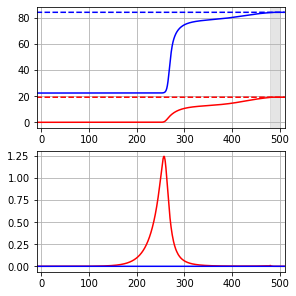

-------  19 0.4250000000000001 0.4750000000000002
set cost params:  0.05 0.0 78.0781978487026
interpolate adjoint :  True True True
initial cost =  375.75624796199895
RUN  0 , total integrated cost =  375.75624796199895
Gradient descend method:  None
RUN  1 , total integrated cost =  375.75624796199895
Control only changes marginally.
RUN  1 , total integrated cost =  375.75624796199895
Improved over  1  iterations in  0.4886943369929213  seconds by  0.0  percent.
cost splitting :  0.15885786827006051 [4.81244493e+00 1.63665153e-05]


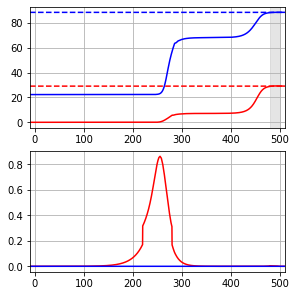

-------  20 0.4500000000000001 0.4750000000000002
set cost params:  0.05 0.0 84.02680661612636
interpolate adjoint :  True True True
initial cost =  313.7388019442301
RUN  0 , total integrated cost =  313.7388019442301
Gradient descend method:  None
RUN  1 , total integrated cost =  313.73880131191333
RUN  2 , total integrated cost =  313.73880131144307
RUN  3 , total integrated cost =  313.73880131144307
Control only changes marginally.
RUN  3 , total integrated cost =  313.73880131144307
Improved over  3  iterations in  1.2740164429997094  seconds by  2.0169230197097932e-07  percent.
cost splitting :  2.418811486463776e-05 [3.73379416 0.        ]
set cost params:  0.05 0.0 85.45432322963143
interpolate adjoint :  True True True
initial cost =  319.0688545109282
RUN  0 , total integrated cost =  319.0688545109282
Gradient descend method:  None
RUN  1 , total integrated cost =  319.0688545109282
Control only changes marginally.
RUN  1 , total integrated cost =  319.0688545109282
Improv

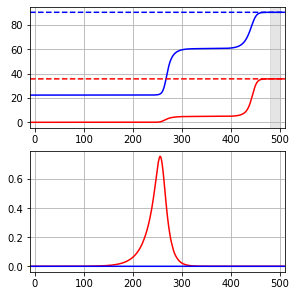

-------  21 0.47500000000000014 0.4750000000000002
set cost params:  0.05 0.0 266.7390070119114
interpolate adjoint :  True True True
initial cost =  718.9037637723417
RUN  0 , total integrated cost =  718.9037637723417
Gradient descend method:  None
RUN  1 , total integrated cost =  718.9037637723417
Control only changes marginally.
RUN  1 , total integrated cost =  718.9037637723417
Improved over  1  iterations in  0.4624533409951255  seconds by  0.0  percent.
cost splitting :  3.2555032989600325e-05 [2.69515798 0.        ]


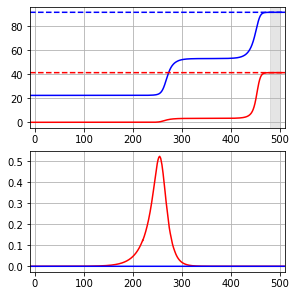

-------  22 0.5000000000000002 0.4750000000000002
set cost params:  0.05 0.0 477.86614182502757
interpolate adjoint :  True True True
initial cost =  775.4990374925264
RUN  0 , total integrated cost =  775.4990374925264
Gradient descend method:  None
RUN  1 , total integrated cost =  775.49903249336
RUN  2 , total integrated cost =  775.49903249336
Control only changes marginally.
RUN  2 , total integrated cost =  775.49903249336
Improved over  2  iterations in  0.9648183329991298  seconds by  6.44638646463136e-07  percent.
cost splitting :  0.0003269701709658982 [1.62283734 0.        ]


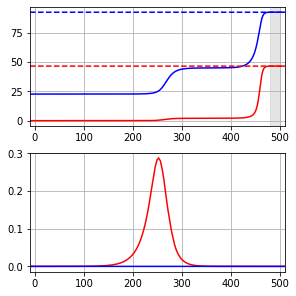

-------  23 0.5250000000000001 0.4750000000000002
set cost params:  0.05 0.0 92.75530948854906
interpolate adjoint :  True True True
initial cost =  37.87169012450485
RUN  0 , total integrated cost =  37.87169012450485
Gradient descend method:  None
RUN  1 , total integrated cost =  37.85320832190296
RUN  2 , total integrated cost =  37.85319705277465
RUN  3 , total integrated cost =  37.85319705145213
RUN  4 , total integrated cost =  37.853197051435956
RUN  5 , total integrated cost =  37.853197051435956
Control only changes marginally.
RUN  5 , total integrated cost =  37.853197051435956
Improved over  5  iterations in  1.6085505829978501  seconds by  0.04883086286379523  percent.
cost splitting :  0.011726214405738285 [0.40809104 0.        ]
set cost params:  0.05 0.0 2868.0729941018367
interpolate adjoint :  True True True
initial cost =  1170.4354780739602
RUN  0 , total integrated cost =  1170.4354780739602
Gradient descend method:  None
RUN  1 , total integrated cost =  1170.38

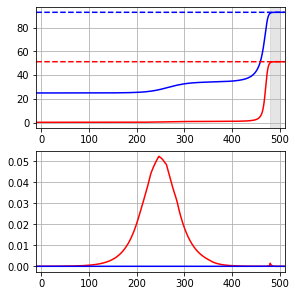

-------  24 0.4000000000000001 0.5000000000000002
-------  25 0.4250000000000001 0.5000000000000002
set cost params:  0.05 0.0 71.77064856277363
interpolate adjoint :  True True True
initial cost =  388.29929042208755
RUN  0 , total integrated cost =  388.29929042208755
Gradient descend method:  None
RUN  1 , total integrated cost =  388.29929042208755
Control only changes marginally.
RUN  1 , total integrated cost =  388.29929042208755
Improved over  1  iterations in  0.366587726995931  seconds by  0.0  percent.
cost splitting :  0.09379037364445515 [5.41021436e+00 1.00221689e-07]


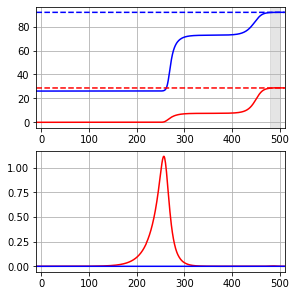

-------  26 0.4500000000000001 0.5000000000000002
set cost params:  0.05 0.0 13.20274540224695
interpolate adjoint :  True True True
initial cost =  58.21624899681394
RUN  0 , total integrated cost =  58.21624899681394
Gradient descend method:  None
RUN  1 , total integrated cost =  58.21624899681394
Control only changes marginally.
RUN  1 , total integrated cost =  58.21624899681394
Improved over  1  iterations in  0.3673250720021315  seconds by  0.0  percent.
cost splitting :  2.7011183254092666e-05 [4.40940470e+00 7.81198155e-11]


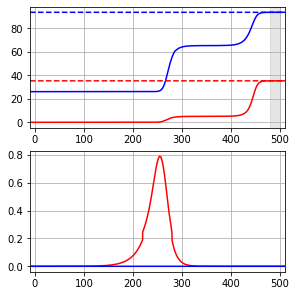

-------  27 0.47500000000000014 0.5000000000000002
set cost params:  0.05 0.0 192.0848120317502
interpolate adjoint :  True True True
initial cost =  643.0379673679494
RUN  0 , total integrated cost =  643.0379673679494
Gradient descend method:  None
RUN  1 , total integrated cost =  643.0379673679494
Control only changes marginally.
RUN  1 , total integrated cost =  643.0379673679494
Improved over  1  iterations in  0.39732643800380174  seconds by  0.0  percent.
cost splitting :  0.0021560389412662354 [3.34767675 0.        ]


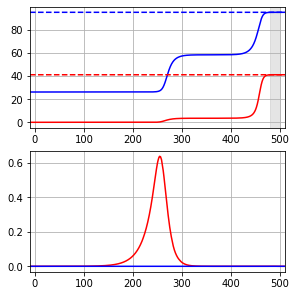

-------  28 0.5000000000000002 0.5000000000000002
set cost params:  0.05 0.0 119.28447061618893
interpolate adjoint :  True True True
initial cost =  272.25535070621413
RUN  0 , total integrated cost =  272.25535070621413
Gradient descend method:  None
RUN  1 , total integrated cost =  272.25535066454535
RUN  2 , total integrated cost =  272.2553506625776
RUN  3 , total integrated cost =  272.2553506625776
Control only changes marginally.
RUN  3 , total integrated cost =  272.2553506625776
Improved over  3  iterations in  1.0392471240047598  seconds by  1.602779775566887e-08  percent.
cost splitting :  2.1386734603408754e-05 [2.28240397 0.        ]
set cost params:  0.05 0.0 351.38999845974445
interpolate adjoint :  True True True
initial cost =  802.0139294544316
RUN  0 , total integrated cost =  802.0139294544316
Gradient descend method:  None
RUN  1 , total integrated cost =  802.0139278277117
RUN  2 , total integrated cost =  802.0139278277117
Control only changes marginally.
RUN  

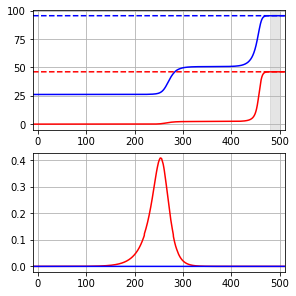

-------  29 0.5250000000000001 0.5000000000000002
set cost params:  0.05 0.0 741.9651402458501
interpolate adjoint :  True True True
initial cost =  845.8105464341157
RUN  0 , total integrated cost =  845.8105464341157
Gradient descend method:  None
RUN  1 , total integrated cost =  845.8105158567554
RUN  2 , total integrated cost =  845.8105158274435
RUN  3 , total integrated cost =  845.8105158274435
Control only changes marginally.
RUN  3 , total integrated cost =  845.8105158274435
Improved over  3  iterations in  1.0434221460018307  seconds by  3.618620311840459e-06  percent.
cost splitting :  0.0029009999170278226 [1.13995972 0.        ]
set cost params:  0.05 0.0 842.8897099895102
interpolate adjoint :  True True True
initial cost =  960.8604597198944
RUN  0 , total integrated cost =  960.8604597198944
Gradient descend method:  None
RUN  1 , total integrated cost =  960.860458409995
RUN  2 , total integrated cost =  960.8604559549005
RUN  3 , total integrated cost =  960.8604539

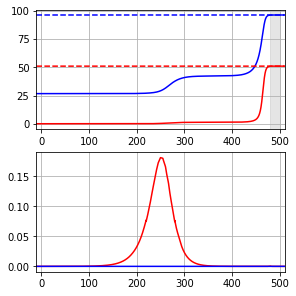

-------  30 0.4250000000000001 0.5250000000000002
set cost params:  0.05 0.0 18.11144462552869
interpolate adjoint :  True True True
initial cost =  108.18895537306526
RUN  0 , total integrated cost =  108.18895537306526
Gradient descend method:  None
RUN  1 , total integrated cost =  108.18895537306526
Control only changes marginally.
RUN  1 , total integrated cost =  108.18895537306526
Improved over  1  iterations in  0.3352238990046317  seconds by  0.0  percent.
cost splitting :  0.0003599937479490332 [5.97351231 0.        ]


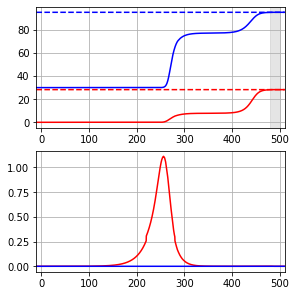

-------  31 0.4500000000000001 0.5250000000000002
set cost params:  0.05 0.0 75.18255011565273
interpolate adjoint :  True True True
initial cost =  371.56320781053216
RUN  0 , total integrated cost =  371.56320781053216
Gradient descend method:  None
RUN  1 , total integrated cost =  371.56320781053216
Control only changes marginally.
RUN  1 , total integrated cost =  371.56320781053216
Improved over  1  iterations in  0.37027751001005527  seconds by  0.0  percent.
cost splitting :  2.7691126356524063e-05 [4.94214689 0.        ]


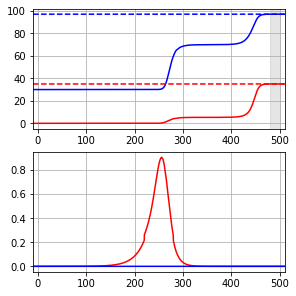

-------  32 0.47500000000000014 0.5250000000000002
set cost params:  0.05 0.0 41.58583162271227
interpolate adjoint :  True True True
initial cost =  163.70697095607105
RUN  0 , total integrated cost =  163.70697095607105
Gradient descend method:  None
RUN  1 , total integrated cost =  163.70697095607105
Control only changes marginally.
RUN  1 , total integrated cost =  163.70697095607105
Improved over  1  iterations in  0.37076785499812104  seconds by  0.0  percent.
cost splitting :  4.44621941320992e-06 [3.93660447 0.        ]


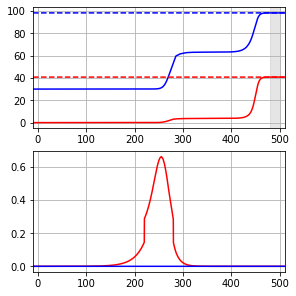

-------  33 0.5000000000000002 0.5250000000000002
set cost params:  0.05 0.0 311.3090762962086
interpolate adjoint :  True True True
initial cost =  883.7788075552348
RUN  0 , total integrated cost =  883.7788075552348
Gradient descend method:  None
RUN  1 , total integrated cost =  883.7788062806828
RUN  2 , total integrated cost =  883.7788062725851
RUN  3 , total integrated cost =  883.7788062725851
Control only changes marginally.
RUN  3 , total integrated cost =  883.7788062725851
Improved over  3  iterations in  1.06127180698968  seconds by  1.4513243229430373e-07  percent.
cost splitting :  1.5080469355776344e-05 [2.83891114 0.        ]
set cost params:  0.05 0.0 82.49349093662445
interpolate adjoint :  True True True
initial cost =  234.19169137359492
RUN  0 , total integrated cost =  234.19169137359492
Gradient descend method:  None
RUN  1 , total integrated cost =  234.1916911109304
RUN  2 , total integrated cost =  234.1916911109304
Control only changes marginally.
RUN  2 , 

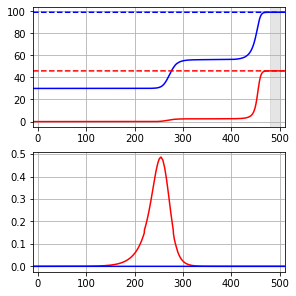

-------  34 0.5250000000000001 0.5250000000000002
set cost params:  0.05 0.0 183.08939702739076
interpolate adjoint :  True True True
initial cost =  315.23223798969576
RUN  0 , total integrated cost =  315.23223798969576
Gradient descend method:  None
RUN  1 , total integrated cost =  315.232237796678
RUN  2 , total integrated cost =  315.2322377479753
RUN  3 , total integrated cost =  315.2322377072422
RUN  4 , total integrated cost =  315.2322376990224
RUN  5 , total integrated cost =  315.2322376890316
RUN  6 , total integrated cost =  315.2322376890316
Control only changes marginally.
RUN  6 , total integrated cost =  315.2322376890316
Improved over  6  iterations in  1.793682012008503  seconds by  9.537862410979869e-08  percent.
cost splitting :  0.0001316507913429431 [1.72173941 0.        ]
set cost params:  0.05 0.0 370.22433133356316
interpolate adjoint :  True True True
initial cost =  637.4298297783008
RUN  0 , total integrated cost =  637.4298297783008
Gradient descend meth

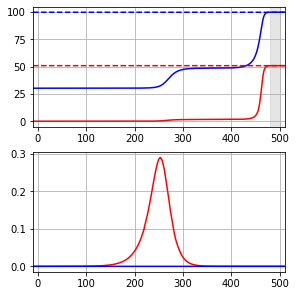

-------  35 0.5500000000000003 0.5250000000000002
set cost params:  0.05 0.0 2002.1272116707473
interpolate adjoint :  True True True
initial cost =  825.6698178268141
RUN  0 , total integrated cost =  825.6698178268141
Gradient descend method:  None
RUN  1 , total integrated cost =  825.6696367118037
RUN  2 , total integrated cost =  825.6696367118037
Control only changes marginally.
RUN  2 , total integrated cost =  825.6696367118037
Improved over  2  iterations in  0.7371778980013914  seconds by  2.193552512608221e-05  percent.
cost splitting :  0.7835025019656439 [0.41237662 0.        ]


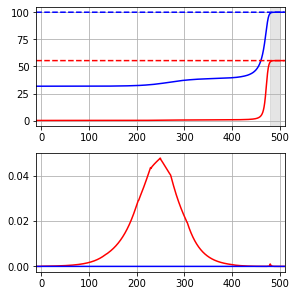

-------  36 0.4250000000000001 0.5500000000000003
set cost params:  0.05 0.0 54.74519052528174
interpolate adjoint :  True True True
initial cost =  376.1159437152256
RUN  0 , total integrated cost =  376.1159437152256
Gradient descend method:  None
RUN  1 , total integrated cost =  376.11594299158725
RUN  2 , total integrated cost =  376.1159423399324
RUN  3 , total integrated cost =  376.1159416401423
RUN  4 , total integrated cost =  376.1159409819532
RUN  5 , total integrated cost =  376.11594028878113
RUN  6 , total integrated cost =  376.1159396286331
RUN  7 , total integrated cost =  376.11593893744424
RUN  8 , total integrated cost =  376.1159382766935
RUN  9 , total integrated cost =  376.11593758611554
RUN  10 , total integrated cost =  376.1159369251748
RUN  11 , total integrated cost =  376.1159362347894
RUN  12 , total integrated cost =  376.1159355737863
RUN  13 , total integrated cost =  376.11593488346466
RUN  14 , total integrated cost =  376.1159342224373
RUN  15 , to

RUN  7 , total integrated cost =  336.35741687932693
RUN  8 , total integrated cost =  336.35741564859615
RUN  9 , total integrated cost =  336.35741417015544
RUN  10 , total integrated cost =  336.35741293947194
RUN  11 , total integrated cost =  336.35741146098326
RUN  12 , total integrated cost =  336.3574102302905
RUN  13 , total integrated cost =  336.3574087518106
RUN  14 , total integrated cost =  336.35740752111326
RUN  15 , total integrated cost =  336.3574060426388
RUN  16 , total integrated cost =  336.3574048119367
RUN  17 , total integrated cost =  336.35740333346666
RUN  18 , total integrated cost =  336.3574021027602
RUN  19 , total integrated cost =  336.3574006242958
RUN  20 , total integrated cost =  336.357399393584
RUN  30 , total integrated cost =  336.35738584770934
RUN  30 , total integrated cost =  336.35738584770934
Improved over  30  iterations in  7.558418834989425  seconds by  1.231291952308311e-05  percent.
cost splitting :  0.0005622673274644008 [6.8200209

RUN  17 , total integrated cost =  293.4324143855358
RUN  18 , total integrated cost =  293.4324138666557
RUN  19 , total integrated cost =  293.43241330263356
RUN  20 , total integrated cost =  293.4324127843583
RUN  30 , total integrated cost =  293.4324072821286
RUN  30 , total integrated cost =  293.4324072821286
Improved over  30  iterations in  7.524732569989283  seconds by  6.039735694685078e-06  percent.
cost splitting :  0.0005745823946250463 [6.82001883e+00 8.61986631e-11]
set cost params:  0.05 0.0 12.69543883092107
interpolate adjoint :  True True True
initial cost =  86.58316065136252
RUN  0 , total integrated cost =  86.58316065136252
Gradient descend method:  None
RUN  1 , total integrated cost =  86.58316037935596
RUN  2 , total integrated cost =  86.5831590552157
RUN  3 , total integrated cost =  86.58315797679342
RUN  4 , total integrated cost =  86.58315782501077
RUN  5 , total integrated cost =  86.58315767983532
RUN  6 , total integrated cost =  86.58315754034946
R

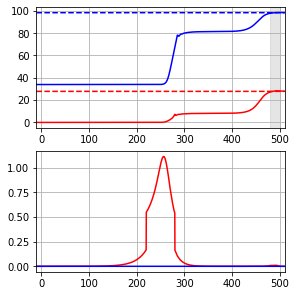

-------  37 0.4500000000000001 0.5500000000000003
set cost params:  0.05 0.0 94.58346559579522
interpolate adjoint :  True True True
initial cost =  508.7134121075398
RUN  0 , total integrated cost =  508.7134121075398
Gradient descend method:  None
RUN  1 , total integrated cost =  508.7134121075398
Control only changes marginally.
RUN  1 , total integrated cost =  508.7134121075398
Improved over  1  iterations in  0.3696934869949473  seconds by  0.0  percent.
cost splitting :  8.444794401225395e-05 [5.37846023e+00 3.51519284e-11]


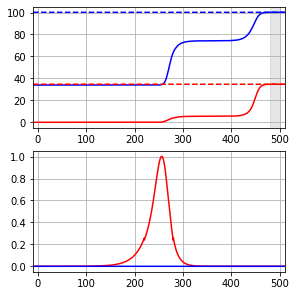

-------  38 0.47500000000000014 0.5500000000000003
set cost params:  0.05 0.0 131.31391852810106
interpolate adjoint :  True True True
initial cost =  573.3681442096002
RUN  0 , total integrated cost =  573.3681442096002
Gradient descend method:  None
RUN  1 , total integrated cost =  573.3681440341289
RUN  2 , total integrated cost =  573.3681439961648
RUN  3 , total integrated cost =  573.3681439961648
Control only changes marginally.
RUN  3 , total integrated cost =  573.3681439961648
Improved over  3  iterations in  1.0452444230031688  seconds by  3.722485075741133e-08  percent.
cost splitting :  6.259182912832428e-06 [4.36639276 0.        ]
set cost params:  0.05 0.0 59.07420968949774
interpolate adjoint :  True True True
initial cost =  257.9412020445284
RUN  0 , total integrated cost =  257.9412020445284
Gradient descend method:  None
RUN  1 , total integrated cost =  257.9412020445284
Control only changes marginally.
RUN  1 , total integrated cost =  257.9412020445284
Improved 

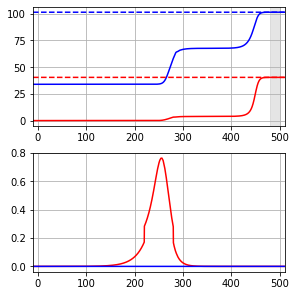

-------  39 0.5000000000000002 0.5500000000000003
set cost params:  0.05 0.0 87.12007482855726
interpolate adjoint :  True True True
initial cost =  286.9906587392141
RUN  0 , total integrated cost =  286.9906587392141
Gradient descend method:  None
RUN  1 , total integrated cost =  286.9906587392141
Control only changes marginally.
RUN  1 , total integrated cost =  286.9906587392141
Improved over  1  iterations in  0.373379942990141  seconds by  0.0  percent.
cost splitting :  1.4779473097772367e-05 [3.29419664e+00 4.92349108e-11]


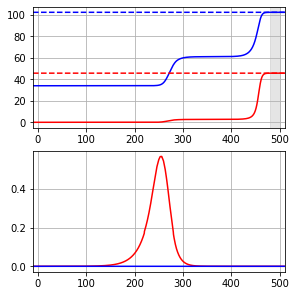

-------  40 0.5250000000000001 0.5500000000000003
set cost params:  0.05 0.0 189.06397905115253
interpolate adjoint :  True True True
initial cost =  415.05211766157976
RUN  0 , total integrated cost =  415.05211766157976
Gradient descend method:  None
RUN  1 , total integrated cost =  415.05211723640195
RUN  2 , total integrated cost =  415.05211722685596
RUN  3 , total integrated cost =  415.05211722685596
Control only changes marginally.
RUN  3 , total integrated cost =  415.05211722685596
Improved over  3  iterations in  1.039174154997454  seconds by  1.0473956990608713e-07  percent.
cost splitting :  4.241743285247527e-05 [2.1952998 0.       ]
set cost params:  0.05 0.0 204.1911938474064
interpolate adjoint :  True True True
initial cost =  448.2608888202487
RUN  0 , total integrated cost =  448.2608888202487
Gradient descend method:  None
RUN  1 , total integrated cost =  448.2608888202487
Control only changes marginally.
RUN  1 , total integrated cost =  448.2608888202487
Improv

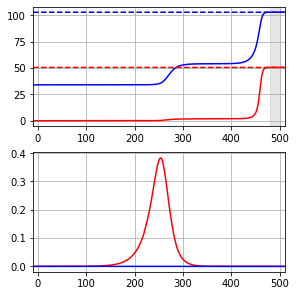

-------  41 0.5500000000000003 0.5500000000000003
set cost params:  0.05 0.0 1245.5765403853738
interpolate adjoint :  True True True
initial cost =  1237.1210554526192
RUN  0 , total integrated cost =  1237.1210554526192
Gradient descend method:  None
RUN  1 , total integrated cost =  1237.121049116592
RUN  2 , total integrated cost =  1237.1210490934297
RUN  3 , total integrated cost =  1237.1210490934297
Control only changes marginally.
RUN  3 , total integrated cost =  1237.1210490934297
Improved over  3  iterations in  1.0509763809968717  seconds by  5.140313135143515e-07  percent.
cost splitting :  0.020276080113158755 [0.99321077 0.        ]
set cost params:  0.05 0.0 459.01694104574227
interpolate adjoint :  True True True
initial cost =  455.9015834544745
RUN  0 , total integrated cost =  455.9015834544745
Gradient descend method:  None
RUN  1 , total integrated cost =  455.90132507197086
RUN  2 , total integrated cost =  455.90132476432257
RUN  3 , total integrated cost =  45

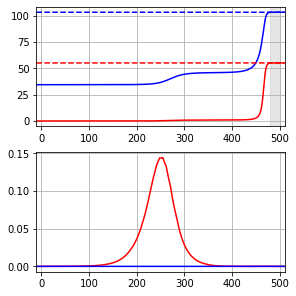

-------  42 0.4250000000000001 0.5750000000000003
set cost params:  0.05 0.0 32.25903749328432
interpolate adjoint :  True True True
initial cost =  218.39923653353878
RUN  0 , total integrated cost =  218.39923653353878
Gradient descend method:  None
RUN  1 , total integrated cost =  218.39923653353878
Control only changes marginally.
RUN  1 , total integrated cost =  218.39923653353878
Improved over  1  iterations in  0.3656485539977439  seconds by  0.0  percent.
cost splitting :  0.6396006526087044 [6.76917316e+00 7.61786314e-06]


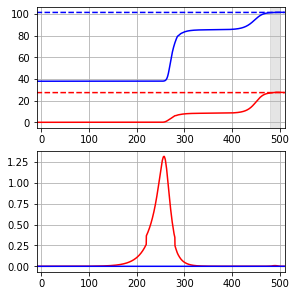

-------  43 0.4500000000000001 0.5750000000000003
set cost params:  0.05 0.0 41.488222674183376
interpolate adjoint :  True True True
initial cost =  238.85960319634484
RUN  0 , total integrated cost =  238.85960319634484
Gradient descend method:  None
RUN  1 , total integrated cost =  238.85960319273494
RUN  2 , total integrated cost =  238.85960317996881
RUN  3 , total integrated cost =  238.85960317996881
Control only changes marginally.
RUN  3 , total integrated cost =  238.85960317996881
Improved over  3  iterations in  0.9929132730030688  seconds by  6.855913170511485e-09  percent.
cost splitting :  2.167183593746405e-05 [5.75728693 0.        ]
set cost params:  0.05 0.0 28.82821360205414
interpolate adjoint :  True True True
initial cost =  165.9722984319875
RUN  0 , total integrated cost =  165.9722984319875
Gradient descend method:  None
RUN  1 , total integrated cost =  165.97229840379634
RUN  2 , total integrated cost =  165.97229840379634
Control only changes marginally.
RU

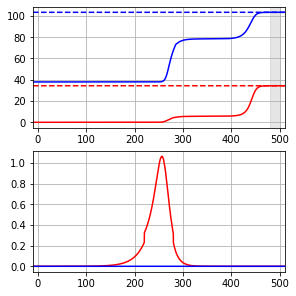

-------  44 0.47500000000000014 0.5750000000000003
set cost params:  0.05 0.0 116.31032150674551
interpolate adjoint :  True True True
initial cost =  548.6856986013403
RUN  0 , total integrated cost =  548.6856986013403
Gradient descend method:  None
RUN  1 , total integrated cost =  548.6856986013403
Control only changes marginally.
RUN  1 , total integrated cost =  548.6856986013403
Improved over  1  iterations in  0.36693273500713985  seconds by  0.0  percent.
cost splitting :  1.495510202763196e-06 [4.71742913 0.        ]


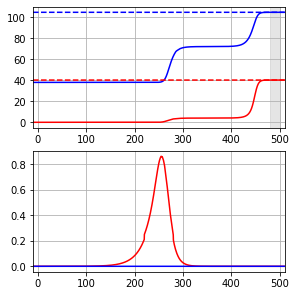

-------  45 0.5000000000000002 0.5750000000000003
set cost params:  0.05 0.0 20.189396451621036
interpolate adjoint :  True True True
initial cost =  74.92947729296492
RUN  0 , total integrated cost =  74.92947729296492
Gradient descend method:  None
RUN  1 , total integrated cost =  74.92947695153954
RUN  2 , total integrated cost =  74.92947695153954
Control only changes marginally.
RUN  2 , total integrated cost =  74.92947695153954
Improved over  2  iterations in  0.7277936559985392  seconds by  4.556623025564477e-07  percent.
cost splitting :  9.892470160270242e-07 [3.71132823 0.        ]


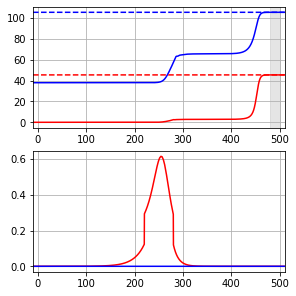

-------  46 0.5250000000000001 0.5750000000000003
set cost params:  0.05 0.0 358.06082264705805
interpolate adjoint :  True True True
initial cost =  931.8788570919462
RUN  0 , total integrated cost =  931.8788570919462
Gradient descend method:  None
RUN  1 , total integrated cost =  931.8788559856886
RUN  2 , total integrated cost =  931.8788559134658
RUN  3 , total integrated cost =  931.8788558487472
RUN  4 , total integrated cost =  931.8788557092123
RUN  5 , total integrated cost =  931.8788555939809
RUN  6 , total integrated cost =  931.8788554139301
RUN  7 , total integrated cost =  931.8788552528864
RUN  8 , total integrated cost =  931.8788551661426
RUN  9 , total integrated cost =  931.8788550842535
RUN  10 , total integrated cost =  931.8788550074643
RUN  11 , total integrated cost =  931.8788549367467
RUN  12 , total integrated cost =  931.8788548293626
RUN  13 , total integrated cost =  931.8788547251478
RUN  14 , total integrated cost =  931.8788544646308
RUN  15 , total 

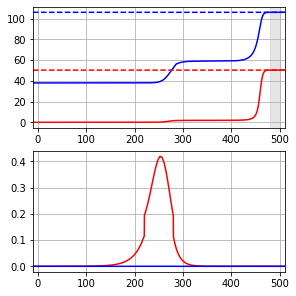

-------  47 0.5500000000000003 0.5750000000000003
set cost params:  0.05 0.0 647.445914835011
interpolate adjoint :  True True True
initial cost =  925.8826352651794
RUN  0 , total integrated cost =  925.8826352651794
Gradient descend method:  None
RUN  1 , total integrated cost =  925.882630600493
RUN  2 , total integrated cost =  925.8826305349105
RUN  3 , total integrated cost =  925.8826305030176
RUN  4 , total integrated cost =  925.8826305030176
Control only changes marginally.
RUN  4 , total integrated cost =  925.8826305030176
Improved over  4  iterations in  1.3088789799949154  seconds by  5.143375148009e-07  percent.
cost splitting :  0.002842059300789288 [1.4300538 0.       ]
set cost params:  0.05 0.0 21.37746571259133
interpolate adjoint :  True True True
initial cost =  30.571068100242712
RUN  0 , total integrated cost =  30.571068100242712
Gradient descend method:  None
RUN  1 , total integrated cost =  30.570946520188844
RUN  2 , total integrated cost =  30.570946485032

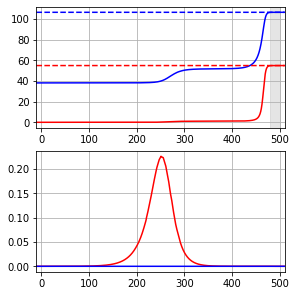

-------  48 0.4250000000000001 0.6000000000000003
set cost params:  0.05 0.0 32.18892762536224
interpolate adjoint :  True True True
initial cost =  243.05342313250202
RUN  0 , total integrated cost =  243.05342313250202
Gradient descend method:  None
RUN  1 , total integrated cost =  243.05342313250202
Control only changes marginally.
RUN  1 , total integrated cost =  243.05342313250202
Improved over  1  iterations in  0.37898860999848694  seconds by  0.0  percent.
cost splitting :  0.9316062857521628 [7.54855903e+00 8.33283052e-04]


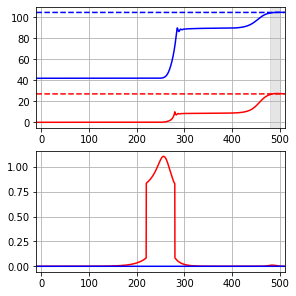

-------  49 0.4500000000000001 0.6000000000000003
set cost params:  0.05 0.0 80.71070880190354
interpolate adjoint :  True True True
initial cost =  489.7192279809631
RUN  0 , total integrated cost =  489.7192279809631
Gradient descend method:  None
RUN  1 , total integrated cost =  489.7192279809631
Control only changes marginally.
RUN  1 , total integrated cost =  489.7192279809631
Improved over  1  iterations in  0.36515757099550683  seconds by  0.0  percent.
cost splitting :  7.913581997900213e-05 [6.06758671 0.        ]


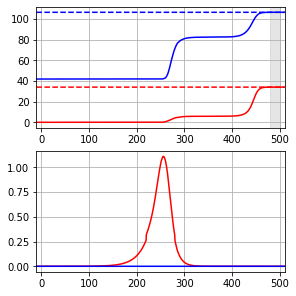

-------  50 0.47500000000000014 0.6000000000000003
set cost params:  0.05 0.0 156.2587742853595
interpolate adjoint :  True True True
initial cost =  782.2794310347182
RUN  0 , total integrated cost =  782.2794310347182
Gradient descend method:  None
RUN  1 , total integrated cost =  782.27943091481
RUN  2 , total integrated cost =  782.27943091481
Control only changes marginally.
RUN  2 , total integrated cost =  782.27943091481
Improved over  2  iterations in  0.7156802690005861  seconds by  1.5328055269492324e-08  percent.
cost splitting :  5.9073318106313184e-05 [5.00630721e+00 3.77549227e-16]


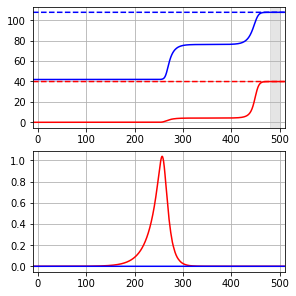

-------  51 0.5000000000000002 0.6000000000000003
set cost params:  0.05 0.0 240.49956869365343
interpolate adjoint :  True True True
initial cost =  959.6821855030336
RUN  0 , total integrated cost =  959.6821855030336
Gradient descend method:  None
RUN  1 , total integrated cost =  959.6821855030336
Control only changes marginally.
RUN  1 , total integrated cost =  959.6821855030336
Improved over  1  iterations in  0.37777299201115966  seconds by  0.0  percent.
cost splitting :  5.682487056151584e-06 [3.99036967 0.        ]


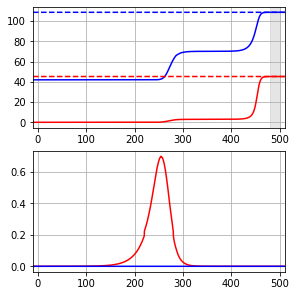

-------  52 0.5250000000000001 0.6000000000000003
set cost params:  0.05 0.0 268.4024650744727
interpolate adjoint :  True True True
initial cost =  781.203796588494
RUN  0 , total integrated cost =  781.203796588494
Gradient descend method:  None
RUN  1 , total integrated cost =  781.203796588494
Control only changes marginally.
RUN  1 , total integrated cost =  781.203796588494
Improved over  1  iterations in  0.3706113169901073  seconds by  0.0  percent.
cost splitting :  2.9635720556057475e-05 [2.91056863 0.        ]


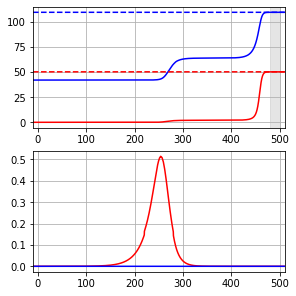

-------  53 0.5500000000000003 0.6000000000000003
set cost params:  0.05 0.0 779.1762366077375
interpolate adjoint :  True True True
initial cost =  1388.46322023061
RUN  0 , total integrated cost =  1388.46322023061
Gradient descend method:  None
RUN  1 , total integrated cost =  1388.4632198965307
RUN  2 , total integrated cost =  1388.4632198935992
RUN  3 , total integrated cost =  1388.4632198833417
RUN  4 , total integrated cost =  1388.4632198833417
Control only changes marginally.
RUN  4 , total integrated cost =  1388.4632198833417
Improved over  4  iterations in  1.3409564899920952  seconds by  2.501097640106309e-08  percent.
cost splitting :  0.0007479935508201358 [1.78196295 0.        ]
set cost params:  0.05 0.0 772.9040779323301
interpolate adjoint :  True True True
initial cost =  1377.2864655287517
RUN  0 , total integrated cost =  1377.2864655287517
Gradient descend method:  None
RUN  1 , total integrated cost =  1377.2864655287517
Control only changes marginally.
RUN  

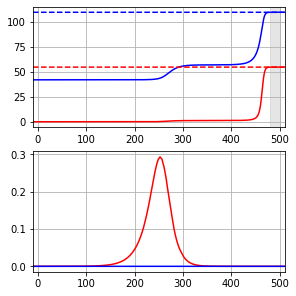

-------  54 0.5750000000000002 0.6000000000000003
set cost params:  0.05 0.0 3667.1840338318802
interpolate adjoint :  True True True
initial cost =  1586.8481829999623
RUN  0 , total integrated cost =  1586.8481829999623
Gradient descend method:  None
RUN  1 , total integrated cost =  1586.8307682495304
RUN  2 , total integrated cost =  1586.8307582965977
RUN  3 , total integrated cost =  1586.830758210981
RUN  4 , total integrated cost =  1586.830758185973
RUN  5 , total integrated cost =  1586.8307581806275
RUN  6 , total integrated cost =  1586.830758179765
RUN  7 , total integrated cost =  1586.830758179765
Control only changes marginally.
RUN  7 , total integrated cost =  1586.830758179765
Improved over  7  iterations in  2.1088417560094967  seconds by  0.0010980773324007487  percent.
cost splitting :  1.9628954232828126 [0.43268421 0.        ]
set cost params:  0.05 0.0 3936.51889624686
interpolate adjoint :  True True True
initial cost =  1703.3676993801803
RUN  0 , total integ

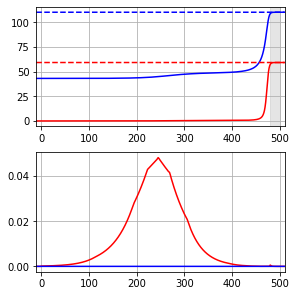

-------  55 0.4250000000000001 0.6250000000000003
set cost params:  0.05 0.0 12.443206919644295
interpolate adjoint :  True True True
initial cost =  91.66950446341195
RUN  0 , total integrated cost =  91.66950446341195
Gradient descend method:  None
RUN  1 , total integrated cost =  91.66950446341195
Control only changes marginally.
RUN  1 , total integrated cost =  91.66950446341195
Improved over  1  iterations in  0.35887770300905686  seconds by  0.0  percent.
cost splitting :  0.0871272963368445 [7.36668197e+00 1.22252075e-10]


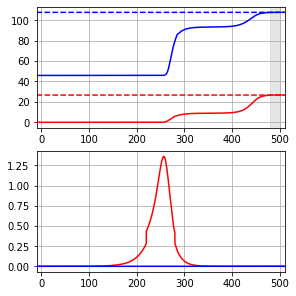

-------  56 0.4500000000000001 0.6250000000000003
set cost params:  0.05 0.0 57.58099782954015
interpolate adjoint :  True True True
initial cost =  368.8709328991818
RUN  0 , total integrated cost =  368.8709328991818
Gradient descend method:  None
RUN  1 , total integrated cost =  368.8709328991818
Control only changes marginally.
RUN  1 , total integrated cost =  368.8709328991818
Improved over  1  iterations in  0.40690735599491745  seconds by  0.0  percent.
cost splitting :  0.002381360190864792 [6.40612054e+00 1.33297048e-08]


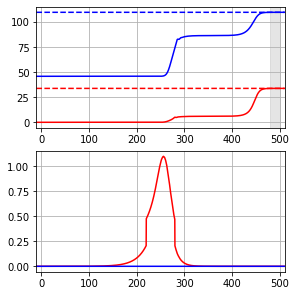

-------  57 0.47500000000000014 0.6250000000000003
set cost params:  0.05 0.0 108.18840570973553
interpolate adjoint :  True True True
initial cost =  571.7569475739326
RUN  0 , total integrated cost =  571.7569475739326
Gradient descend method:  None
RUN  1 , total integrated cost =  571.7569475739326
Control only changes marginally.
RUN  1 , total integrated cost =  571.7569475739326
Improved over  1  iterations in  0.36467802501283586  seconds by  0.0  percent.
cost splitting :  6.9555648908564505e-06 [5.28482644 0.        ]


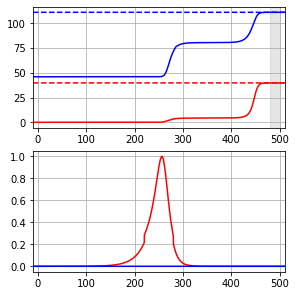

-------  58 0.5000000000000002 0.6250000000000003
set cost params:  0.05 0.0 33.559312641990815
interpolate adjoint :  True True True
initial cost =  147.04658824750055
RUN  0 , total integrated cost =  147.04658824750055
Gradient descend method:  None
RUN  1 , total integrated cost =  147.0465878835464
RUN  2 , total integrated cost =  147.04658787075726
RUN  3 , total integrated cost =  147.04658785428842
RUN  4 , total integrated cost =  147.04658784697426
RUN  5 , total integrated cost =  147.04658784697426
Control only changes marginally.
RUN  5 , total integrated cost =  147.04658784697426
Improved over  5  iterations in  1.4986360180046177  seconds by  2.723805465620899e-07  percent.
cost splitting :  4.0686324290430597e-07 [4.38169248 0.        ]
set cost params:  0.05 0.0 34.19279570148966
interpolate adjoint :  True True True
initial cost =  149.82231580478484
RUN  0 , total integrated cost =  149.82231580478484
Gradient descend method:  None
RUN  1 , total integrated cost = 

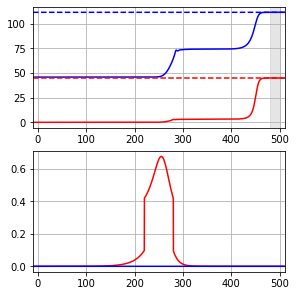

-------  59 0.5250000000000001 0.6250000000000003
set cost params:  0.05 0.0 35.275888009809414
interpolate adjoint :  True True True
initial cost =  112.2018699673211
RUN  0 , total integrated cost =  112.2018699673211
Gradient descend method:  None
RUN  1 , total integrated cost =  112.2018699673211
Control only changes marginally.
RUN  1 , total integrated cost =  112.2018699673211
Improved over  1  iterations in  0.35505649700644426  seconds by  0.0  percent.
cost splitting :  2.299098838642046e-06 [3.18069583 0.        ]


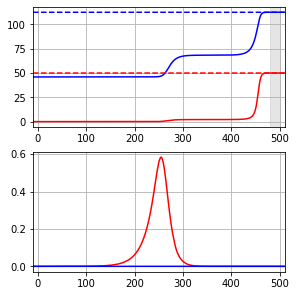

-------  60 0.5500000000000003 0.6250000000000003
set cost params:  0.05 0.0 605.7009480761226
interpolate adjoint :  True True True
initial cost =  1255.6117960222025
RUN  0 , total integrated cost =  1255.6117960222025
Gradient descend method:  None
RUN  1 , total integrated cost =  1255.611776424455
RUN  2 , total integrated cost =  1255.6117763808481
RUN  3 , total integrated cost =  1255.611776374517
RUN  4 , total integrated cost =  1255.6117763595155
RUN  5 , total integrated cost =  1255.6117763531308
RUN  6 , total integrated cost =  1255.611776282796
RUN  7 , total integrated cost =  1255.6117762254137
RUN  8 , total integrated cost =  1255.6117761467626
RUN  9 , total integrated cost =  1255.6117760502523
RUN  10 , total integrated cost =  1255.611776044405
RUN  11 , total integrated cost =  1255.6117760291108
RUN  12 , total integrated cost =  1255.6117760212994
RUN  13 , total integrated cost =  1255.6117728220765
RUN  14 , total integrated cost =  1255.6117699847007
RUN  

RUN  2 , total integrated cost =  1117.9028324228238
RUN  3 , total integrated cost =  1117.902832400258
RUN  4 , total integrated cost =  1117.9028323840862
RUN  5 , total integrated cost =  1117.9028323569717
RUN  6 , total integrated cost =  1117.9028323195705
RUN  7 , total integrated cost =  1117.902832312911
RUN  8 , total integrated cost =  1117.9028323003872
RUN  9 , total integrated cost =  1117.902832294902
RUN  10 , total integrated cost =  1117.9028322735933
RUN  11 , total integrated cost =  1117.9028322598701
RUN  12 , total integrated cost =  1117.9028322259567
RUN  13 , total integrated cost =  1117.9028321804187
RUN  14 , total integrated cost =  1117.9028321747414
RUN  15 , total integrated cost =  1117.9028321620424
RUN  16 , total integrated cost =  1117.902832155877
RUN  17 , total integrated cost =  1117.9028321270316
RUN  18 , total integrated cost =  1117.9028321061746
RUN  19 , total integrated cost =  1117.9028320754514
RUN  20 , total integrated cost =  1117.

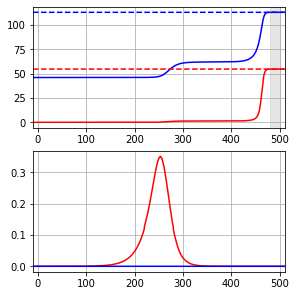

-------  61 0.5750000000000002 0.6250000000000003
set cost params:  0.05 0.0 235.41474928905305
interpolate adjoint :  True True True
initial cost =  191.96589594897574
RUN  0 , total integrated cost =  191.96589594897574
Gradient descend method:  None
RUN  1 , total integrated cost =  191.96478025776585
RUN  2 , total integrated cost =  191.96477784276465
RUN  3 , total integrated cost =  191.96477783940946
RUN  4 , total integrated cost =  191.964777839313
RUN  5 , total integrated cost =  191.964777839313
Control only changes marginally.
RUN  5 , total integrated cost =  191.964777839313
Improved over  5  iterations in  1.5265788170072483  seconds by  0.0005824522409199062  percent.
cost splitting :  0.01836838174073481 [0.81542835 0.        ]
set cost params:  0.05 0.0 352.11809480429923
interpolate adjoint :  True True True
initial cost =  287.1279937381247
RUN  0 , total integrated cost =  287.1279937381247
Gradient descend method:  None
RUN  1 , total integrated cost =  287.1278

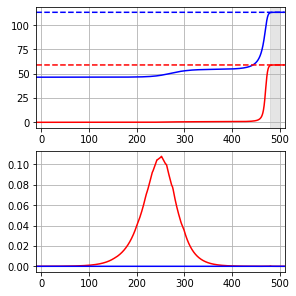

-------  62 0.4250000000000001 0.6500000000000004
set cost params:  0.05 0.0 41.98174217109667
interpolate adjoint :  True True True
initial cost =  330.3125046663333
RUN  0 , total integrated cost =  330.3125046663333
Gradient descend method:  None
RUN  1 , total integrated cost =  330.3125036958352
RUN  2 , total integrated cost =  330.3125022311652
RUN  3 , total integrated cost =  322.93508149578463
RUN  4 , total integrated cost =  318.90862131756825
RUN  5 , total integrated cost =  318.7523656791263
RUN  6 , total integrated cost =  318.7471872586912
RUN  7 , total integrated cost =  318.74713601796674
RUN  8 , total integrated cost =  318.7470819706603
RUN  9 , total integrated cost =  318.74703794581825
RUN  10 , total integrated cost =  318.74696370374875
RUN  11 , total integrated cost =  318.7469062038221
RUN  12 , total integrated cost =  318.7468284301089
RUN  13 , total integrated cost =  318.7467742901031
RUN  14 , total integrated cost =  318.7466811937094
RUN  15 , to

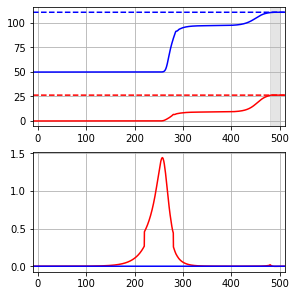

-------  63 0.4500000000000001 0.6500000000000004
set cost params:  0.05 0.0 28.71955753592095
interpolate adjoint :  True True True
initial cost =  191.22542343417743
RUN  0 , total integrated cost =  191.22542343417743
Gradient descend method:  None
RUN  1 , total integrated cost =  191.22542341236698
RUN  2 , total integrated cost =  191.22542338852122
RUN  3 , total integrated cost =  191.2254233618286
RUN  4 , total integrated cost =  191.2254233329099
RUN  5 , total integrated cost =  191.22542330026076
RUN  6 , total integrated cost =  191.2254232576163
RUN  7 , total integrated cost =  191.22542320928375
RUN  8 , total integrated cost =  188.90022964939888
RUN  9 , total integrated cost =  187.38995147138294
RUN  10 , total integrated cost =  187.3207303907282
RUN  11 , total integrated cost =  187.31817392645303
RUN  12 , total integrated cost =  187.3181055388535
RUN  13 , total integrated cost =  187.31810248212426
RUN  14 , total integrated cost =  187.31810247114728
RUN  1

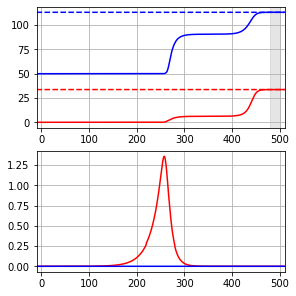

-------  64 0.47500000000000014 0.6500000000000004
set cost params:  0.05 0.0 71.23090603209965
interpolate adjoint :  True True True
initial cost =  393.6799690477316
RUN  0 , total integrated cost =  393.6799690477316
Gradient descend method:  None
RUN  1 , total integrated cost =  393.6799690477316
Control only changes marginally.
RUN  1 , total integrated cost =  393.6799690477316
Improved over  1  iterations in  0.3838262439967366  seconds by  0.0  percent.
cost splitting :  1.4891640739953394e-05 [5.52681397e+00 2.23286138e-08]


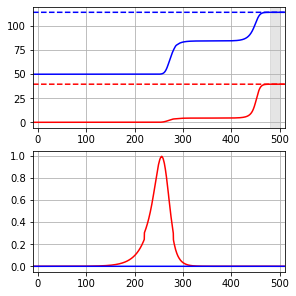

-------  65 0.5000000000000002 0.6500000000000004
set cost params:  0.05 0.0 103.13820092785045
interpolate adjoint :  True True True
initial cost =  462.9643577898281
RUN  0 , total integrated cost =  462.9643577898281
Gradient descend method:  None
RUN  1 , total integrated cost =  462.9643577898281
Control only changes marginally.
RUN  1 , total integrated cost =  462.9643577898281
Improved over  1  iterations in  0.38306387899501715  seconds by  0.0  percent.
cost splitting :  1.4974659174543384e-05 [4.48877674 0.        ]


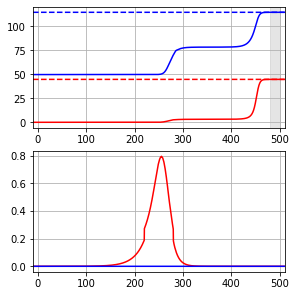

-------  66 0.5250000000000001 0.6500000000000004
set cost params:  0.05 0.0 127.16975476439768
interpolate adjoint :  True True True
initial cost =  443.83935574561445
RUN  0 , total integrated cost =  443.83935574561445
Gradient descend method:  None
RUN  1 , total integrated cost =  443.8393557208939
RUN  2 , total integrated cost =  443.8393557208939
Control only changes marginally.
RUN  2 , total integrated cost =  443.8393557208939
Improved over  2  iterations in  0.7642315099947155  seconds by  5.569717131947982e-09  percent.
cost splitting :  6.317521310998323e-06 [3.49013298 0.        ]


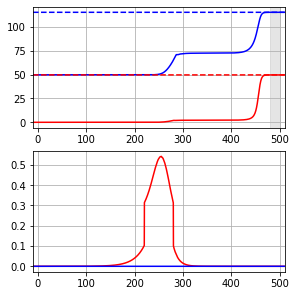

-------  67 0.5500000000000003 0.6500000000000004
set cost params:  0.05 0.0 444.5791518969967
interpolate adjoint :  True True True
initial cost =  1031.4689268547882
RUN  0 , total integrated cost =  1031.4689268547882
Gradient descend method:  None
RUN  1 , total integrated cost =  1031.4689222131803
RUN  2 , total integrated cost =  1031.4689222131803
Control only changes marginally.
RUN  2 , total integrated cost =  1031.4689222131803
Improved over  2  iterations in  0.7320857810118468  seconds by  4.499997743323547e-07  percent.
cost splitting :  8.94331373376926e-05 [2.32010186 0.        ]


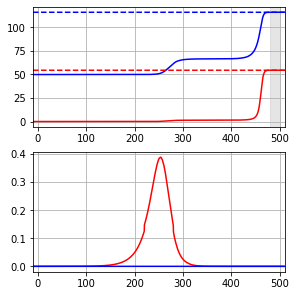

-------  68 0.5750000000000002 0.6500000000000004
set cost params:  0.05 0.0 330.6657658868283
interpolate adjoint :  True True True
initial cost =  366.828752971178
RUN  0 , total integrated cost =  366.828752971178
Gradient descend method:  None
RUN  1 , total integrated cost =  366.82821019538113
RUN  2 , total integrated cost =  366.82821003923607
RUN  3 , total integrated cost =  366.82821003923607
Control only changes marginally.
RUN  3 , total integrated cost =  366.82821003923607
Improved over  3  iterations in  1.0106358420016477  seconds by  0.000148006920824173  percent.
cost splitting :  0.004767221407394107 [1.10936181 0.        ]
set cost params:  0.05 0.0 340.86729822585414
interpolate adjoint :  True True True
initial cost =  378.14540039275715
RUN  0 , total integrated cost =  378.14540039275715
Gradient descend method:  None
RUN  1 , total integrated cost =  378.145400280593
RUN  2 , total integrated cost =  378.145400280593
Control only changes marginally.
RUN  2 , t

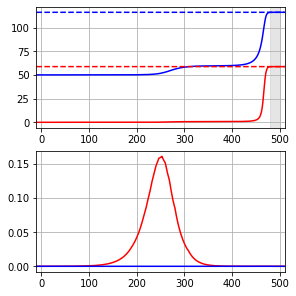

-------  69 0.4250000000000001 0.6750000000000004
set cost params:  0.05 0.0 17.840454077757553
interpolate adjoint :  True True True
initial cost =  146.13875328315996
RUN  0 , total integrated cost =  146.13875328315996
Gradient descend method:  None
RUN  1 , total integrated cost =  146.13875326662242
RUN  2 , total integrated cost =  146.1387532561255
RUN  3 , total integrated cost =  146.1387532446556
RUN  4 , total integrated cost =  146.1387532358897
RUN  5 , total integrated cost =  146.13875322565326
RUN  6 , total integrated cost =  146.13875321703114
RUN  7 , total integrated cost =  146.1387532066459
RUN  8 , total integrated cost =  146.13875319765322
RUN  9 , total integrated cost =  146.13875318670287
RUN  10 , total integrated cost =  146.13875317714277
RUN  11 , total integrated cost =  146.1387531636106
RUN  12 , total integrated cost =  146.1387531520117
RUN  13 , total integrated cost =  146.13875313772826
RUN  14 , total integrated cost =  146.1387531251684
RUN  15

RUN  7 , total integrated cost =  115.8797761268141
RUN  8 , total integrated cost =  115.879775373518
RUN  9 , total integrated cost =  115.87977536646062
RUN  10 , total integrated cost =  115.87977536049969
RUN  11 , total integrated cost =  115.87977535168554
RUN  12 , total integrated cost =  115.8797753434541
RUN  13 , total integrated cost =  115.87977533033754
RUN  14 , total integrated cost =  115.87977531843673
RUN  15 , total integrated cost =  115.87977529494763
RUN  16 , total integrated cost =  115.87977527214728
RUN  17 , total integrated cost =  115.87977427404861
RUN  18 , total integrated cost =  115.87977327826435
RUN  19 , total integrated cost =  115.87977327168802
RUN  20 , total integrated cost =  115.87977326615349
RUN  30 , total integrated cost =  115.87977147144483
RUN  30 , total integrated cost =  115.87977147144483
Improved over  30  iterations in  6.705948283997714  seconds by  4.769533859416697e-06  percent.
cost splitting :  0.05001467718530068 [8.19128

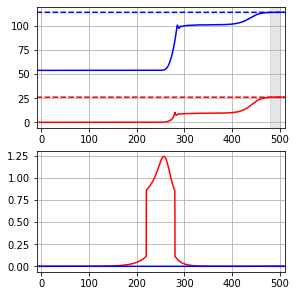

-------  70 0.4500000000000001 0.6750000000000004
set cost params:  0.05 0.0 39.083625760294275
interpolate adjoint :  True True True
initial cost =  263.11836653856733
RUN  0 , total integrated cost =  263.11836653856733
Gradient descend method:  None
RUN  1 , total integrated cost =  263.11836653856733
Control only changes marginally.
RUN  1 , total integrated cost =  263.11836653856733
Improved over  1  iterations in  0.3905439189984463  seconds by  0.0  percent.
cost splitting :  0.018438385318752484 [6.73216567e+00 2.58298508e-08]


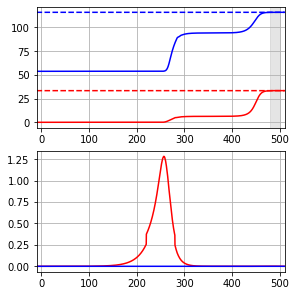

-------  71 0.47500000000000014 0.6750000000000004
set cost params:  0.05 0.0 44.20055880412968
interpolate adjoint :  True True True
initial cost =  252.39329450071168
RUN  0 , total integrated cost =  252.39329450071168
Gradient descend method:  None
RUN  1 , total integrated cost =  252.39329450071168
Control only changes marginally.
RUN  1 , total integrated cost =  252.39329450071168
Improved over  1  iterations in  0.36031596099201124  seconds by  0.0  percent.
cost splitting :  3.198697424203481e-05 [5.7101833 0.       ]


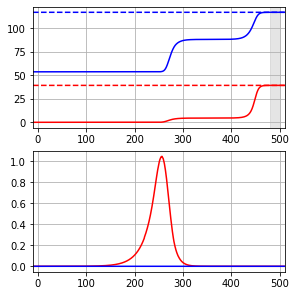

-------  72 0.5000000000000002 0.6750000000000004
set cost params:  0.05 0.0 115.92914137063164
interpolate adjoint :  True True True
initial cost =  543.8670303136953
RUN  0 , total integrated cost =  543.8670303136953
Gradient descend method:  None
RUN  1 , total integrated cost =  543.8670303136953
Control only changes marginally.
RUN  1 , total integrated cost =  543.8670303136953
Improved over  1  iterations in  0.34972315801132936  seconds by  0.0  percent.
cost splitting :  1.6407314563170537e-06 [4.69137461 0.        ]


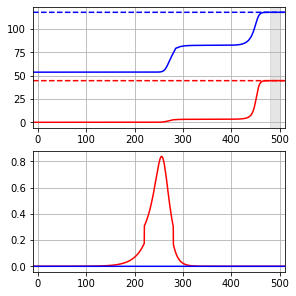

-------  73 0.5250000000000001 0.6750000000000004
set cost params:  0.05 0.0 194.33049287929302
interpolate adjoint :  True True True
initial cost =  704.0669958309445
RUN  0 , total integrated cost =  704.0669958309445
Gradient descend method:  None
RUN  1 , total integrated cost =  704.0669958309445
Control only changes marginally.
RUN  1 , total integrated cost =  704.0669958309445
Improved over  1  iterations in  0.36348344800353516  seconds by  0.0  percent.
cost splitting :  8.145938347598271e-06 [3.62303921 0.        ]


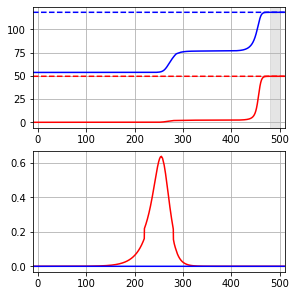

-------  74 0.5500000000000003 0.6750000000000004
set cost params:  0.05 0.0 497.044449979746
interpolate adjoint :  True True True
initial cost =  1256.4482545852277
RUN  0 , total integrated cost =  1256.4482545852277
Gradient descend method:  None
RUN  1 , total integrated cost =  1256.4482436645753
RUN  2 , total integrated cost =  1256.4482436645753
Control only changes marginally.
RUN  2 , total integrated cost =  1256.4482436645753
Improved over  2  iterations in  0.7139303580042906  seconds by  8.691684882933259e-07  percent.
cost splitting :  6.577735201700915e-05 [2.52783879 0.        ]


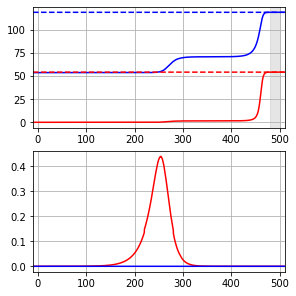

-------  75 0.5750000000000002 0.6750000000000004
set cost params:  0.05 0.0 1109.5659728946412
interpolate adjoint :  True True True
initial cost =  1497.4686803782042
RUN  0 , total integrated cost =  1497.4686803782042
Gradient descend method:  None
RUN  1 , total integrated cost =  1497.4686612359906
RUN  2 , total integrated cost =  1497.4686612359906
Control only changes marginally.
RUN  2 , total integrated cost =  1497.4686612359906
Improved over  2  iterations in  0.7261018650024198  seconds by  1.2783047793618607e-06  percent.
cost splitting :  0.00859978558302163 [1.34959819 0.        ]


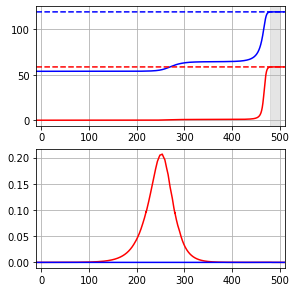

-------  76 0.4250000000000001 0.7000000000000004
set cost params:  0.05 0.0 40.42526637702063
interpolate adjoint :  True True True
initial cost =  319.2550927258299
RUN  0 , total integrated cost =  319.2550927258299
Gradient descend method:  None
RUN  1 , total integrated cost =  319.2550900211124
RUN  2 , total integrated cost =  319.25508675265377
RUN  3 , total integrated cost =  319.2550853326715
RUN  4 , total integrated cost =  319.2550839212583
RUN  5 , total integrated cost =  319.25508243628576
RUN  6 , total integrated cost =  319.255080972683
RUN  7 , total integrated cost =  319.25507955626745
RUN  8 , total integrated cost =  319.25507817009446
RUN  9 , total integrated cost =  319.2550766881943
RUN  10 , total integrated cost =  319.255075252135
RUN  11 , total integrated cost =  319.25507384050223
RUN  12 , total integrated cost =  319.25507234391364
RUN  13 , total integrated cost =  319.2550706911351
RUN  14 , total integrated cost =  319.25506892398124
RUN  15 , to

RUN  8 , total integrated cost =  165.53549716229736
RUN  9 , total integrated cost =  165.53549687556082
RUN  10 , total integrated cost =  165.53549657132936
RUN  11 , total integrated cost =  165.53549628417517
RUN  12 , total integrated cost =  165.5354959804112
RUN  13 , total integrated cost =  165.5354956928357
RUN  14 , total integrated cost =  165.53549538954212
RUN  15 , total integrated cost =  165.53549510154053
RUN  16 , total integrated cost =  165.53549479871538
RUN  17 , total integrated cost =  165.53549451591905
RUN  18 , total integrated cost =  165.53549419871493
RUN  19 , total integrated cost =  165.5354939093769
RUN  20 , total integrated cost =  165.5354936086735
RUN  30 , total integrated cost =  165.53549062963205
RUN  30 , total integrated cost =  165.53549062963205
Improved over  30  iterations in  5.729300863997196  seconds by  5.403137166126726e-06  percent.
cost splitting :  0.07696306899861514 [7.89731382e+00 2.52585941e-06]
set cost params:  0.05 0.0 22

RUN  18 , total integrated cost =  186.49794179587226
RUN  19 , total integrated cost =  186.4979414033528
RUN  20 , total integrated cost =  186.49794096592188
RUN  30 , total integrated cost =  186.49793653317815
RUN  30 , total integrated cost =  186.49793653317815
Improved over  30  iterations in  5.6328959689999465  seconds by  6.545416880499033e-06  percent.
cost splitting :  0.07696276352811204 [7.89731367e+00 8.99178448e-07]
set cost params:  0.05 0.0 10.408210515801924
interpolate adjoint :  True True True
initial cost =  82.20076066207201
RUN  0 , total integrated cost =  82.20076066207201
Gradient descend method:  None
RUN  1 , total integrated cost =  82.2007605875535
RUN  2 , total integrated cost =  82.20076050988587
RUN  3 , total integrated cost =  82.20076043128289
RUN  4 , total integrated cost =  82.20076034818038
RUN  5 , total integrated cost =  82.20076026923526
RUN  6 , total integrated cost =  82.20076018659576
RUN  7 , total integrated cost =  82.20076010738296

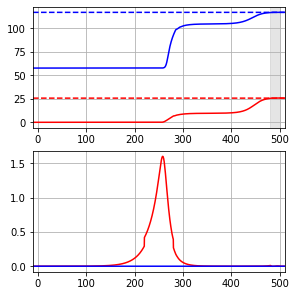

-------  77 0.4500000000000001 0.7000000000000004
set cost params:  0.05 0.0 38.98742551405529
interpolate adjoint :  True True True
initial cost =  270.4835520853273
RUN  0 , total integrated cost =  270.4835520853273
Gradient descend method:  None
RUN  1 , total integrated cost =  270.4835518994132
RUN  2 , total integrated cost =  270.4835517428703
RUN  3 , total integrated cost =  270.4835516114505
RUN  4 , total integrated cost =  270.4835515809535
RUN  5 , total integrated cost =  270.4835515552245
RUN  6 , total integrated cost =  270.4835515183072
RUN  7 , total integrated cost =  270.4835514862698
RUN  8 , total integrated cost =  270.4835514636047
RUN  9 , total integrated cost =  270.48355144279213
RUN  10 , total integrated cost =  270.48355138405327
RUN  11 , total integrated cost =  270.4835513352587
RUN  12 , total integrated cost =  270.4835512586023
RUN  13 , total integrated cost =  270.4835511892523
RUN  14 , total integrated cost =  270.4835511682662
RUN  15 , total

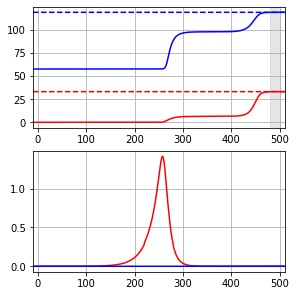

-------  78 0.47500000000000014 0.7000000000000004
set cost params:  0.05 0.0 50.29935444165683
interpolate adjoint :  True True True
initial cost =  295.73009851016053
RUN  0 , total integrated cost =  295.73009851016053
Gradient descend method:  None
RUN  1 , total integrated cost =  295.73009851016053
Control only changes marginally.
RUN  1 , total integrated cost =  295.73009851016053
Improved over  1  iterations in  0.36699854899779893  seconds by  0.0  percent.
cost splitting :  2.7909382016552143e-05 [5.87940144e+00 3.03216767e-09]


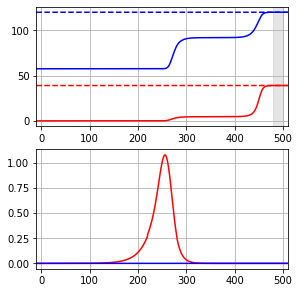

-------  79 0.5000000000000002 0.7000000000000004
set cost params:  0.05 0.0 166.85393300377626
interpolate adjoint :  True True True
initial cost =  807.94031955886
RUN  0 , total integrated cost =  807.94031955886
Gradient descend method:  None
RUN  1 , total integrated cost =  807.94031955886
Control only changes marginally.
RUN  1 , total integrated cost =  807.94031955886
Improved over  1  iterations in  0.3953171010070946  seconds by  0.0  percent.
cost splitting :  1.7093708045936385e-06 [4.84220123 0.        ]


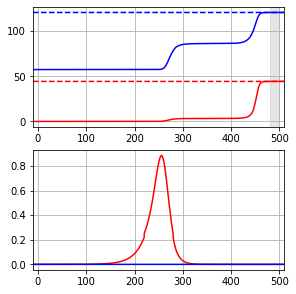

-------  80 0.5250000000000001 0.7000000000000004
set cost params:  0.05 0.0 284.9305745297422
interpolate adjoint :  True True True
initial cost =  1082.2204697220802
RUN  0 , total integrated cost =  1082.2204697220802
Gradient descend method:  None
RUN  1 , total integrated cost =  1082.22046900588
RUN  2 , total integrated cost =  1082.22046900588
Control only changes marginally.
RUN  2 , total integrated cost =  1082.22046900588
Improved over  2  iterations in  0.7564063220052049  seconds by  6.617877090775437e-08  percent.
cost splitting :  9.556155543670476e-06 [3.79819003e+00 3.73888921e-10]


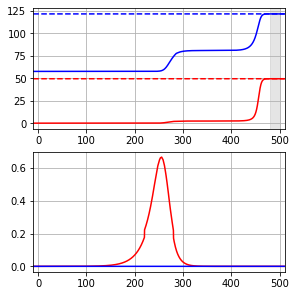

-------  81 0.5500000000000003 0.7000000000000004
set cost params:  0.05 0.0 65.71462697807944
interpolate adjoint :  True True True
initial cost =  178.35296539403254
RUN  0 , total integrated cost =  178.35296539403254
Gradient descend method:  None
RUN  1 , total integrated cost =  178.3529652024394
RUN  2 , total integrated cost =  178.3529652024394
Control only changes marginally.
RUN  2 , total integrated cost =  178.3529652024394
Improved over  2  iterations in  0.7224346790026175  seconds by  1.0742357403614733e-07  percent.
cost splitting :  1.9937446957672397e-05 [2.71405275 0.        ]


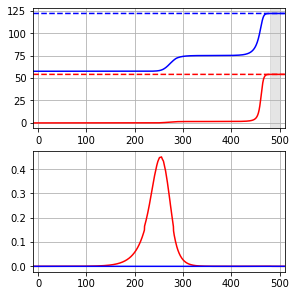

-------  82 0.5750000000000002 0.7000000000000004
set cost params:  0.05 0.0 782.6683726426505
interpolate adjoint :  True True True
initial cost =  1214.9085182997514
RUN  0 , total integrated cost =  1214.9085182997514
Gradient descend method:  None
RUN  1 , total integrated cost =  1214.9085106411414
RUN  2 , total integrated cost =  1214.9085106411414
Control only changes marginally.
RUN  2 , total integrated cost =  1214.9085106411414
Improved over  2  iterations in  0.746243282002979  seconds by  6.30385727617977e-07  percent.
cost splitting :  0.0016942464691375651 [1.55226462e+00 2.28817646e-10]


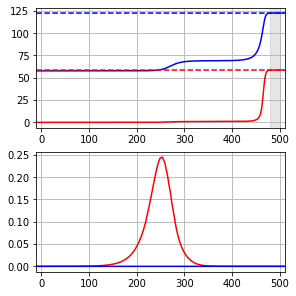

In [39]:
c_var = [0,1]
#conv = [None] * len(exc)
max_it = int(30)

tol = 1e-10

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    if i in bad:
        continue
        
    while not conv[i]:

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][2][0][:] )
            
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][3] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][2][0][:2])

        if conv[i]:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)
        

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
-------  19 0.4250000000000001 0.4750000000000002

RUN  6 , total integrated cost =  202.35125895082342
RUN  7 , total integrated cost =  202.35125894989463
RUN  8 , total integrated cost =  202.35125892427428
RUN  9 , total integrated cost =  202.35125890091226
RUN  10 , total integrated cost =  202.3512589003169
RUN  11 , total integrated cost =  202.35125889976874
RUN  12 , total integrated cost =  202.3512588986879
RUN  13 , total integrated cost =  202.35125889761403
RUN  14 , total integrated cost =  202.35125887604127
RUN  15 , total integrated cost =  202.351258856777
RUN  16 , total integrated cost =  202.35125885604558
RUN  17 , total integrated cost =  202.3512588553826
RUN  18 , total integrated cost =  202.35125881664354
RUN  19 , total integrated cost =  202.3512587819692
RUN  20 , total integrated cost =  202.35125878155952
RUN  30 , total integrated cost =  202.35125873069407
RUN  40 , total integrated cost =  202.3512586357538
RUN  50 , total integrated cost =  202.35125853561766
RUN  60 , total integrated cost =  202.

RUN  15 , total integrated cost =  195.6509628118553
RUN  16 , total integrated cost =  195.65096281160424
RUN  17 , total integrated cost =  195.6509628114187
RUN  18 , total integrated cost =  195.65096281116328
RUN  19 , total integrated cost =  195.65096281096203
RUN  20 , total integrated cost =  195.65096281063595
RUN  30 , total integrated cost =  195.6509623951834
RUN  40 , total integrated cost =  195.65096239084352
RUN  50 , total integrated cost =  195.650961945638
RUN  60 , total integrated cost =  195.6509614355312
RUN  70 , total integrated cost =  195.65096143121107
RUN  80 , total integrated cost =  195.65096101763763
RUN  90 , total integrated cost =  195.65096057062505
RUN  100 , total integrated cost =  195.6509605664348
RUN  100 , total integrated cost =  195.6509605664348
Improved over  100  iterations in  44.84188293397892  seconds by  1.4249346094175053e-06  percent.
cost splitting :  0.02117819568883062 [7.87384289e+00 4.81515288e-13]
total cost =  7.89502108891

RUN  50 , total integrated cost =  73.61289703092476
RUN  60 , total integrated cost =  73.61289702660824
RUN  70 , total integrated cost =  73.61289702228231
RUN  80 , total integrated cost =  73.61289701796335
RUN  90 , total integrated cost =  73.61289701364623
RUN  100 , total integrated cost =  73.61289700932033
RUN  100 , total integrated cost =  73.61289700932033
Improved over  100  iterations in  42.44724825699814  seconds by  2.0654977106460137e-07  percent.
cost splitting :  0.021061124559829395 [7.87384281e+00 4.81515288e-13]
total cost =  7.894903933170574
set cost params:  0.05 0.0 24.837937268944533
interpolate adjoint :  True True True
initial cost =  195.5710668020317
RUN  0 , total integrated cost =  195.5710668020317
Gradient descend method:  None
RUN  1 , total integrated cost =  195.57106674242507
RUN  2 , total integrated cost =  195.57106674193892
RUN  3 , total integrated cost =  195.57106674150157
RUN  4 , total integrated cost =  195.5710667409499
RUN  5 , tota

set cost params:  0.05 0.0 31.075567131534616
interpolate adjoint :  True True True
initial cost =  244.68512749850194
RUN  0 , total integrated cost =  244.68512749850194
Gradient descend method:  None
RUN  1 , total integrated cost =  244.68512741953086
RUN  2 , total integrated cost =  244.68512741923072
RUN  3 , total integrated cost =  244.68512741900577
RUN  4 , total integrated cost =  244.6851274185996
RUN  5 , total integrated cost =  244.6851274182825
RUN  6 , total integrated cost =  244.68512741706456
RUN  7 , total integrated cost =  244.68512741590197
RUN  8 , total integrated cost =  244.68512737948282
RUN  9 , total integrated cost =  244.6851273438718
RUN  10 , total integrated cost =  244.6851273433962
RUN  11 , total integrated cost =  244.6851273430165
RUN  12 , total integrated cost =  244.68512734204583
RUN  13 , total integrated cost =  244.68512734119543
RUN  14 , total integrated cost =  244.68512733966156
RUN  15 , total integrated cost =  244.68512733825403
R

RUN  6 , total integrated cost =  292.6053429462409
RUN  7 , total integrated cost =  292.6053429328303
RUN  8 , total integrated cost =  292.60534292101323
RUN  9 , total integrated cost =  292.60534275005307
RUN  10 , total integrated cost =  292.60534258987036
RUN  11 , total integrated cost =  292.605342556153
RUN  12 , total integrated cost =  292.60534251905517
RUN  13 , total integrated cost =  292.60534251026036
RUN  14 , total integrated cost =  292.6053424994291
RUN  15 , total integrated cost =  292.6053424944597
RUN  16 , total integrated cost =  292.6053424879478
RUN  17 , total integrated cost =  292.6053424844372
RUN  18 , total integrated cost =  292.60534247909266
RUN  19 , total integrated cost =  292.6053424757268
RUN  20 , total integrated cost =  292.6053424687619
RUN  30 , total integrated cost =  292.6053421837794
RUN  40 , total integrated cost =  292.60534208652314
RUN  50 , total integrated cost =  292.60534184901195
RUN  60 , total integrated cost =  292.6053

RUN  14 , total integrated cost =  30.37913684029061
RUN  15 , total integrated cost =  30.379136835295153
RUN  16 , total integrated cost =  30.37913683054841
RUN  17 , total integrated cost =  30.379136825765563
RUN  18 , total integrated cost =  30.379136821321232
RUN  19 , total integrated cost =  30.37913681718582
RUN  20 , total integrated cost =  30.379136813063184
RUN  30 , total integrated cost =  30.379136771768227
RUN  40 , total integrated cost =  30.379136730005754
RUN  50 , total integrated cost =  30.37913668823949
RUN  60 , total integrated cost =  30.37913664695343
RUN  70 , total integrated cost =  30.37913660519962
RUN  80 , total integrated cost =  30.379136563441364
RUN  90 , total integrated cost =  30.379136521699145
RUN  100 , total integrated cost =  30.379136480418843
RUN  100 , total integrated cost =  30.379136480418843
Improved over  100  iterations in  42.12530015199445  seconds by  1.6621192528987194e-05  percent.
cost splitting :  0.016673933859861434 [7

RUN  40 , total integrated cost =  259.24924855285616
RUN  50 , total integrated cost =  259.24924675820847
RUN  60 , total integrated cost =  259.24924532130325
RUN  70 , total integrated cost =  259.24924337861455
RUN  80 , total integrated cost =  259.2492415555897
RUN  90 , total integrated cost =  259.2492394030174
RUN  100 , total integrated cost =  259.249237429014
RUN  100 , total integrated cost =  259.249237429014
Improved over  100  iterations in  50.79451930895448  seconds by  9.835948304726116e-06  percent.
cost splitting :  4.9743128237411095e-05 [7.87369389e+00 4.81515288e-13]
total cost =  7.873743633208706
set cost params:  0.05 0.0 2.173225941083031
interpolate adjoint :  True True True
initial cost =  17.11131830122625
RUN  0 , total integrated cost =  17.11131830122625
Gradient descend method:  None
RUN  1 , total integrated cost =  17.11131758084674
RUN  2 , total integrated cost =  17.111317580589237
RUN  3 , total integrated cost =  17.111317580587997
RUN  4 , to

set cost params:  0.05 0.0 38.95658964272169
interpolate adjoint :  True True True
initial cost =  306.7322634258204
RUN  0 , total integrated cost =  306.7322634258204
Gradient descend method:  None
RUN  1 , total integrated cost =  306.7322626170076
RUN  2 , total integrated cost =  306.73226261582255
RUN  3 , total integrated cost =  306.73226258947466
RUN  4 , total integrated cost =  306.7322625648694
RUN  5 , total integrated cost =  306.7322625640353
RUN  6 , total integrated cost =  306.73226256331566
RUN  7 , total integrated cost =  306.7322625616962
RUN  8 , total integrated cost =  306.73226256019075
RUN  9 , total integrated cost =  306.7322625406479
RUN  10 , total integrated cost =  306.7322625209529
RUN  11 , total integrated cost =  306.7322625198966
RUN  12 , total integrated cost =  306.73226251892004
RUN  13 , total integrated cost =  306.7322624852111
RUN  14 , total integrated cost =  306.73226244844733
RUN  15 , total integrated cost =  306.73226244786565
RUN  16

RUN  5 , total integrated cost =  134.04205055221695
RUN  6 , total integrated cost =  134.0420505520697
RUN  7 , total integrated cost =  134.04205055170237
RUN  8 , total integrated cost =  134.04205055137652
RUN  9 , total integrated cost =  134.04205054791706
RUN  10 , total integrated cost =  134.04205054462196
RUN  11 , total integrated cost =  134.04205054432737
RUN  12 , total integrated cost =  134.042050544068
RUN  13 , total integrated cost =  134.04205053957688
RUN  14 , total integrated cost =  134.0420505350752
RUN  15 , total integrated cost =  134.04205053485467
RUN  16 , total integrated cost =  134.04205053466
RUN  17 , total integrated cost =  134.04205052836974
RUN  18 , total integrated cost =  134.04205052268196
RUN  19 , total integrated cost =  134.04205052250373
RUN  20 , total integrated cost =  134.04205052233553
RUN  30 , total integrated cost =  134.0420505021722
RUN  40 , total integrated cost =  134.0420504834091
RUN  50 , total integrated cost =  134.042

RUN  13 , total integrated cost =  120.30514376933307
RUN  14 , total integrated cost =  120.30514376906959
RUN  15 , total integrated cost =  120.30514376906139
RUN  16 , total integrated cost =  120.30514376894054
RUN  17 , total integrated cost =  120.30514376887113
RUN  18 , total integrated cost =  120.30514376886202
RUN  19 , total integrated cost =  120.30514376879124
RUN  20 , total integrated cost =  120.30514376875617
RUN  30 , total integrated cost =  120.3051437398206
RUN  40 , total integrated cost =  120.30514373883882
RUN  50 , total integrated cost =  120.30514373829753
RUN  60 , total integrated cost =  120.30514373721002
RUN  70 , total integrated cost =  120.30514373590259
RUN  80 , total integrated cost =  120.30514373514762
RUN  90 , total integrated cost =  120.30514371041042
RUN  100 , total integrated cost =  120.30514370949265
RUN  100 , total integrated cost =  120.30514370949265
Improved over  100  iterations in  45.16521710797679  seconds by  3.4477724852877

RUN  30 , total integrated cost =  223.65117279144374
RUN  40 , total integrated cost =  223.65117279079956
RUN  50 , total integrated cost =  223.651172788853
RUN  60 , total integrated cost =  223.65117278472857
RUN  70 , total integrated cost =  223.65117278386694
RUN  80 , total integrated cost =  223.6511727823495
RUN  90 , total integrated cost =  223.65117272647973
RUN  100 , total integrated cost =  223.65117272109
RUN  100 , total integrated cost =  223.65117272109
Improved over  100  iterations in  47.5706237499835  seconds by  3.0885637158917234e-07  percent.
cost splitting :  0.00029601526836414883 [7.87328292e+00 4.81515288e-13]
total cost =  7.873578930654457
set cost params:  0.05 0.0 7.888768574596422
interpolate adjoint :  True True True
initial cost =  62.11052164256813
RUN  0 , total integrated cost =  62.11052164256813
Gradient descend method:  None
RUN  1 , total integrated cost =  62.11051965279903
RUN  2 , total integrated cost =  62.11051965186205
RUN  3 , total

set cost params:  0.05 0.0 21.937281231128757
interpolate adjoint :  True True True
initial cost =  172.7184365886516
RUN  0 , total integrated cost =  172.7184365886516
Gradient descend method:  None
RUN  1 , total integrated cost =  172.7184358904938
RUN  2 , total integrated cost =  172.71843589042143
RUN  3 , total integrated cost =  172.71843589040233
RUN  4 , total integrated cost =  172.71843589038846
RUN  5 , total integrated cost =  172.71843589031488
RUN  6 , total integrated cost =  172.71843589029262
RUN  7 , total integrated cost =  172.7184358902673
RUN  8 , total integrated cost =  172.71843589019485
RUN  9 , total integrated cost =  172.71843589017905
RUN  10 , total integrated cost =  172.71843589014185
RUN  11 , total integrated cost =  172.71843589005078
RUN  12 , total integrated cost =  172.71843589003964
RUN  13 , total integrated cost =  172.71843588997854
RUN  14 , total integrated cost =  172.71843588985536
RUN  15 , total integrated cost =  172.71843588984353


RUN  5 , total integrated cost =  199.18543709737423
RUN  6 , total integrated cost =  199.18543709736352
RUN  7 , total integrated cost =  199.18543709722383
RUN  8 , total integrated cost =  199.18543709698972
RUN  9 , total integrated cost =  199.18543709697914
RUN  10 , total integrated cost =  199.18543709686583
RUN  11 , total integrated cost =  199.1854370966675
RUN  12 , total integrated cost =  199.18543709665485
RUN  13 , total integrated cost =  199.18543709653716
RUN  14 , total integrated cost =  199.18543709634307
RUN  15 , total integrated cost =  199.1854370963306
RUN  16 , total integrated cost =  199.1854370962079
RUN  17 , total integrated cost =  199.1854370959879
RUN  18 , total integrated cost =  199.18543709597753
RUN  19 , total integrated cost =  199.1854370958283
RUN  20 , total integrated cost =  199.18543709557287
RUN  30 , total integrated cost =  199.18543709499227
RUN  40 , total integrated cost =  199.18543709457745
RUN  50 , total integrated cost =  199

RUN  13 , total integrated cost =  100.83502229333585
RUN  14 , total integrated cost =  100.83502228846103
RUN  15 , total integrated cost =  100.8350222884513
RUN  16 , total integrated cost =  100.8350222883708
RUN  17 , total integrated cost =  100.8350222882598
RUN  18 , total integrated cost =  100.83502228825114
RUN  19 , total integrated cost =  100.83502228752825
RUN  20 , total integrated cost =  100.83502228670564
RUN  30 , total integrated cost =  100.83502228181756
RUN  40 , total integrated cost =  100.83502227059083
RUN  50 , total integrated cost =  100.83502226814718
RUN  60 , total integrated cost =  100.83502226611492
RUN  70 , total integrated cost =  100.8350222511198
RUN  80 , total integrated cost =  100.83502224053778
RUN  90 , total integrated cost =  100.8350222286276
RUN  100 , total integrated cost =  100.83502221577875
RUN  100 , total integrated cost =  100.83502221577875
Improved over  100  iterations in  48.434846813906915  seconds by  2.0546303858282045

RUN  30 , total integrated cost =  181.31907629351838
RUN  40 , total integrated cost =  181.31907626231612
RUN  50 , total integrated cost =  181.3190762615883
RUN  60 , total integrated cost =  181.31907623041772
RUN  70 , total integrated cost =  181.3190762299307
RUN  80 , total integrated cost =  181.31907622898666
RUN  90 , total integrated cost =  181.31907622075215
RUN  100 , total integrated cost =  181.31907621996515
RUN  100 , total integrated cost =  181.31907621996515
Improved over  100  iterations in  49.14141027000733  seconds by  1.480351556892856e-07  percent.
cost splitting :  0.0002414174075689512 [7.87328284e+00 4.81515288e-13]
total cost =  7.873524257463567
set cost params:  0.05 0.0 14.007191864814938
interpolate adjoint :  True True True
initial cost =  110.28259541748982
RUN  0 , total integrated cost =  110.28259541748982
Gradient descend method:  None
RUN  1 , total integrated cost =  110.28259502807192
RUN  2 , total integrated cost =  110.28259502733259
RUN

RUN  1 , total integrated cost =  211.2587796640359
RUN  2 , total integrated cost =  211.2587796620948
RUN  3 , total integrated cost =  211.25877966206153
RUN  4 , total integrated cost =  211.25877966196103
RUN  5 , total integrated cost =  211.25877966194588
RUN  6 , total integrated cost =  211.25877966193056
RUN  7 , total integrated cost =  211.25877966182918
RUN  8 , total integrated cost =  211.25877966179684
RUN  9 , total integrated cost =  211.25877966178288
RUN  10 , total integrated cost =  211.25877966167212
RUN  11 , total integrated cost =  211.25877966162636
RUN  12 , total integrated cost =  211.25877966161514
RUN  13 , total integrated cost =  211.25877966144446
RUN  14 , total integrated cost =  211.25877966134635
RUN  15 , total integrated cost =  211.2587796613361
RUN  16 , total integrated cost =  211.2587796611272
RUN  17 , total integrated cost =  211.25877966100174
RUN  18 , total integrated cost =  211.2587796609894
RUN  19 , total integrated cost =  211.258

RUN  10 , total integrated cost =  8.100926367965604
RUN  11 , total integrated cost =  8.100926367938209
RUN  12 , total integrated cost =  8.100926367911342
RUN  13 , total integrated cost =  8.100926367884414
RUN  14 , total integrated cost =  8.100926367857094
RUN  15 , total integrated cost =  8.100926367830619
RUN  16 , total integrated cost =  8.10092636780286
RUN  17 , total integrated cost =  8.10092636777681
RUN  18 , total integrated cost =  8.10092636774863
RUN  19 , total integrated cost =  8.100926367723027
RUN  20 , total integrated cost =  8.100926367694424
RUN  30 , total integrated cost =  8.100926367192317
RUN  40 , total integrated cost =  8.100926366635429
RUN  50 , total integrated cost =  8.10092636613225
RUN  60 , total integrated cost =  8.100926365642442
RUN  70 , total integrated cost =  8.100926365152457
RUN  80 , total integrated cost =  8.100926364662499
RUN  90 , total integrated cost =  8.100926364172732
RUN  100 , total integrated cost =  8.100926363682

RUN  18 , total integrated cost =  120.41353039697793
RUN  19 , total integrated cost =  120.41353039695524
RUN  20 , total integrated cost =  120.41353039690111
RUN  30 , total integrated cost =  120.41353039665327
RUN  40 , total integrated cost =  120.41353039645362
RUN  50 , total integrated cost =  120.41353039621987
RUN  60 , total integrated cost =  120.4135303960159
RUN  70 , total integrated cost =  120.41353039581597
RUN  80 , total integrated cost =  120.41353039528103
RUN  90 , total integrated cost =  120.41353039504936
RUN  100 , total integrated cost =  120.41353039483339
RUN  100 , total integrated cost =  120.41353039483339
Improved over  100  iterations in  46.021171765984036  seconds by  6.236952145854957e-07  percent.
cost splitting :  0.00017147399949114203 [7.87328251e+00 4.81515288e-13]
total cost =  7.873453981911531
set cost params:  0.05 0.0 17.253957299809997
interpolate adjoint :  True True True
initial cost =  135.84528877455526
RUN  0 , total integrated co

RUN  80 , total integrated cost =  321.4930550531351
RUN  90 , total integrated cost =  321.49305504816243
RUN  100 , total integrated cost =  321.4930550414347
RUN  100 , total integrated cost =  321.4930550414347
Improved over  100  iterations in  46.03849298891146  seconds by  2.1934468463769008e-08  percent.
cost splitting :  0.00027915467496011063 [7.87328227e+00 4.81515288e-13]
total cost =  7.873561424014273
set cost params:  0.05 0.0 39.142664857329116
interpolate adjoint :  True True True
initial cost =  308.1812631536342
RUN  0 , total integrated cost =  308.1812631536342
Gradient descend method:  None
RUN  1 , total integrated cost =  308.18126314543633
RUN  2 , total integrated cost =  308.18126314542496
RUN  3 , total integrated cost =  308.1812631451742
RUN  4 , total integrated cost =  308.18126314478883
RUN  5 , total integrated cost =  308.18126314477576
RUN  6 , total integrated cost =  308.1812631447428
RUN  7 , total integrated cost =  308.1812631446092
RUN  8 , tot

set cost params:  0.05 0.0 3.8402360437922383
interpolate adjoint :  True True True
initial cost =  30.235275188239836
RUN  0 , total integrated cost =  30.235275188239836
Gradient descend method:  None
RUN  1 , total integrated cost =  30.235270784554796
RUN  2 , total integrated cost =  30.235270778207074
RUN  3 , total integrated cost =  30.235270778193854
RUN  4 , total integrated cost =  30.235270778137917
RUN  5 , total integrated cost =  30.23527077809083
RUN  6 , total integrated cost =  30.2352707778919
RUN  7 , total integrated cost =  30.235270777668557
RUN  8 , total integrated cost =  30.23527077765076
RUN  9 , total integrated cost =  30.235270777627722
RUN  10 , total integrated cost =  30.235270777619583
RUN  11 , total integrated cost =  30.235270777602608
RUN  12 , total integrated cost =  30.235270777592216
RUN  13 , total integrated cost =  30.235270777555368
RUN  14 , total integrated cost =  30.235270777526082
RUN  15 , total integrated cost =  30.235270777198103


RUN  5 , total integrated cost =  210.97910496324954
RUN  6 , total integrated cost =  210.97910496324312
RUN  7 , total integrated cost =  210.97910495893223
RUN  8 , total integrated cost =  210.97910495465254
RUN  9 , total integrated cost =  210.97910495464413
RUN  10 , total integrated cost =  210.97910495461792
RUN  11 , total integrated cost =  210.97910495453843
RUN  12 , total integrated cost =  210.97910495452334
RUN  13 , total integrated cost =  210.97910495451245
RUN  14 , total integrated cost =  210.9791049544264
RUN  15 , total integrated cost =  210.9791049543953
RUN  16 , total integrated cost =  210.97910495438626
RUN  17 , total integrated cost =  210.9791049542628
RUN  18 , total integrated cost =  210.97910495420757
RUN  19 , total integrated cost =  210.97910495420052
RUN  20 , total integrated cost =  210.9791049537099
RUN  30 , total integrated cost =  210.9791049454656
RUN  40 , total integrated cost =  210.9791049444652
RUN  50 , total integrated cost =  210.

RUN  13 , total integrated cost =  326.766135105608
RUN  14 , total integrated cost =  326.7661351053333
RUN  15 , total integrated cost =  326.76613510531763
RUN  16 , total integrated cost =  326.7661351052965
RUN  17 , total integrated cost =  326.76613510513687
RUN  18 , total integrated cost =  326.76613510508236
RUN  19 , total integrated cost =  326.7661351050709
RUN  20 , total integrated cost =  326.766135102845
RUN  30 , total integrated cost =  326.7661350997507
RUN  40 , total integrated cost =  326.766135096981
RUN  50 , total integrated cost =  326.76613509283357
RUN  60 , total integrated cost =  326.76613508815575
RUN  70 , total integrated cost =  326.76613506052973
RUN  80 , total integrated cost =  326.7661349987665
RUN  90 , total integrated cost =  326.7661349975272
RUN  100 , total integrated cost =  326.7661349929796
RUN  100 , total integrated cost =  326.7661349929796
Improved over  100  iterations in  50.73464762407821  seconds by  1.1197967921816598e-06  perc

RUN  30 , total integrated cost =  273.8823044635694
RUN  40 , total integrated cost =  273.88230441385207
RUN  50 , total integrated cost =  273.8823043930666
RUN  60 , total integrated cost =  273.8823043890594
RUN  70 , total integrated cost =  273.88230438602136
RUN  80 , total integrated cost =  273.8823043816613
RUN  90 , total integrated cost =  273.88230436270135
RUN  100 , total integrated cost =  273.8823043440128
RUN  100 , total integrated cost =  273.8823043440128
Improved over  100  iterations in  51.07543069100939  seconds by  6.874048636973384e-07  percent.
cost splitting :  0.00024000163493631923 [7.87328225e+00 4.81515288e-13]
total cost =  7.873522247959659
set cost params:  0.05 0.0 32.56388482409183
interpolate adjoint :  True True True
initial cost =  256.3846682569671
RUN  0 , total integrated cost =  256.3846682569671
Gradient descend method:  None
RUN  1 , total integrated cost =  256.3846682393825
RUN  2 , total integrated cost =  256.3846682392767
RUN  3 , to

set cost params:  0.05 0.0 35.309356116277584
interpolate adjoint :  True True True
initial cost =  278.00050889998954
RUN  0 , total integrated cost =  278.00050889998954
Gradient descend method:  None
RUN  1 , total integrated cost =  278.0005072438558
RUN  2 , total integrated cost =  278.00050723965
RUN  3 , total integrated cost =  278.0005072396396
RUN  4 , total integrated cost =  278.00050723953143
RUN  5 , total integrated cost =  278.000507239499
RUN  6 , total integrated cost =  278.00050723949414
RUN  7 , total integrated cost =  278.0005072379901
RUN  8 , total integrated cost =  278.00050723621445
RUN  9 , total integrated cost =  278.0005072362081
RUN  10 , total integrated cost =  278.0005072361928
RUN  11 , total integrated cost =  278.00050723609814
RUN  12 , total integrated cost =  278.00050723607774
RUN  13 , total integrated cost =  278.00050723607205
RUN  14 , total integrated cost =  278.0005072265364
RUN  15 , total integrated cost =  278.0005072152512
RUN  16 

RUN  5 , total integrated cost =  229.78846646636518
RUN  6 , total integrated cost =  229.78846646636114
RUN  7 , total integrated cost =  229.78846646633664
RUN  8 , total integrated cost =  229.78846646625954
RUN  9 , total integrated cost =  229.78846646624984
RUN  10 , total integrated cost =  229.78846646624606
RUN  11 , total integrated cost =  229.7884664617925
RUN  12 , total integrated cost =  229.7884664571118
RUN  13 , total integrated cost =  229.7884664570887
RUN  14 , total integrated cost =  229.78846645708492
RUN  15 , total integrated cost =  229.78846645705323
RUN  16 , total integrated cost =  229.7884664569705
RUN  17 , total integrated cost =  229.78846645696092
RUN  18 , total integrated cost =  229.78846645695643
RUN  19 , total integrated cost =  229.78846645585148
RUN  20 , total integrated cost =  229.7884664548803
RUN  30 , total integrated cost =  229.7884664443382
RUN  40 , total integrated cost =  229.78846644214178
RUN  50 , total integrated cost =  229.

RUN  13 , total integrated cost =  137.91452594610695
RUN  14 , total integrated cost =  137.91452594609126
RUN  15 , total integrated cost =  137.91452594605303
RUN  16 , total integrated cost =  137.91452594604942
RUN  17 , total integrated cost =  137.91452594604573
RUN  18 , total integrated cost =  137.91452594600466
RUN  19 , total integrated cost =  137.91452594598934
RUN  20 , total integrated cost =  137.91452594598692
RUN  30 , total integrated cost =  137.914525945491
RUN  40 , total integrated cost =  137.91452594391683
RUN  50 , total integrated cost =  137.91452594317275
RUN  60 , total integrated cost =  137.9145259369035
RUN  70 , total integrated cost =  137.9145259304655
RUN  80 , total integrated cost =  137.91452593005292
RUN  90 , total integrated cost =  137.91452592738005
RUN  100 , total integrated cost =  137.914525919499
RUN  100 , total integrated cost =  137.914525919499
Improved over  100  iterations in  46.01413141202647  seconds by  8.485183258244433e-07 

RUN  30 , total integrated cost =  62.37071606098419
RUN  40 , total integrated cost =  62.37071605987101
RUN  50 , total integrated cost =  62.370716058757296
RUN  60 , total integrated cost =  62.3707160585063
RUN  70 , total integrated cost =  62.37071605828098
RUN  80 , total integrated cost =  62.37071605808672
RUN  90 , total integrated cost =  62.37071605697523
RUN  100 , total integrated cost =  62.37071605591101
RUN  100 , total integrated cost =  62.37071605591101
Improved over  100  iterations in  44.09903762897011  seconds by  2.8093964488107304e-08  percent.
cost splitting :  0.00010008450728345495 [7.87328161e+00 4.81515288e-13]
total cost =  7.873381694684855
set cost params:  0.05 0.0 1.0646578671027294
interpolate adjoint :  True True True
initial cost =  8.38235621041616
RUN  0 , total integrated cost =  8.38235621041616
Gradient descend method:  None
RUN  1 , total integrated cost =  8.382355993259388
RUN  2 , total integrated cost =  8.382355993243609
RUN  3 , total

set cost params:  0.05 0.0 30.220479258868508
interpolate adjoint :  True True True
initial cost =  237.93434630780288
RUN  0 , total integrated cost =  237.93434630780288
Gradient descend method:  None
RUN  1 , total integrated cost =  237.93434619929926
RUN  2 , total integrated cost =  237.9343461991634
RUN  3 , total integrated cost =  237.93434619915712
RUN  4 , total integrated cost =  237.93434619914993
RUN  5 , total integrated cost =  237.93434619897442
RUN  6 , total integrated cost =  237.93434619888293
RUN  7 , total integrated cost =  237.93434619887915
RUN  8 , total integrated cost =  237.93434619884616
RUN  9 , total integrated cost =  237.93434619875796
RUN  10 , total integrated cost =  237.93434619875018
RUN  11 , total integrated cost =  237.93434619874594
RUN  12 , total integrated cost =  237.93434614272977
RUN  13 , total integrated cost =  237.93434608292333
RUN  14 , total integrated cost =  237.93434608288416
RUN  15 , total integrated cost =  237.934346082880

RUN  5 , total integrated cost =  21.777262564908415
RUN  6 , total integrated cost =  21.77726256489283
RUN  7 , total integrated cost =  21.777262564880722
RUN  8 , total integrated cost =  21.777262564123674
RUN  9 , total integrated cost =  21.777262563364893
RUN  10 , total integrated cost =  21.77726256335039
RUN  11 , total integrated cost =  21.77726256333972
RUN  12 , total integrated cost =  21.777262563286037
RUN  13 , total integrated cost =  21.777262563241543
RUN  14 , total integrated cost =  21.777262563051803
RUN  15 , total integrated cost =  21.777262562860113
RUN  16 , total integrated cost =  21.777262562854975
RUN  17 , total integrated cost =  21.77726256284616
RUN  18 , total integrated cost =  21.77726256284047
RUN  19 , total integrated cost =  21.77726256282347
RUN  20 , total integrated cost =  21.777262562810233
RUN  30 , total integrated cost =  21.777262562201944
RUN  40 , total integrated cost =  21.77726256171364
RUN  50 , total integrated cost =  21.77

RUN  13 , total integrated cost =  80.07621892116003
RUN  14 , total integrated cost =  80.07621892110622
RUN  15 , total integrated cost =  80.07621892106751
RUN  16 , total integrated cost =  80.0762189210642
RUN  17 , total integrated cost =  80.07621892104719
RUN  18 , total integrated cost =  80.07621892104147
RUN  19 , total integrated cost =  80.07621892103676
RUN  20 , total integrated cost =  80.07621892102061
RUN  30 , total integrated cost =  80.07621890214016
RUN  40 , total integrated cost =  80.07621890196967
RUN  50 , total integrated cost =  80.07621890166942
RUN  60 , total integrated cost =  80.07621890153362
RUN  70 , total integrated cost =  80.07621888261893
RUN  80 , total integrated cost =  80.07621888242494
RUN  90 , total integrated cost =  80.0762188822022
RUN  100 , total integrated cost =  80.07621885612157
RUN  100 , total integrated cost =  80.07621885612157
Improved over  100  iterations in  49.83483302698005  seconds by  2.877648014987244e-06  percent.
c

RUN  30 , total integrated cost =  57.37202562445564
RUN  40 , total integrated cost =  57.372025624375965
RUN  50 , total integrated cost =  57.37202561852795
RUN  60 , total integrated cost =  57.37202561833449
RUN  70 , total integrated cost =  57.37202561443415
RUN  80 , total integrated cost =  57.37202560908273
RUN  90 , total integrated cost =  57.37202560873005
RUN  100 , total integrated cost =  57.37202560853672
RUN  100 , total integrated cost =  57.37202560853672
Improved over  100  iterations in  44.17453573900275  seconds by  1.0914979498011235e-07  percent.
cost splitting :  6.988168308408019e-05 [7.87328155e+00 4.81515288e-13]
total cost =  7.873351433341636
set cost params:  0.05 0.0 29.128869303147734
interpolate adjoint :  True True True
initial cost =  229.3397927992303
RUN  0 , total integrated cost =  229.3397927992303
Gradient descend method:  None
RUN  1 , total integrated cost =  229.33979083592942
RUN  2 , total integrated cost =  229.339790829751
RUN  3 , tot

set cost params:  0.05 0.0 39.80887172128426
interpolate adjoint :  True True True
initial cost =  313.4264544916326
RUN  0 , total integrated cost =  313.4264544916326
Gradient descend method:  None
RUN  1 , total integrated cost =  313.426454214475
RUN  2 , total integrated cost =  313.4264542143684
RUN  3 , total integrated cost =  313.42645421436436
RUN  4 , total integrated cost =  313.4264542143152
RUN  5 , total integrated cost =  313.42645421416023
RUN  6 , total integrated cost =  313.4264542141472
RUN  7 , total integrated cost =  313.4264542141433
RUN  8 , total integrated cost =  313.4264542140915
RUN  9 , total integrated cost =  313.4264542139319
RUN  10 , total integrated cost =  313.4264542139226
RUN  11 , total integrated cost =  313.4264542139181
RUN  12 , total integrated cost =  313.42645421377824
RUN  13 , total integrated cost =  313.42645421349863
RUN  14 , total integrated cost =  313.42645421348726
RUN  15 , total integrated cost =  313.42645421348294
RUN  16 ,

RUN  5 , total integrated cost =  89.76382903594994
RUN  6 , total integrated cost =  89.76382903594866
RUN  7 , total integrated cost =  89.76382903583517
RUN  8 , total integrated cost =  89.76382903575559
RUN  9 , total integrated cost =  89.76382903575406
RUN  10 , total integrated cost =  89.76382903572443
RUN  11 , total integrated cost =  89.76382903570716
RUN  12 , total integrated cost =  89.76382903570573
RUN  13 , total integrated cost =  89.76382903564908
RUN  14 , total integrated cost =  89.7638290356064
RUN  15 , total integrated cost =  89.76382903560504
RUN  16 , total integrated cost =  89.76382903547098
RUN  17 , total integrated cost =  89.7638290353652
RUN  18 , total integrated cost =  89.76382903536332
RUN  19 , total integrated cost =  89.76382903533819
RUN  20 , total integrated cost =  89.76382903532519
RUN  30 , total integrated cost =  89.7638290322798
RUN  40 , total integrated cost =  89.76382903197758
RUN  50 , total integrated cost =  89.76382903178714
R

RUN  14 , total integrated cost =  283.339836864754
RUN  15 , total integrated cost =  283.3398368647495
RUN  16 , total integrated cost =  283.3398368642547
RUN  17 , total integrated cost =  283.3398368635593
RUN  18 , total integrated cost =  283.33983686354986
RUN  19 , total integrated cost =  283.33983686354645
RUN  20 , total integrated cost =  283.33983686344646
RUN  30 , total integrated cost =  283.339836862742
RUN  40 , total integrated cost =  283.3398368536219
RUN  50 , total integrated cost =  283.3398368525928
RUN  60 , total integrated cost =  283.3398368509971
RUN  70 , total integrated cost =  283.3398368495916
RUN  80 , total integrated cost =  283.33983684691174
RUN  90 , total integrated cost =  283.339836838019
RUN  100 , total integrated cost =  283.3398367713017
RUN  100 , total integrated cost =  283.3398367713017
Improved over  100  iterations in  48.14347763999831  seconds by  9.833589160734846e-07  percent.
cost splitting :  0.00015342960325076397 [7.8732810

RUN  40 , total integrated cost =  229.15501736083016
RUN  50 , total integrated cost =  229.1550173603265
RUN  60 , total integrated cost =  229.1550173597008
RUN  70 , total integrated cost =  229.1550173590609
RUN  80 , total integrated cost =  229.15501641498727
RUN  90 , total integrated cost =  229.15501641463837
RUN  100 , total integrated cost =  229.1550164143216
RUN  100 , total integrated cost =  229.1550164143216
Improved over  100  iterations in  48.47690209292341  seconds by  6.101759026932996e-07  percent.
cost splitting :  0.00012377661631407158 [7.87328103e+00 4.81515288e-13]
total cost =  7.87340480372413
set cost params:  0.05 0.0 14.770622387777422
interpolate adjoint :  True True True
initial cost =  116.29326719309273
RUN  0 , total integrated cost =  116.29326719309273
Gradient descend method:  None
RUN  1 , total integrated cost =  116.29326650451834
RUN  2 , total integrated cost =  116.29326650446814
RUN  3 , total integrated cost =  116.29326650446609
RUN  4 

RUN  1 , total integrated cost =  288.99805363556595
RUN  2 , total integrated cost =  288.9980536352435
RUN  3 , total integrated cost =  288.99805363523967
RUN  4 , total integrated cost =  288.9980536352347
RUN  5 , total integrated cost =  288.99805363471467
RUN  6 , total integrated cost =  288.9980536343347
RUN  7 , total integrated cost =  288.9980536343316
RUN  8 , total integrated cost =  288.99805363432483
RUN  9 , total integrated cost =  288.9980536341847
RUN  10 , total integrated cost =  288.9980536341305
RUN  11 , total integrated cost =  288.99805363412764
RUN  12 , total integrated cost =  288.9980536341215
RUN  13 , total integrated cost =  288.99805363394466
RUN  14 , total integrated cost =  288.9980536338698
RUN  15 , total integrated cost =  288.9980536338664
RUN  16 , total integrated cost =  288.9980536338623
RUN  17 , total integrated cost =  288.9980536281319
RUN  18 , total integrated cost =  288.9980536212046
RUN  19 , total integrated cost =  288.9980536211

set cost params:  0.05 0.0 15.161310686369683
interpolate adjoint :  True True True
initial cost =  119.36923608717782
RUN  0 , total integrated cost =  119.36923608717782
Gradient descend method:  None
RUN  1 , total integrated cost =  119.36923585979889
RUN  2 , total integrated cost =  119.36923585950316
RUN  3 , total integrated cost =  119.36923585950257
RUN  4 , total integrated cost =  119.36923585950238
RUN  5 , total integrated cost =  119.3692358595022
RUN  6 , total integrated cost =  119.36923585932011
RUN  7 , total integrated cost =  119.36923585907263
RUN  8 , total integrated cost =  119.36923585907226
RUN  9 , total integrated cost =  119.36923585907206
RUN  10 , total integrated cost =  119.36923585907059
RUN  11 , total integrated cost =  119.36923585905758
RUN  12 , total integrated cost =  119.36923585905481
RUN  13 , total integrated cost =  119.3692358590547
RUN  14 , total integrated cost =  119.3692358590543
RUN  15 , total integrated cost =  119.36923585901091

RUN  1 , total integrated cost =  133.20498627101358
RUN  2 , total integrated cost =  133.20498627078297
RUN  3 , total integrated cost =  133.20498627078263
RUN  4 , total integrated cost =  133.2049862707825
RUN  5 , total integrated cost =  133.20498627078183
RUN  6 , total integrated cost =  133.2049862514956
RUN  7 , total integrated cost =  133.2049862325354
RUN  8 , total integrated cost =  133.20498623250032
RUN  9 , total integrated cost =  133.20498623249986
RUN  10 , total integrated cost =  133.2049862324997
RUN  11 , total integrated cost =  133.20498623249952
RUN  12 , total integrated cost =  133.20498623249765
RUN  13 , total integrated cost =  133.20498623248224
RUN  14 , total integrated cost =  133.2049862324807
RUN  15 , total integrated cost =  133.20498623248048
RUN  16 , total integrated cost =  133.20498623248025
RUN  17 , total integrated cost =  133.20498623247772
RUN  18 , total integrated cost =  133.20498623246243
RUN  19 , total integrated cost =  133.204

RUN  70 , total integrated cost =  59.41972771889208
RUN  80 , total integrated cost =  59.41972771841703
RUN  90 , total integrated cost =  59.419727716275005
RUN  100 , total integrated cost =  59.419727716212634
RUN  100 , total integrated cost =  59.419727716212634
Improved over  100  iterations in  43.13176359201316  seconds by  1.9542341362921434e-06  percent.
cost splitting :  5.008524239031908e-05 [7.87327929e+00 4.81515288e-13]
total cost =  7.873329374906188
set cost params:  0.05 0.0 32.53046209874692
interpolate adjoint :  True True True
initial cost =  256.1214160295194
RUN  0 , total integrated cost =  256.1214160295194
Gradient descend method:  None
RUN  1 , total integrated cost =  256.121414429918
RUN  2 , total integrated cost =  256.1214144275928
RUN  3 , total integrated cost =  256.12141442759247
RUN  4 , total integrated cost =  256.12141442759247
Control only changes marginally.
RUN  4 , total integrated cost =  256.12141442759247
Improved over  4  iterations in 

set cost params:  0.05 0.0 20.50322532794597
interpolate adjoint :  True True True
initial cost =  161.42762184349317
RUN  0 , total integrated cost =  161.42762184349317
Gradient descend method:  None
RUN  1 , total integrated cost =  161.42762132592983
RUN  2 , total integrated cost =  161.4276213255833
RUN  3 , total integrated cost =  161.42762132558272
RUN  4 , total integrated cost =  161.42762132558252
RUN  5 , total integrated cost =  161.42762132558252
Control only changes marginally.
RUN  5 , total integrated cost =  161.42762132558252
Improved over  5  iterations in  2.6700155430007726  seconds by  3.208314893754505e-07  percent.
cost splitting :  6.770775573600852e-05 [7.87327922e+00 4.81515288e-13]
total cost =  7.8733469288628815
set cost params:  0.05 0.0 11.447194391444077
interpolate adjoint :  True True True
initial cost =  90.12696112751868
RUN  0 , total integrated cost =  90.12696112751868
Gradient descend method:  None
RUN  1 , total integrated cost =  90.12696092

set cost params:  0.05 0.0 19.420052597878584
interpolate adjoint :  True True True
initial cost =  152.89950023865822
RUN  0 , total integrated cost =  152.89950023865822
Gradient descend method:  None
RUN  1 , total integrated cost =  152.89949995898849
RUN  2 , total integrated cost =  152.89949995888722
RUN  3 , total integrated cost =  152.89949995888597
RUN  4 , total integrated cost =  152.89949995888574
RUN  5 , total integrated cost =  152.89949995888534
RUN  6 , total integrated cost =  152.89949995887432
RUN  7 , total integrated cost =  152.8994999588454
RUN  8 , total integrated cost =  152.89949995884473
RUN  9 , total integrated cost =  152.8994999588446
RUN  10 , total integrated cost =  152.8994999588443
RUN  11 , total integrated cost =  152.89949995883575
RUN  12 , total integrated cost =  152.89949995880832
RUN  13 , total integrated cost =  152.89949995880718
RUN  14 , total integrated cost =  152.89949995880679
RUN  15 , total integrated cost =  152.8994999588066


RUN  2 , total integrated cost =  281.93189833808594
RUN  3 , total integrated cost =  281.93189833808293
RUN  4 , total integrated cost =  281.9318983380131
RUN  5 , total integrated cost =  281.9318983379904
RUN  6 , total integrated cost =  281.93189833798965
RUN  7 , total integrated cost =  281.9318983379896
RUN  8 , total integrated cost =  281.93189833798954
RUN  9 , total integrated cost =  281.93189833798954
Control only changes marginally.
RUN  9 , total integrated cost =  281.93189833798954
Improved over  9  iterations in  4.67188019794412  seconds by  3.9793519590602955e-09  percent.
cost splitting :  0.00010648730021590259 [7.87327915e+00 4.81515288e-13]
total cost =  7.873385637408133
set cost params:  0.05 0.0 15.096556963762337
interpolate adjoint :  True True True
initial cost =  118.85941250557151
RUN  0 , total integrated cost =  118.85941250557151
Gradient descend method:  None
RUN  1 , total integrated cost =  118.85941153093192
RUN  2 , total integrated cost =  11

RUN  1 , total integrated cost =  242.6127707181367
RUN  2 , total integrated cost =  242.61277071808456
RUN  3 , total integrated cost =  242.6127707180809
RUN  4 , total integrated cost =  242.61277071808033
RUN  5 , total integrated cost =  242.61277071808001
RUN  6 , total integrated cost =  242.612770718079
RUN  7 , total integrated cost =  242.6127707159436
RUN  8 , total integrated cost =  242.61277071336718
RUN  9 , total integrated cost =  242.61277071336693
RUN  10 , total integrated cost =  242.61277071336653
RUN  11 , total integrated cost =  242.61277071336093
RUN  12 , total integrated cost =  242.6127707133231
RUN  13 , total integrated cost =  242.612770713318
RUN  14 , total integrated cost =  242.61277071331773
RUN  15 , total integrated cost =  242.6127707133176
RUN  16 , total integrated cost =  242.61277071331722
RUN  17 , total integrated cost =  242.6127707133169
RUN  18 , total integrated cost =  242.61277070952272
RUN  19 , total integrated cost =  242.61277070

RUN  1 , total integrated cost =  70.3724269202193
RUN  2 , total integrated cost =  70.37242692016355
RUN  3 , total integrated cost =  70.37242692016314
RUN  4 , total integrated cost =  70.37242692016285
RUN  5 , total integrated cost =  70.37242692015455
RUN  6 , total integrated cost =  70.37242692013757
RUN  7 , total integrated cost =  70.37242692013686
RUN  8 , total integrated cost =  70.37242692013648
RUN  9 , total integrated cost =  70.37242691991347
RUN  10 , total integrated cost =  70.37242691966384
RUN  11 , total integrated cost =  70.37242691966316
RUN  12 , total integrated cost =  70.37242691966289
RUN  13 , total integrated cost =  70.37242691963203
RUN  14 , total integrated cost =  70.37242691958868
RUN  15 , total integrated cost =  70.37242691958804
RUN  16 , total integrated cost =  70.37242691958764
RUN  17 , total integrated cost =  70.37242691912536
RUN  18 , total integrated cost =  70.37242691874926
RUN  19 , total integrated cost =  70.37242691874872
RUN

set cost params:  0.05 0.0 38.45839118664156
interpolate adjoint :  True True True
initial cost =  302.79365656624947
RUN  0 , total integrated cost =  302.79365656624947
Gradient descend method:  None
RUN  1 , total integrated cost =  302.7936540753746
RUN  2 , total integrated cost =  302.7936540708351
RUN  3 , total integrated cost =  302.79365407082355
RUN  4 , total integrated cost =  302.79365407082315
RUN  5 , total integrated cost =  302.79365407082315
Control only changes marginally.
RUN  5 , total integrated cost =  302.79365407082315
Improved over  5  iterations in  3.179819289012812  seconds by  8.241342897008508e-07  percent.
cost splitting :  0.00011130382342179683 [7.87327912e+00 4.81515288e-13]
total cost =  7.873390428687248
set cost params:  0.05 0.0 38.339951645395566
interpolate adjoint :  True True True
initial cost =  301.86114650317256
RUN  0 , total integrated cost =  301.86114650317256
Gradient descend method:  None
RUN  1 , total integrated cost =  301.8611465

set cost params:  0.05 0.0 40.18626714903406
interpolate adjoint :  True True True
initial cost =  316.3977040250454
RUN  0 , total integrated cost =  316.3977040250454
Gradient descend method:  None
RUN  1 , total integrated cost =  316.3977037846635
RUN  2 , total integrated cost =  316.39770378425885
RUN  3 , total integrated cost =  316.3977037842579
RUN  4 , total integrated cost =  316.3977037842574
RUN  5 , total integrated cost =  316.3977037842574
Control only changes marginally.
RUN  5 , total integrated cost =  316.3977037842574
Improved over  5  iterations in  3.2467855679569766  seconds by  7.610296393067983e-08  percent.
cost splitting :  0.00011688138836362725 [7.87327912e+00 4.81515288e-13]
total cost =  7.8733959985256
set cost params:  0.05 0.0 38.915260246453975
interpolate adjoint :  True True True
initial cost =  306.39071168043637
RUN  0 , total integrated cost =  306.39071168043637
Gradient descend method:  None
RUN  1 , total integrated cost =  306.3907116772501

RUN  18 , total integrated cost =  94.26316692515066
RUN  19 , total integrated cost =  94.2631669251499
RUN  20 , total integrated cost =  94.2631669251335
RUN  30 , total integrated cost =  94.26316691103092
RUN  40 , total integrated cost =  94.2631669109314
RUN  50 , total integrated cost =  94.26316689742066
RUN  60 , total integrated cost =  94.2631668973895
RUN  70 , total integrated cost =  94.26316688600257
RUN  80 , total integrated cost =  94.26316688596553
RUN  90 , total integrated cost =  94.26316688593934
RUN  100 , total integrated cost =  94.26316688399599
RUN  100 , total integrated cost =  94.26316688399599
Improved over  100  iterations in  46.964489533915184  seconds by  1.9360121683575926e-06  percent.
cost splitting :  4.8859158322723646e-05 [7.87327925e+00 4.81515288e-13]
total cost =  7.87332810706301
set cost params:  0.05 0.0 11.74168159553892
interpolate adjoint :  True True True
initial cost =  92.44554048461889
RUN  0 , total integrated cost =  92.44554048

RUN  1 , total integrated cost =  139.40833148043743
RUN  2 , total integrated cost =  139.4083314804369
RUN  3 , total integrated cost =  139.40833147736626
RUN  4 , total integrated cost =  139.40833147437363
RUN  5 , total integrated cost =  139.40833147436734
RUN  6 , total integrated cost =  139.40833147436717
RUN  7 , total integrated cost =  139.40833147436703
RUN  8 , total integrated cost =  139.40833147436703
Control only changes marginally.
RUN  8 , total integrated cost =  139.40833147436703
Improved over  8  iterations in  3.768909049103968  seconds by  8.693646691426693e-09  percent.
cost splitting :  5.759457368748091e-05 [7.87327922e+00 4.81515288e-13]
total cost =  7.873336812175986
set cost params:  0.05 0.0 23.971728885458308
interpolate adjoint :  True True True
initial cost =  188.7361177236043
RUN  0 , total integrated cost =  188.7361177236043
Gradient descend method:  None
RUN  1 , total integrated cost =  188.73611762584932
RUN  2 , total integrated cost =  188

RUN  13 , total integrated cost =  9.89562790123179
RUN  14 , total integrated cost =  9.895627901135631
RUN  15 , total integrated cost =  9.895627901092295
RUN  16 , total integrated cost =  9.89562790104502
RUN  17 , total integrated cost =  9.895627900960786
RUN  18 , total integrated cost =  9.8956279008649
RUN  19 , total integrated cost =  9.895627900821344
RUN  20 , total integrated cost =  9.895627900774297
RUN  30 , total integrated cost =  9.89562790005306
RUN  40 , total integrated cost =  9.895627899421601
RUN  50 , total integrated cost =  9.895627898712277
RUN  60 , total integrated cost =  9.895627898081479
RUN  70 , total integrated cost =  9.895627897417508
RUN  80 , total integrated cost =  9.895627896776205
RUN  90 , total integrated cost =  9.895627896124054
RUN  100 , total integrated cost =  9.89562789546111
RUN  100 , total integrated cost =  9.89562789546111
Improved over  100  iterations in  45.76614903390873  seconds by  7.333115945584723e-07  percent.
cost s

set cost params:  0.05 0.0 24.046754001990326
interpolate adjoint :  True True True
initial cost =  189.32681192182514
RUN  0 , total integrated cost =  189.32681192182514
Gradient descend method:  None
RUN  1 , total integrated cost =  189.3268112567724
RUN  2 , total integrated cost =  189.32681125530405
RUN  3 , total integrated cost =  189.32681125530382
RUN  4 , total integrated cost =  189.32681125530047
RUN  5 , total integrated cost =  189.32681125527117
RUN  6 , total integrated cost =  189.32681125526722
RUN  7 , total integrated cost =  189.32681125526722
Control only changes marginally.
RUN  7 , total integrated cost =  189.32681125526722
Improved over  7  iterations in  4.98521597601939  seconds by  3.520673601542512e-07  percent.
cost splitting :  7.018123728273216e-05 [7.87327918e+00 4.81515288e-13]
total cost =  7.873349366050958
set cost params:  0.05 0.0 25.260926695783066
interpolate adjoint :  True True True
initial cost =  198.88633185207476
RUN  0 , total integrat

RUN  6 , total integrated cost =  101.5306669889542
RUN  7 , total integrated cost =  101.53066698895283
RUN  8 , total integrated cost =  101.53066698894271
RUN  9 , total integrated cost =  101.53066698894067
RUN  10 , total integrated cost =  101.53066698894051
RUN  11 , total integrated cost =  101.53066698894027
RUN  12 , total integrated cost =  101.53066698893896
RUN  13 , total integrated cost =  101.53066698892881
RUN  14 , total integrated cost =  101.53066698892755
RUN  15 , total integrated cost =  101.53066698892741
RUN  16 , total integrated cost =  101.53066698892727
RUN  17 , total integrated cost =  101.53066698892644
RUN  18 , total integrated cost =  101.53066698891384
RUN  19 , total integrated cost =  101.53066698891006
RUN  20 , total integrated cost =  101.53066698890997
RUN  30 , total integrated cost =  101.53066698879661
RUN  40 , total integrated cost =  101.53066698489833
RUN  50 , total integrated cost =  101.5306669848146
RUN  60 , total integrated cost = 

initial cost =  273.2829844236135
RUN  0 , total integrated cost =  273.2829844236135
Gradient descend method:  None
RUN  1 , total integrated cost =  273.28298190048065
RUN  2 , total integrated cost =  273.2829818994737
RUN  3 , total integrated cost =  273.28298189946906
RUN  4 , total integrated cost =  273.2829818994686
RUN  5 , total integrated cost =  273.28298189946855
RUN  6 , total integrated cost =  273.28298189946855
Control only changes marginally.
RUN  6 , total integrated cost =  273.28298189946855
Improved over  6  iterations in  2.5973009309964254  seconds by  9.236378133437029e-07  percent.
cost splitting :  9.791949436598102e-05 [7.87327913e+00 4.81515288e-13]
total cost =  7.873377053608991
set cost params:  0.05 0.0 28.59979852481304
interpolate adjoint :  True True True
initial cost =  225.17420186126745
RUN  0 , total integrated cost =  225.17420186126745
Gradient descend method:  None
RUN  1 , total integrated cost =  225.1742017795818
RUN  2 , total integrated 

RUN  1 , total integrated cost =  254.5972043818146
RUN  2 , total integrated cost =  254.5972043817823
RUN  3 , total integrated cost =  254.59720438178175
RUN  4 , total integrated cost =  254.59720438178172
RUN  5 , total integrated cost =  254.5972043817815
RUN  6 , total integrated cost =  254.59720438178138
RUN  7 , total integrated cost =  254.59720438176208
RUN  8 , total integrated cost =  254.59720438170248
RUN  9 , total integrated cost =  254.59720438169936
RUN  10 , total integrated cost =  254.59720438169896
RUN  11 , total integrated cost =  254.59720438169896
Control only changes marginally.
RUN  11 , total integrated cost =  254.59720438169896
Improved over  11  iterations in  6.872780976002105  seconds by  2.6565899702291063e-08  percent.
cost splitting :  9.076006484571488e-05 [7.87327914e+00 4.81515288e-13]
total cost =  7.873369903815922
set cost params:  0.05 0.0 26.45494405800285
interpolate adjoint :  True True True
initial cost =  208.28716383897856
RUN  0 , to

RUN  70 , total integrated cost =  25.41897456559496
RUN  80 , total integrated cost =  25.41897456550116
RUN  90 , total integrated cost =  25.41897456504147
RUN  100 , total integrated cost =  25.418974564927968
RUN  100 , total integrated cost =  25.418974564927968
Improved over  100  iterations in  43.84124171093572  seconds by  9.029954100014947e-07  percent.
cost splitting :  3.9805002754269146e-05 [7.87327929e+00 4.81515288e-13]
total cost =  7.873319097499165
set cost params:  0.05 0.0 33.476204060320676
interpolate adjoint :  True True True
initial cost =  263.5675062097572
RUN  0 , total integrated cost =  263.5675062097572
Gradient descend method:  None
RUN  1 , total integrated cost =  263.56750375791216
RUN  2 , total integrated cost =  263.567503757674
RUN  3 , total integrated cost =  263.56750375767336
RUN  4 , total integrated cost =  263.56750375767336
Control only changes marginally.
RUN  4 , total integrated cost =  263.56750375767336
Improved over  4  iterations in

initial cost =  295.20996312781057
RUN  0 , total integrated cost =  295.20996312781057
Gradient descend method:  None
RUN  1 , total integrated cost =  295.2099612647088
RUN  2 , total integrated cost =  295.20996126255255
RUN  3 , total integrated cost =  295.20996126255034
RUN  4 , total integrated cost =  295.2099612625497
RUN  5 , total integrated cost =  295.2099612625492
RUN  6 , total integrated cost =  295.20996126254494
RUN  7 , total integrated cost =  295.2099612624858
RUN  8 , total integrated cost =  295.2099612624705
RUN  9 , total integrated cost =  295.2099612624696
RUN  10 , total integrated cost =  295.209961262469
RUN  11 , total integrated cost =  295.2099612624687
RUN  12 , total integrated cost =  295.2099612624682
RUN  13 , total integrated cost =  295.2099612624639
RUN  14 , total integrated cost =  295.20996126239737
RUN  15 , total integrated cost =  295.20996126238083
RUN  16 , total integrated cost =  295.20996126238026
RUN  17 , total integrated cost =  29

RUN  5 , total integrated cost =  177.10057670384137
Control only changes marginally.
RUN  5 , total integrated cost =  177.10057670384137
Improved over  5  iterations in  3.19535170099698  seconds by  3.586739438787845e-07  percent.
cost splitting :  6.430793058622844e-05 [7.87327919e+00 4.81515288e-13]
total cost =  7.8733434941323495
set cost params:  0.05 0.0 18.31480539337367
interpolate adjoint :  True True True
initial cost =  144.19757931838126
RUN  0 , total integrated cost =  144.19757931838126
Gradient descend method:  None
RUN  1 , total integrated cost =  144.19757927594895
RUN  2 , total integrated cost =  144.19757927585087
RUN  3 , total integrated cost =  144.19757927585007
RUN  4 , total integrated cost =  144.19757927585005
RUN  5 , total integrated cost =  144.19757927585005
Control only changes marginally.
RUN  5 , total integrated cost =  144.19757927585005
Improved over  5  iterations in  2.7386368789011613  seconds by  2.949509791960736e-08  percent.
cost splitt

RUN  6 , total integrated cost =  102.91734163749469
Control only changes marginally.
RUN  6 , total integrated cost =  102.91734163749469
Improved over  6  iterations in  2.674082480953075  seconds by  3.7198034874563746e-07  percent.
cost splitting :  4.7007056645247574e-05 [7.87327923e+00 4.81515288e-13]
total cost =  7.873326241054125
set cost params:  0.05 0.0 33.372126053528014
interpolate adjoint :  True True True
initial cost =  262.7480694019412
RUN  0 , total integrated cost =  262.7480694019412
Gradient descend method:  None
RUN  1 , total integrated cost =  262.7480683745117
RUN  2 , total integrated cost =  262.74806837288406
RUN  3 , total integrated cost =  262.74806837288406
Control only changes marginally.
RUN  3 , total integrated cost =  262.74806837288406
Improved over  3  iterations in  1.8579573009628803  seconds by  3.9165165333088225e-07  percent.
cost splitting :  9.1924600944337e-05 [7.87327914e+00 4.81515288e-13]
total cost =  7.873371060464599
set cost param

RUN  100 , total integrated cost =  80.33489061087465
RUN  100 , total integrated cost =  80.33489061087465
Improved over  100  iterations in  51.493190918001346  seconds by  5.246960341764861e-07  percent.
cost splitting :  4.3008754175143504e-05 [7.87327925e+00 4.81515288e-13]
total cost =  7.87332225785101
set cost params:  0.05 0.0 5.870471550713183
interpolate adjoint :  True True True
initial cost =  46.219863993081134
RUN  0 , total integrated cost =  46.219863993081134
Gradient descend method:  None
RUN  1 , total integrated cost =  46.21986394133769
RUN  2 , total integrated cost =  46.21986394133614
RUN  3 , total integrated cost =  46.219863941331546
RUN  4 , total integrated cost =  46.219863941330665
RUN  5 , total integrated cost =  46.21986394132965
RUN  6 , total integrated cost =  46.219863941325585
RUN  7 , total integrated cost =  46.219863941324704
RUN  8 , total integrated cost =  46.219863941322345
RUN  9 , total integrated cost =  46.21986394131697
RUN  10 , tota

RUN  11 , total integrated cost =  104.01766007412343
Control only changes marginally.
RUN  11 , total integrated cost =  104.01766007412343
Improved over  11  iterations in  5.58676488394849  seconds by  1.8943552504424588e-08  percent.
cost splitting :  4.6406227431155596e-05 [7.87327923e+00 4.81515288e-13]
total cost =  7.873325638352762
set cost params:  0.05 0.0 30.41963046065003
interpolate adjoint :  True True True
initial cost =  239.50224707507437
RUN  0 , total integrated cost =  239.50224707507437
Gradient descend method:  None
RUN  1 , total integrated cost =  239.50224633033523
RUN  2 , total integrated cost =  239.50224632887654
RUN  3 , total integrated cost =  239.50224632887574
RUN  4 , total integrated cost =  239.50224632887574
Control only changes marginally.
RUN  4 , total integrated cost =  239.50224632887574
Improved over  4  iterations in  3.314969136030413  seconds by  3.1156226043549395e-07  percent.
cost splitting :  8.280291421017104e-05 [7.87327915e+00 4.81

RUN  7 , total integrated cost =  59.90345432535673
RUN  8 , total integrated cost =  59.90345432534012
RUN  9 , total integrated cost =  59.90345432531434
RUN  10 , total integrated cost =  59.903454325313724
RUN  11 , total integrated cost =  59.903454325313454
RUN  12 , total integrated cost =  59.90345432507133
RUN  13 , total integrated cost =  59.903454324783176
RUN  14 , total integrated cost =  59.90345432478271
RUN  15 , total integrated cost =  59.903454324782466
RUN  16 , total integrated cost =  59.90345432476681
RUN  17 , total integrated cost =  59.903454324742555
RUN  18 , total integrated cost =  59.903454324742
RUN  19 , total integrated cost =  59.90345432474179
RUN  20 , total integrated cost =  59.903454324727555
RUN  30 , total integrated cost =  59.90345432468574
RUN  40 , total integrated cost =  59.90345432458838
RUN  50 , total integrated cost =  59.90345432449571
RUN  60 , total integrated cost =  59.9034543244313
RUN  70 , total integrated cost =  59.90345432

set cost params:  0.05 0.0 32.982179985489665
interpolate adjoint :  True True True
initial cost =  259.67791585651133
RUN  0 , total integrated cost =  259.67791585651133
Gradient descend method:  None
RUN  1 , total integrated cost =  259.67791381767324
RUN  2 , total integrated cost =  259.677913817194
RUN  3 , total integrated cost =  259.6779138171916
RUN  4 , total integrated cost =  259.6779138171913
RUN  5 , total integrated cost =  259.6779138171912
RUN  6 , total integrated cost =  259.6779138171911
RUN  7 , total integrated cost =  259.6779138171907
RUN  8 , total integrated cost =  259.67791381718877
RUN  9 , total integrated cost =  259.67791381704353
RUN  10 , total integrated cost =  259.67791381696463
RUN  11 , total integrated cost =  259.6779138169639
RUN  12 , total integrated cost =  259.67791381696355
RUN  13 , total integrated cost =  259.67791381696344
RUN  14 , total integrated cost =  259.67791381696344
Control only changes marginally.
RUN  14 , total integrate

set cost params:  0.05 0.0 5.3143975832537205
interpolate adjoint :  True True True
initial cost =  41.841738382202564
RUN  0 , total integrated cost =  41.841738382202564
Gradient descend method:  None
RUN  1 , total integrated cost =  41.8417381746338
RUN  2 , total integrated cost =  41.84173817458079
RUN  3 , total integrated cost =  41.841738174580215
RUN  4 , total integrated cost =  41.84173817456535
RUN  5 , total integrated cost =  41.84173817454428
RUN  6 , total integrated cost =  41.841738174543806
RUN  7 , total integrated cost =  41.84173817039119
RUN  8 , total integrated cost =  41.84173816624017
RUN  9 , total integrated cost =  41.841738166238684
RUN  10 , total integrated cost =  41.84173816623764
RUN  11 , total integrated cost =  41.84173816623394
RUN  12 , total integrated cost =  41.841738166232865
RUN  13 , total integrated cost =  41.84173816623119
RUN  14 , total integrated cost =  41.84173816622673
RUN  15 , total integrated cost =  41.84173816622613
RUN  16 

RUN  7 , total integrated cost =  20.65598053338275
RUN  8 , total integrated cost =  20.655980533374198
RUN  9 , total integrated cost =  20.655980533363245
RUN  10 , total integrated cost =  20.65598053336222
RUN  11 , total integrated cost =  20.65598053335936
RUN  12 , total integrated cost =  20.65598053335761
RUN  13 , total integrated cost =  20.655980533334393
RUN  14 , total integrated cost =  20.655980533307346
RUN  15 , total integrated cost =  20.655980533306213
RUN  16 , total integrated cost =  20.65598053330363
RUN  17 , total integrated cost =  20.655980533302206
RUN  18 , total integrated cost =  20.65598053328466
RUN  19 , total integrated cost =  20.655980533268366
RUN  20 , total integrated cost =  20.655980533266046
RUN  30 , total integrated cost =  20.655980533211242
RUN  40 , total integrated cost =  20.655980532520637
RUN  50 , total integrated cost =  20.65598053244102
RUN  60 , total integrated cost =  20.65598053052097
RUN  70 , total integrated cost =  20.6

RUN  6 , total integrated cost =  153.57063418186954
RUN  7 , total integrated cost =  153.57063418186945
RUN  8 , total integrated cost =  153.57063418186945
Control only changes marginally.
RUN  8 , total integrated cost =  153.57063418186945
Improved over  8  iterations in  4.054418489919044  seconds by  3.674352200278008e-07  percent.
cost splitting :  5.496305675885992e-05 [7.87327919e+00 4.81515288e-13]
total cost =  7.873334155189597
set cost params:  0.05 0.0 23.84829029769365
interpolate adjoint :  True True True
initial cost =  187.76425051692772
RUN  0 , total integrated cost =  187.76425051692772
Gradient descend method:  None
RUN  1 , total integrated cost =  187.7642504698165
RUN  2 , total integrated cost =  187.7642504697611
RUN  3 , total integrated cost =  187.76425046976087
RUN  4 , total integrated cost =  187.76425046976087
Control only changes marginally.
RUN  4 , total integrated cost =  187.76425046976087
Improved over  4  iterations in  3.2814104419667274  seco

RUN  1 , total integrated cost =  147.21911371374435
RUN  2 , total integrated cost =  147.21911371374145
RUN  3 , total integrated cost =  147.2191137137414
RUN  4 , total integrated cost =  147.2191137137414
Control only changes marginally.
RUN  4 , total integrated cost =  147.2191137137414
Improved over  4  iterations in  2.7304086800431833  seconds by  8.018758990147035e-10  percent.
cost splitting :  5.318950854747709e-05 [7.87327920e+00 4.81515288e-13]
total cost =  7.873332385035429
set cost params:  0.05 0.0 4.092712835652383
interpolate adjoint :  True True True
initial cost =  32.223073481683166
RUN  0 , total integrated cost =  32.223073481683166
Gradient descend method:  None
RUN  1 , total integrated cost =  32.22307291779961
RUN  2 , total integrated cost =  32.22307291732532
RUN  3 , total integrated cost =  32.22307291732474
RUN  4 , total integrated cost =  32.22307291731634
RUN  5 , total integrated cost =  32.223072917310596
RUN  6 , total integrated cost =  32.2230

RUN  16 , total integrated cost =  69.88969796760452
RUN  17 , total integrated cost =  69.88969796760433
RUN  18 , total integrated cost =  69.88969796760412
RUN  19 , total integrated cost =  69.88969796758087
RUN  20 , total integrated cost =  69.88969796754532
RUN  30 , total integrated cost =  69.88969796745094
RUN  40 , total integrated cost =  69.88969796740633
RUN  50 , total integrated cost =  69.88969796733522
RUN  60 , total integrated cost =  69.88969796698656
RUN  70 , total integrated cost =  69.88969796692798
RUN  80 , total integrated cost =  69.8896979669097
RUN  90 , total integrated cost =  69.88969796562205
RUN  100 , total integrated cost =  69.88969796558433
RUN  100 , total integrated cost =  69.88969796558433
Improved over  100  iterations in  48.22943108098116  seconds by  3.361130652024258e-06  percent.
cost splitting :  3.861622669886928e-05 [7.87327925e+00 4.81515288e-13]
total cost =  7.873317863345846
set cost params:  0.05 0.0 8.631619841208273
interpolat

RUN  5 , total integrated cost =  216.2346897895946
Control only changes marginally.
RUN  5 , total integrated cost =  216.2346897895946
Improved over  5  iterations in  2.9186738739954308  seconds by  7.929710932330636e-08  percent.
cost splitting :  6.392103293361882e-05 [7.87327911e+00 4.81515288e-13]
total cost =  7.873343035954632
set cost params:  0.05 0.0 4.043050694762798
interpolate adjoint :  True True True
initial cost =  31.832069791697254
RUN  0 , total integrated cost =  31.832069791697254
Gradient descend method:  None
RUN  1 , total integrated cost =  31.832068399157087
RUN  2 , total integrated cost =  31.83206839797918
RUN  3 , total integrated cost =  31.832068397976848
RUN  4 , total integrated cost =  31.832068397976446
RUN  5 , total integrated cost =  31.832068397975537
RUN  6 , total integrated cost =  31.832068397973156
RUN  7 , total integrated cost =  31.832068397972822
RUN  8 , total integrated cost =  31.832068397971632
RUN  9 , total integrated cost =  31.

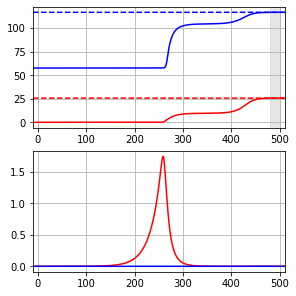

-------  77 0.4500000000000001 0.7000000000000004
-------  78 0.47500000000000014 0.7000000000000004
-------  79 0.5000000000000002 0.7000000000000004
-------  80 0.5250000000000001 0.7000000000000004
-------  81 0.5500000000000003 0.7000000000000004
-------  82 0.5750000000000002 0.7000000000000004


In [111]:
c_var = [0,1]
conv = [None] * len(exc)
max_it = int(100)

tol = 1. * 1e-12

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    if i not in bad:
        continue
        
    while not conv[i]:

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][2][0][:] )
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][3] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][2][0][:2])
        print("total cost = ", costnode_[i][0][0][0] + sum(costnode_[i][2][0][:2]))

        if conv[i]:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

-------  69 0.4250000000000001 0.6750000000000004


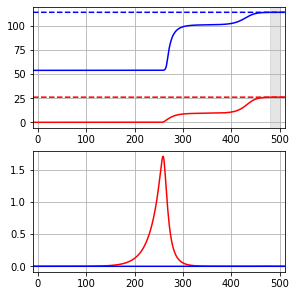

-------  76 0.4250000000000001 0.7000000000000004


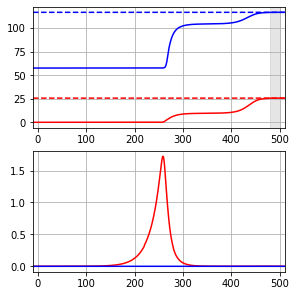

In [103]:
for i in i_range:
    
    if i not in bad:
        continue
        
    print("------- ", i, exc[i], inh[i])
    
    aln.params.duration = dur + dur_pre + dur_post

    time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[i][0]
    target_[:,1,:] = target[i][1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
    ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
    ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
    ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
    ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
    ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
    ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
    ax[0].set_xlim(-dur_pre,dur+dur_post)
    ax[1].set_xlim(-dur_pre,dur+dur_post)
    ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

In [104]:
bad = [76] 

In [77]:
retry = [69]